## Datasets & Params¶


In [ ]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
#DATASET_NAME = 'ADULT_SEX'

# Experiment 5
# DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
#DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
#DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
# DATASET_NAME = 'NURSERY'

# Experiment 9
# DATASET_NAME = 'DEFAULT_CREDIT'

In [ ]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving compas-scores-two-years_v1.csv to compas-scores-two-years_v1.csv
User uploaded file "compas-scores-two-years_v1.csv" with length 2416405 bytes


## Imports

In [ ]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 882.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

## Fairness metrics and functions


In [ ]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [ ]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [ ]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [ ]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [ ]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

In [ ]:
orig_data

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,am
0,1.0,miguel hernandez,miguel,hernandez,8/14/2013,1,4/18/1947,69.0,Greater than 45,Other,...,Low,8/14/2013,7/7/2014,7/14/2014,0.0,0.0,327.0,0.0,0.0,0
1,3.0,kevon dixon,kevon,dixon,1/27/2013,1,1/22/1982,34.0,25 - 45,African-American,...,Low,1/27/2013,1/26/2013,2/5/2013,0.0,9.0,159.0,1.0,1.0,1
2,4.0,ed philo,ed,philo,4/14/2013,1,5/14/1991,24.0,Less than 25,African-American,...,Low,4/14/2013,6/16/2013,6/16/2013,4.0,0.0,63.0,0.0,1.0,1
5,7.0,marsha miles,marsha,miles,11/30/2013,1,8/22/1971,44.0,25 - 45,Other,...,Low,11/30/2013,11/30/2013,12/1/2013,0.0,1.0,853.0,0.0,0.0,0
6,8.0,edward riddle,edward,riddle,2/19/2014,1,7/23/1974,41.0,25 - 45,Caucasian,...,Low,2/19/2014,3/31/2014,4/18/2014,14.0,5.0,40.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996.0,steven butler,steven,butler,11/23/2013,1,7/17/1992,23.0,Less than 25,African-American,...,Medium,11/23/2013,11/22/2013,11/24/2013,0.0,1.0,860.0,0.0,0.0,1
7210,10997.0,malcolm simmons,malcolm,simmons,2/1/2014,1,3/25/1993,23.0,Less than 25,African-American,...,Medium,2/1/2014,1/31/2014,2/2/2014,0.0,1.0,790.0,0.0,0.0,1
7211,10999.0,winston gregory,winston,gregory,1/14/2014,1,10/1/1958,57.0,Greater than 45,Other,...,Low,1/14/2014,1/13/2014,1/14/2014,0.0,0.0,808.0,0.0,0.0,0
7212,11000.0,farrah jean,farrah,jean,3/9/2014,0,11/17/1982,33.0,25 - 45,African-American,...,Low,3/9/2014,3/8/2014,3/9/2014,3.0,0.0,754.0,0.0,0.0,1


In [ ]:
orig_data.columns


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'am'],
      dtype='object')

## Data_Visualization

In [ ]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(1148, 54) (1661, 54) (1849, 54) (1514, 54)


In [ ]:
orig_data_one_non_priv

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,am
1,3.0,kevon dixon,kevon,dixon,1/27/2013,1,1/22/1982,34.0,25 - 45,African-American,...,Low,1/27/2013,1/26/2013,2/5/2013,0.0,9.0,159.0,1.0,1.0,1
2,4.0,ed philo,ed,philo,4/14/2013,1,5/14/1991,24.0,Less than 25,African-American,...,Low,4/14/2013,6/16/2013,6/16/2013,4.0,0.0,63.0,0.0,1.0,1
11,15.0,ellyaher lanza,ellyaher,lanza,10/3/2013,1,8/18/1992,23.0,Less than 25,African-American,...,Low,10/3/2013,10/3/2013,10/7/2013,3.0,4.0,128.0,1.0,1.0,1
15,20.0,samuel seraphin,samuel,seraphin,6/3/2014,1,3/25/1985,31.0,25 - 45,African-American,...,Low,6/3/2014,6/25/2014,6/28/2014,7.0,0.0,22.0,1.0,1.0,1
20,25.0,columbus wilson,columbus,wilson,5/2/2014,1,6/28/1951,64.0,Greater than 45,African-American,...,Low,5/2/2014,5/3/2014,5/4/2014,13.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,10969.0,eric sparks,eric,sparks,1/11/2013,1,7/13/1991,24.0,Less than 25,African-American,...,Low,1/11/2013,7/9/2013,7/16/2013,2.0,32.0,179.0,0.0,1.0,1
7195,10977.0,adrian williams,adrian,williams,9/18/2013,1,3/9/1981,35.0,25 - 45,African-American,...,Low,9/18/2013,9/18/2013,11/19/2013,8.0,62.0,393.0,1.0,1.0,1
7200,10984.0,shantrina stfort,shantrina,stfort,11/5/2013,0,6/6/1995,20.0,Less than 25,African-American,...,Medium,11/5/2013,11/4/2013,11/9/2013,0.0,4.0,22.0,1.0,1.0,1
7201,10985.0,kyle miller,kyle,miller,1/22/2014,1,4/8/1986,30.0,25 - 45,African-American,...,Medium,1/22/2014,1/22/2014,1/31/2014,19.0,9.0,144.0,1.0,1.0,1


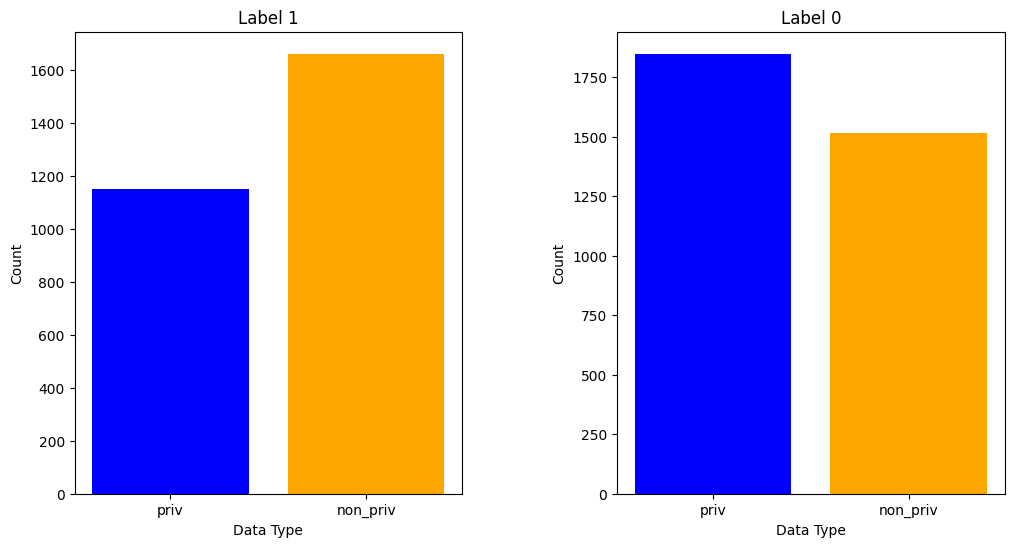

In [ ]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [ ]:
orig_data

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,am
0,1.0,miguel hernandez,miguel,hernandez,8/14/2013,1,4/18/1947,69.0,Greater than 45,Other,...,Low,8/14/2013,7/7/2014,7/14/2014,0.0,0.0,327.0,0.0,0.0,0
1,3.0,kevon dixon,kevon,dixon,1/27/2013,1,1/22/1982,34.0,25 - 45,African-American,...,Low,1/27/2013,1/26/2013,2/5/2013,0.0,9.0,159.0,1.0,1.0,1
2,4.0,ed philo,ed,philo,4/14/2013,1,5/14/1991,24.0,Less than 25,African-American,...,Low,4/14/2013,6/16/2013,6/16/2013,4.0,0.0,63.0,0.0,1.0,1
5,7.0,marsha miles,marsha,miles,11/30/2013,1,8/22/1971,44.0,25 - 45,Other,...,Low,11/30/2013,11/30/2013,12/1/2013,0.0,1.0,853.0,0.0,0.0,0
6,8.0,edward riddle,edward,riddle,2/19/2014,1,7/23/1974,41.0,25 - 45,Caucasian,...,Low,2/19/2014,3/31/2014,4/18/2014,14.0,5.0,40.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996.0,steven butler,steven,butler,11/23/2013,1,7/17/1992,23.0,Less than 25,African-American,...,Medium,11/23/2013,11/22/2013,11/24/2013,0.0,1.0,860.0,0.0,0.0,1
7210,10997.0,malcolm simmons,malcolm,simmons,2/1/2014,1,3/25/1993,23.0,Less than 25,African-American,...,Medium,2/1/2014,1/31/2014,2/2/2014,0.0,1.0,790.0,0.0,0.0,1
7211,10999.0,winston gregory,winston,gregory,1/14/2014,1,10/1/1958,57.0,Greater than 45,Other,...,Low,1/14/2014,1/13/2014,1/14/2014,0.0,0.0,808.0,0.0,0.0,0
7212,11000.0,farrah jean,farrah,jean,3/9/2014,0,11/17/1982,33.0,25 - 45,African-American,...,Low,3/9/2014,3/8/2014,3/9/2014,3.0,0.0,754.0,0.0,0.0,1


In [ ]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [ ]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  0.6811145510835913 fn+fp 189
conf matrix:
  [[323  56]
 [122 117]] 
accuracy:  0.7119741

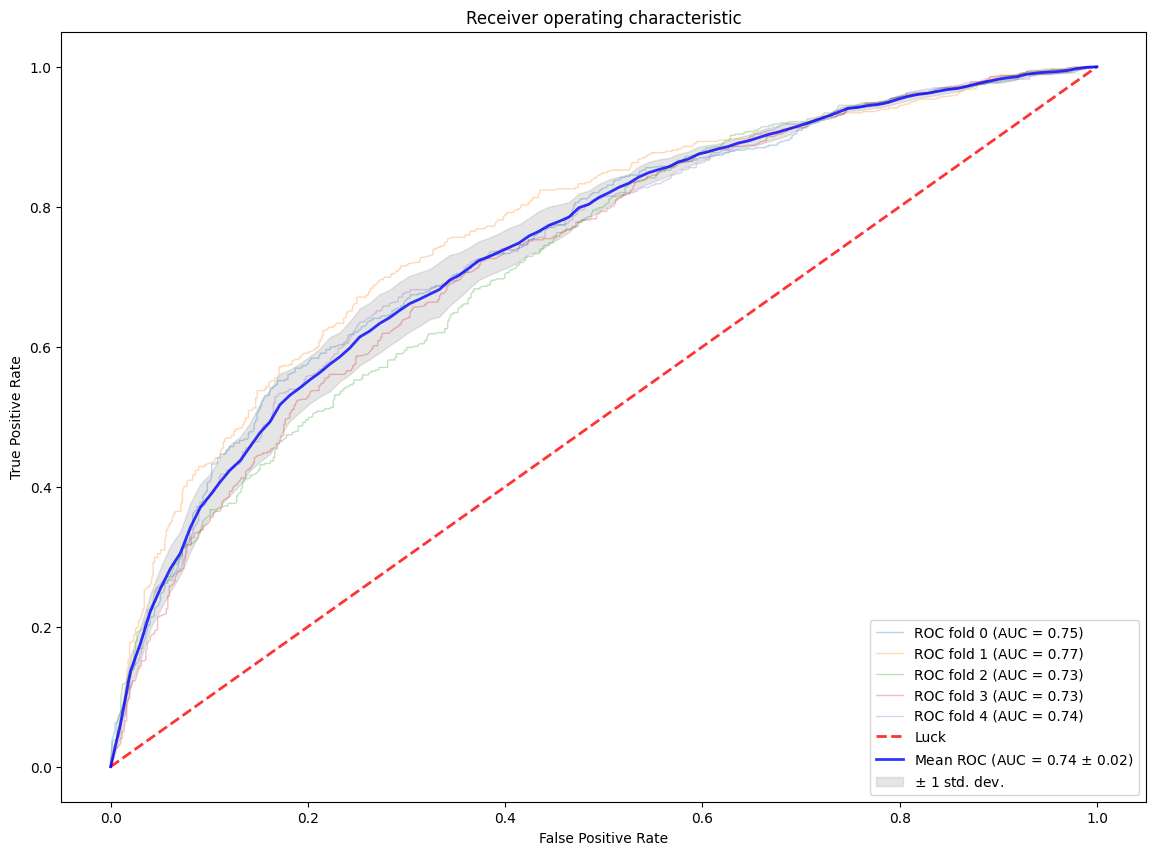

Accaracy list :  [0.6979757085020243, 0.702834008097166, 0.6555915721231766, 0.6774716369529984, 0.6871961102106969]
equal opportunity for tpr :  [0.2883233103304329, 0.19157480212961642, 0.341019098226969, 0.29213334742180896, 0.265910022884506]
equal opportunity for fpr :  [0.15924314062611936, 0.14475975086604562, 0.23496708770681374, 0.20254486838906047, 0.26260869565217393]
odds difference list :  [0.22378322547827612, 0.16816727649783103, 0.28799309296689135, 0.24733910790543473, 0.26425935926834]
The mean accuracy is  0.684 ± 0.017
The mean equal opportunity for tpr: (close to 0) 0.276 ± 0.049
The mean equal opportunity for fpr: (close to 0) 0.201 ± 0.044
The mean odds difference: (close to 0) 0.238 ± 0.041
The mean parity difference: (close to 0) 0.392 ± 0.065
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [ ]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [ ]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

1514
1849


In [ ]:
unprivileged_data_priv_target

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,am,two_year_recid
10,41.0,F,African-American,25 - 45,Low,1,0.0,-1.0,4.0,1,0
14,25.0,F,African-American,25 - 45,High,1,3.0,-1.0,10.0,1,0
35,21.0,F,African-American,Less than 25,High,0,2.0,-1.0,8.0,1,0
36,51.0,M,African-American,Greater than 45,Low,1,2.0,-1.0,1.0,1,0
38,51.0,F,African-American,Greater than 45,Low,0,7.0,-1.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6163,30.0,M,African-American,25 - 45,Low,1,2.0,-1.0,4.0,1,0
6166,20.0,F,African-American,Less than 25,High,1,0.0,-1.0,9.0,1,0
6167,23.0,F,African-American,Less than 25,Medium,1,0.0,-1.0,7.0,1,0
6168,23.0,F,African-American,Less than 25,Low,1,0.0,-1.0,3.0,1,0


In [ ]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-0.85) | Discrim. (-0.06): 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]


# CTGAN On Unpriv Target Group

In [ ]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

1661
1148
-513


In [ ]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (-1.07) | Discrim. (-0.21): 100%|██████████| 200/200 [00:32<00:00,  6.21it/s]


In [ ]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,am,two_year_recid
0,69.0,0.499748,0.361516,0.320186,0.314528,1,0.0,-1.0,1.0,0,0.0
1,34.0,0.499748,0.523150,0.464609,0.314528,1,0.0,-1.0,3.0,1,1.0
2,24.0,0.499748,0.523150,0.559762,0.314528,1,4.0,-1.0,4.0,1,1.0
3,44.0,0.374659,0.361516,0.464609,0.314528,1,0.0,0.0,1.0,0,0.0
4,41.0,0.499748,0.390870,0.464609,0.551338,1,14.0,-1.0,6.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6167,23.0,0.499748,0.523150,0.559762,0.551338,1,0.0,-1.0,7.0,1,0.0
6168,23.0,0.499748,0.523150,0.559762,0.314528,1,0.0,-1.0,3.0,1,0.0
6169,57.0,0.499748,0.361516,0.320186,0.314528,1,0.0,-1.0,1.0,0,0.0
6170,33.0,0.374659,0.523150,0.464609,0.314528,0,3.0,-1.0,2.0,1,0.0


In [ ]:
print(DATASET_NAME)

COMPAS_RACE_AM


Optuna FairUS

In [ ]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
!pip install cmaes


In [ ]:
import optuna


In [ ]:
all_upsampled_acc = []
all_upsampled_od_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_od_diff = mean(upsampled_od_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_od_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_od_diff.append(upsampled_od_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [ ]:
# Record the start time
start_time = time.time()

In [ ]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-01 15:23:51,482] A new study created in memory with name: no-name-fa26bb83-d064-47ed-93fe-4f97cc9d270d


conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  0.6811145510835913 fn+fp 189
conf matrix:
  [[323  56]
 [122 117]] 
accuracy:  0.7119741

[I 2024-04-01 15:23:53,421] Trial 0 finished with values: [0.18283506340689773, 0.6903771467096038] and parameters: {'lambda_0': 0.1971679880296502, 'lambda_1': 0.4451890025065104}. 



---------------------------------------trail upsampled_op_diff is :  0.18283506340689773
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:

[I 2024-04-01 15:23:54,606] Trial 1 finished with values: [0.1625586789349723, 0.6952742115496655] and parameters: {'lambda_0': 0.0961320527249534, 'lambda_1': 0.6510482136966478}. 


conf matrix:
  [[533 146]
 [239 389]] 
accuracy:  0.7054322876817138 precision:  0.7271028037383177 recall:  0.6194267515923567 fpr:  0.21502209131075112 tpr:  0.6194267515923567 fn+fp 385
conf matrix:
  [[215  93]
 [ 98 224]] 
accuracy:  0.6968253968253968 precision:  0.7066246056782335 recall:  0.6956521739130435 fpr:  0.30194805194805197 tpr:  0.6956521739130435 fn+fp 191
conf matrix:
  [[318  53]
 [141 165]] 
accuracy:  0.7134416543574594 precision:  0.7568807339449541 recall:  0.5392156862745098 fpr:  0.14285714285714285 tpr:  0.5392156862745098 fn+fp 194
lambda_0: 0.0961320527249534
lambda_1: 0.6510482136966478
---------------------------------------trail upsampled_acc is :  0.6952742115496655
---------------------------------------trail upsampled_op_diff is :  0.1625586789349723
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:23:55,663] Trial 2 finished with values: [0.17622902761304127, 0.6987393728498557] and parameters: {'lambda_0': 1.3656360916109072, 'lambda_1': 0.045379965602537764}. 


conf matrix:
  [[288  92]
 [117 222]] 
accuracy:  0.7093184979137691 precision:  0.7070063694267515 recall:  0.6548672566371682 fpr:  0.24210526315789474 tpr:  0.6548672566371682 fn+fp 209
conf matrix:
  [[617 147]
 [261 305]] 
accuracy:  0.6932330827067669 precision:  0.6747787610619469 recall:  0.5388692579505301 fpr:  0.19240837696335078 tpr:  0.5388692579505301 fn+fp 408
conf matrix:
  [[304 105]
 [116 212]] 
accuracy:  0.7001356852103121 precision:  0.668769716088328 recall:  0.6463414634146342 fpr:  0.2567237163814181 tpr:  0.6463414634146342 fn+fp 221
conf matrix:
  [[313  42]
 [145  93]] 
accuracy:  0.684654300168634 precision:  0.6888888888888889 recall:  0.3907563025210084 fpr:  0.11830985915492957 tpr:  0.3907563025210084 fn+fp 187
conf matrix:
  [[628 136]
 [244 322]] 
accuracy:  0.7142857142857143 precision:  0.7030567685589519 recall:  0.568904593639576 fpr:  0.17801047120418848 tpr:  0.568904593639576 fn+fp 380
conf matrix:
  [[300  44]
 [137  95]] 
accuracy:  0.68576388

[I 2024-04-01 15:23:58,168] Trial 3 finished with values: [0.10072927580898916, 0.697743244621189] and parameters: {'lambda_0': 1.224678991885156, 'lambda_1': 0.8234349795164346}. 


conf matrix:
  [[589 165]
 [267 379]] 
accuracy:  0.6914285714285714 precision:  0.6966911764705882 recall:  0.586687306501548 fpr:  0.21883289124668434 tpr:  0.586687306501548 fn+fp 432
conf matrix:
  [[310  58]
 [153 168]] 
accuracy:  0.6937590711175616 precision:  0.7433628318584071 recall:  0.5233644859813084 fpr:  0.15760869565217392 tpr:  0.5233644859813084 fn+fp 211
conf matrix:
  [[279 107]
 [114 211]] 
accuracy:  0.6891701828410689 precision:  0.6635220125786163 recall:  0.6492307692307693 fpr:  0.2772020725388601 tpr:  0.6492307692307693 fn+fp 221
lambda_0: 1.224678991885156
lambda_1: 0.8234349795164346
---------------------------------------trail upsampled_acc is :  0.697743244621189
---------------------------------------trail upsampled_op_diff is :  0.10072927580898916
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[3

[I 2024-04-01 15:24:00,487] Trial 4 finished with values: [0.03764077792614233, 0.7112395806562448] and parameters: {'lambda_0': 1.7429742867784357, 'lambda_1': 1.1927653160973233}. 


220
lambda_0: 1.7429742867784357
lambda_1: 1.1927653160973233
---------------------------------------trail upsampled_acc is :  0.7112395806562448
---------------------------------------trail upsampled_op_diff is :  0.03764077792614233
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:

[I 2024-04-01 15:24:02,396] Trial 5 finished with values: [0.04535484928213868, 0.709468715619122] and parameters: {'lambda_0': 1.1399182262866876, 'lambda_1': 1.678634457156474}. 


conf matrix:
  [[531 218]
 [228 506]] 
accuracy:  0.6992582602832097 precision:  0.6988950276243094 recall:  0.6893732970027248 fpr:  0.2910547396528705 tpr:  0.6893732970027248 fn+fp 446
conf matrix:
  [[263 139]
 [ 98 223]] 
accuracy:  0.6721991701244814 precision:  0.6160220994475138 recall:  0.6947040498442367 fpr:  0.34577114427860695 tpr:  0.6947040498442367 fn+fp 237
conf matrix:
  [[268  79]
 [130 283]] 
accuracy:  0.725 precision:  0.7817679558011049 recall:  0.6852300242130751 fpr:  0.2276657060518732 tpr:  0.6852300242130751 fn+fp 209
conf matrix:
  [[562 186]
 [243 491]] 
accuracy:  0.7105263157894737 precision:  0.725258493353028 recall:  0.6689373297002725 fpr:  0.24866310160427807 tpr:  0.6689373297002725 fn+fp 429
conf matrix:
  [[288  92]
 [115 275]] 
accuracy:  0.7311688311688311 precision:  0.7493188010899182 recall:  0.7051282051282052 fpr:  0.24210526315789474 tpr:  0.7051282051282052 fn+fp 207
conf matrix:
  [[274  94]
 [128 216]] 
accuracy:  0.6882022471910112 pr

[I 2024-04-01 15:24:05,044] Trial 6 finished with values: [0.14850463937067257, 0.6874907475943746] and parameters: {'lambda_0': 0.9493008163149645, 'lambda_1': 0.5181556930669797}. 


conf matrix:
  [[573 163]
 [243 372]] 
accuracy:  0.6994818652849741 precision:  0.6953271028037383 recall:  0.6048780487804878 fpr:  0.22146739130434784 tpr:  0.6048780487804878 fn+fp 406
conf matrix:
  [[313  47]
 [146 134]] 
accuracy:  0.6984375 precision:  0.7403314917127072 recall:  0.4785714285714286 fpr:  0.13055555555555556 tpr:  0.4785714285714286 fn+fp 193
conf matrix:
  [[260 116]
 [ 97 238]] 
accuracy:  0.70042194092827 precision:  0.672316384180791 recall:  0.7104477611940299 fpr:  0.30851063829787234 tpr:  0.7104477611940299 fn+fp 213
lambda_0: 0.9493008163149645
lambda_1: 0.5181556930669797
---------------------------------------trail upsampled_acc is :  0.6874907475943746
---------------------------------------trail upsampled_op_diff is :  0.14850463937067257
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]

[I 2024-04-01 15:24:07,235] Trial 7 finished with values: [0.17385180668463193, 0.6920372588525547] and parameters: {'lambda_0': 0.3785083806415239, 'lambda_1': 0.5536856577258022}. 


conf matrix:
  [[490 207]
 [223 396]] 
accuracy:  0.6732522796352584 precision:  0.6567164179104478 recall:  0.6397415185783522 fpr:  0.296987087517934 tpr:  0.6397415185783522 fn+fp 430
conf matrix:
  [[216 128]
 [ 99 232]] 
accuracy:  0.6637037037037037 precision:  0.6444444444444445 recall:  0.7009063444108762 fpr:  0.37209302325581395 tpr:  0.7009063444108762 fn+fp 227
conf matrix:
  [[274  79]
 [124 164]] 
accuracy:  0.6833073322932918 precision:  0.6748971193415638 recall:  0.5694444444444444 fpr:  0.2237960339943343 tpr:  0.5694444444444444 fn+fp 203
lambda_0: 0.3785083806415239
lambda_1: 0.5536856577258022
---------------------------------------trail upsampled_acc is :  0.6920372588525547
---------------------------------------trail upsampled_op_diff is :  0.17385180668463193
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:24:10,182] Trial 8 finished with values: [0.06527373529245044, 0.7261583404240186] and parameters: {'lambda_0': 1.3544385097923404, 'lambda_1': 1.8857922824066458}. 


conf matrix:
  [[576 187]
 [219 536]] 
accuracy:  0.7325428194993412 precision:  0.7413554633471646 recall:  0.7099337748344371 fpr:  0.24508519003931847 tpr:  0.7099337748344371 fn+fp 406
conf matrix:
  [[285 105]
 [121 216]] 
accuracy:  0.6891334250343879 precision:  0.6728971962616822 recall:  0.6409495548961425 fpr:  0.2692307692307692 tpr:  0.6409495548961425 fn+fp 226
conf matrix:
  [[291  82]
 [ 98 320]] 
accuracy:  0.7724399494310998 precision:  0.7960199004975125 recall:  0.7655502392344498 fpr:  0.21983914209115282 tpr:  0.7655502392344498 fn+fp 180
lambda_0: 1.3544385097923404
lambda_1: 1.8857922824066458
---------------------------------------trail upsampled_acc is :  0.7261583404240186
---------------------------------------trail upsampled_op_diff is :  0.06527373529245044
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:24:13,492] Trial 9 finished with values: [0.10080619984300714, 0.7060171919770774] and parameters: {'lambda_0': 1.5663440987964505, 'lambda_1': 0.5547365072235082}. 


conf matrix:
  [[613 164]
 [273 346]] 
accuracy:  0.6869627507163324 precision:  0.6784313725490196 recall:  0.5589660743134087 fpr:  0.21106821106821108 tpr:  0.5589660743134087 fn+fp 437
conf matrix:
  [[297  59]
 [150 139]] 
accuracy:  0.6759689922480621 precision:  0.702020202020202 recall:  0.4809688581314879 fpr:  0.16573033707865167 tpr:  0.4809688581314879 fn+fp 209
conf matrix:
  [[316 105]
 [123 207]] 
accuracy:  0.6964047936085219 precision:  0.6634615384615384 recall:  0.6272727272727273 fpr:  0.2494061757719715 tpr:  0.6272727272727273 fn+fp 228
lambda_0: 1.5663440987964505
lambda_1: 0.5547365072235082
---------------------------------------trail upsampled_acc is :  0.7060171919770774
---------------------------------------trail upsampled_op_diff is :  0.10080619984300714
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:24:15,927] Trial 10 finished with values: [0.17287978585629987, 0.6939196103067858] and parameters: {'lambda_0': 0.12437730643751466, 'lambda_1': 0.5251172986666319}. 


conf matrix:
  [[510 171]
 [240 375]] 
accuracy:  0.6828703703703703 precision:  0.6868131868131868 recall:  0.6097560975609756 fpr:  0.2511013215859031 tpr:  0.6097560975609756 fn+fp 411
conf matrix:
  [[314  69]
 [147 156]] 
accuracy:  0.685131195335277 precision:  0.6933333333333334 recall:  0.5148514851485149 fpr:  0.1801566579634465 tpr:  0.5148514851485149 fn+fp 216
conf matrix:
  [[196 102]
 [ 93 219]] 
accuracy:  0.680327868852459 precision:  0.6822429906542056 recall:  0.7019230769230769 fpr:  0.3422818791946309 tpr:  0.7019230769230769 fn+fp 195
conf matrix:
  [[522 158]
 [242 374]] 
accuracy:  0.691358024691358 precision:  0.7030075187969925 recall:  0.6071428571428571 fpr:  0.2323529411764706 tpr:  0.6071428571428571 fn+fp 400
conf matrix:
  [[221  96]
 [112 224]] 
accuracy:  0.6814701378254211 precision:  0.7 recall:  0.6666666666666666 fpr:  0.3028391167192429 tpr:  0.6666666666666666 fn+fp 208
conf matrix:
  [[301  62]
 [130 150]] 
accuracy:  0.7013996889580093 precision

[I 2024-04-01 15:24:17,987] Trial 11 finished with values: [0.16947853945169097, 0.7070736006351727] and parameters: {'lambda_0': 1.9557116463176656, 'lambda_1': 0.08849380178207866}. 


conf matrix:
  [[665 138]
 [267 304]] 
accuracy:  0.7052401746724891 precision:  0.6877828054298643 recall:  0.532399299474606 fpr:  0.1718555417185554 tpr:  0.532399299474606 fn+fp 405
conf matrix:
  [[345  83]
 [108 220]] 
accuracy:  0.7473544973544973 precision:  0.7260726072607261 recall:  0.6707317073170732 fpr:  0.1939252336448598 tpr:  0.6707317073170732 fn+fp 191
conf matrix:
  [[320  55]
 [159  84]] 
accuracy:  0.6537216828478964 precision:  0.60431654676259 recall:  0.345679012345679 fpr:  0.14666666666666667 tpr:  0.345679012345679 fn+fp 214
conf matrix:
  [[687 116]
 [271 300]] 
accuracy:  0.7183406113537117 precision:  0.7211538461538461 recall:  0.5253940455341506 fpr:  0.1444582814445828 tpr:  0.5253940455341506 fn+fp 387
conf matrix:
  [[318  29]
 [143  91]] 
accuracy:  0.7039586919104991 precision:  0.7583333333333333 recall:  0.3888888888888889 fpr:  0.08357348703170028 tpr:  0.3888888888888889 fn+fp 172
conf matrix:
  [[369  87]
 [128 209]] 
accuracy:  0.728877679697

[I 2024-04-01 15:24:20,495] Trial 12 finished with values: [0.07833450880892218, 0.7153417015341701] and parameters: {'lambda_0': 0.3360582759074606, 'lambda_1': 1.7274599179329047}. 


conf matrix:
  [[495 200]
 [201 538]] 
accuracy:  0.7203626220362622 precision:  0.7289972899728997 recall:  0.7280108254397835 fpr:  0.28776978417266186 tpr:  0.7280108254397835 fn+fp 401
conf matrix:
  [[230 118]
 [ 93 231]] 
accuracy:  0.6860119047619048 precision:  0.66189111747851 recall:  0.7129629629629629 fpr:  0.3390804597701149 tpr:  0.7129629629629629 fn+fp 211
conf matrix:
  [[265  82]
 [108 307]] 
accuracy:  0.7506561679790026 precision:  0.7892030848329049 recall:  0.7397590361445783 fpr:  0.23631123919308358 tpr:  0.7397590361445783 fn+fp 190
lambda_0: 0.3360582759074606
lambda_1: 1.7274599179329047
---------------------------------------trail upsampled_acc is :  0.7153417015341701
---------------------------------------trail upsampled_op_diff is :  0.07833450880892218
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:24:23,223] Trial 13 finished with values: [0.06473778687291426, 0.723122705216929] and parameters: {'lambda_0': 1.8904850989504909, 'lambda_1': 1.8030701470046457}. 


conf matrix:
  [[631 168]
 [236 510]] 
accuracy:  0.7385113268608414 precision:  0.7522123893805309 recall:  0.6836461126005362 fpr:  0.21026282853566958 tpr:  0.6836461126005362 fn+fp 404
conf matrix:
  [[340 101]
 [ 95 229]] 
accuracy:  0.7437908496732026 precision:  0.693939393939394 recall:  0.7067901234567902 fpr:  0.2290249433106576 tpr:  0.7067901234567902 fn+fp 196
conf matrix:
  [[291  67]
 [141 281]] 
accuracy:  0.7333333333333333 precision:  0.8074712643678161 recall:  0.6658767772511849 fpr:  0.1871508379888268 tpr:  0.6658767772511849 fn+fp 208
lambda_0: 1.8904850989504909
lambda_1: 1.8030701470046457
---------------------------------------trail upsampled_acc is :  0.723122705216929
---------------------------------------trail upsampled_op_diff is :  0.06473778687291426
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[

[I 2024-04-01 15:24:26,943] Trial 14 finished with values: [0.08859314301203729, 0.7168956043956044] and parameters: {'lambda_0': 0.3598017281360526, 'lambda_1': 1.9259654571499762}. 


conf matrix:
  [[478 218]
 [205 555]] 
accuracy:  0.709478021978022 precision:  0.7179818887451488 recall:  0.7302631578947368 fpr:  0.3132183908045977 tpr:  0.7302631578947368 fn+fp 423
conf matrix:
  [[224 105]
 [ 94 220]] 
accuracy:  0.6905132192846034 precision:  0.676923076923077 recall:  0.7006369426751592 fpr:  0.3191489361702128 tpr:  0.7006369426751592 fn+fp 199
conf matrix:
  [[254 113]
 [111 335]] 
accuracy:  0.7244772447724477 precision:  0.7477678571428571 recall:  0.7511210762331838 fpr:  0.3079019073569482 tpr:  0.7511210762331838 fn+fp 224
lambda_0: 0.3598017281360526
lambda_1: 1.9259654571499762
---------------------------------------trail upsampled_acc is :  0.7168956043956044
---------------------------------------trail upsampled_op_diff is :  0.08859314301203729
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[3

[I 2024-04-01 15:24:29,758] Trial 15 finished with values: [0.07040559140418033, 0.7235932588983462] and parameters: {'lambda_0': 1.6860709674964578, 'lambda_1': 1.8001828385544367}. 


conf matrix:
  [[573 212]
 [182 565]] 
accuracy:  0.7428198433420365 precision:  0.7271557271557272 recall:  0.7563587684069611 fpr:  0.2700636942675159 tpr:  0.7563587684069611 fn+fp 394
conf matrix:
  [[334 118]
 [ 94 255]] 
accuracy:  0.735330836454432 precision:  0.6836461126005362 recall:  0.7306590257879656 fpr:  0.2610619469026549 tpr:  0.7306590257879656 fn+fp 212
conf matrix:
  [[239  94]
 [ 88 310]] 
accuracy:  0.7510259917920656 precision:  0.7673267326732673 recall:  0.7788944723618091 fpr:  0.2822822822822823 tpr:  0.7788944723618091 fn+fp 182
conf matrix:
  [[599 186]
 [236 510]] 
accuracy:  0.7243631613324625 precision:  0.7327586206896551 recall:  0.6836461126005362 fpr:  0.23694267515923567 tpr:  0.6836461126005362 fn+fp 422
conf matrix:
  [[294  73]
 [131 302]] 
accuracy:  0.745 precision:  0.8053333333333333 recall:  0.6974595842956121 fpr:  0.1989100817438692 tpr:  0.6974595842956121 fn+fp 204
conf matrix:
  [[305 113]
 [105 208]] 
accuracy:  0.7017783857729138 prec

[I 2024-04-01 15:24:32,078] Trial 16 finished with values: [0.04896788961345929, 0.7118175724019401] and parameters: {'lambda_0': 0.9873767850899442, 'lambda_1': 1.5456667765641694}. 


conf matrix:
  [[281  79]
 [124 261]] 
accuracy:  0.72751677852349 precision:  0.7676470588235295 recall:  0.6779220779220779 fpr:  0.21944444444444444 tpr:  0.6779220779220779 fn+fp 203
conf matrix:
  [[521 217]
 [207 513]] 
accuracy:  0.7091906721536351 precision:  0.7027397260273973 recall:  0.7125 fpr:  0.2940379403794038 tpr:  0.7125 fn+fp 424
conf matrix:
  [[238 113]
 [ 96 230]] 
accuracy:  0.691285081240768 precision:  0.6705539358600583 recall:  0.7055214723926381 fpr:  0.32193732193732194 tpr:  0.7055214723926381 fn+fp 209
conf matrix:
  [[283 104]
 [111 283]] 
accuracy:  0.7247119078104993 precision:  0.7312661498708011 recall:  0.7182741116751269 fpr:  0.268733850129199 tpr:  0.7182741116751269 fn+fp 215
lambda_0: 0.9873767850899442
lambda_1: 1.5456667765641694
---------------------------------------trail upsampled_acc is :  0.7118175724019401
---------------------------------------trail upsampled_op_diff is :  0.04896788961345929
conf matrix:
  [[538 135]
 [238 324]] 
accu

[I 2024-04-01 15:24:34,302] Trial 17 finished with values: [0.06393973962303762, 0.719444967795151] and parameters: {'lambda_0': 0.8587006836896796, 'lambda_1': 1.9256745334318892}. 


conf matrix:
  [[543 187]
 [206 553]] 
accuracy:  0.7360644728005373 precision:  0.7472972972972973 recall:  0.7285902503293807 fpr:  0.25616438356164384 tpr:  0.7285902503293807 fn+fp 393
conf matrix:
  [[265  91]
 [111 240]] 
accuracy:  0.7142857142857143 precision:  0.7250755287009063 recall:  0.6837606837606838 fpr:  0.2556179775280899 tpr:  0.6837606837606838 fn+fp 202
conf matrix:
  [[278  96]
 [ 95 313]] 
accuracy:  0.7557544757033248 precision:  0.7652811735941321 recall:  0.7671568627450981 fpr:  0.25668449197860965 tpr:  0.7671568627450981 fn+fp 191
lambda_0: 0.8587006836896796
lambda_1: 1.9256745334318892
---------------------------------------trail upsampled_acc is :  0.719444967795151
---------------------------------------trail upsampled_op_diff is :  0.06393973962303762
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:24:35,855] Trial 18 finished with values: [0.13130723520910625, 0.7066874580553472] and parameters: {'lambda_0': 1.8434431940098064, 'lambda_1': 0.2910728163970264}. 


conf matrix:
  [[684 112]
 [286 305]] 
accuracy:  0.7130497476568133 precision:  0.7314148681055156 recall:  0.5160744500846024 fpr:  0.1407035175879397 tpr:  0.5160744500846024 fn+fp 398
conf matrix:
  [[364  72]
 [136 199]] 
accuracy:  0.7302204928664072 precision:  0.7343173431734318 recall:  0.5940298507462687 fpr:  0.1651376146788991 tpr:  0.5940298507462687 fn+fp 208
conf matrix:
  [[320  40]
 [150 106]] 
accuracy:  0.6915584415584416 precision:  0.726027397260274 recall:  0.4140625 fpr:  0.1111111111111111 tpr:  0.4140625 fn+fp 190
lambda_0: 1.8434431940098064
lambda_1: 0.2910728163970264
---------------------------------------trail upsampled_acc is :  0.7066874580553472
---------------------------------------trail upsampled_op_diff is :  0.13130723520910625
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95

[I 2024-04-01 15:24:37,407] Trial 19 finished with values: [0.06512227480576262, 0.7176718137968988] and parameters: {'lambda_0': 0.7177208121290781, 'lambda_1': 1.8347151746576742}. 


conf matrix:
  [[548 172]
 [212 538]] 
accuracy:  0.7387755102040816 precision:  0.7577464788732394 recall:  0.7173333333333334 fpr:  0.2388888888888889 tpr:  0.7173333333333334 fn+fp 384
conf matrix:
  [[278  89]
 [110 234]] 
accuracy:  0.720112517580872 precision:  0.7244582043343654 recall:  0.6802325581395349 fpr:  0.24250681198910082 tpr:  0.6802325581395349 fn+fp 199
conf matrix:
  [[270  83]
 [102 304]] 
accuracy:  0.7562582345191041 precision:  0.7855297157622739 recall:  0.7487684729064039 fpr:  0.23512747875354106 tpr:  0.7487684729064039 fn+fp 185
lambda_0: 0.7177208121290781
lambda_1: 1.8347151746576742
---------------------------------------trail upsampled_acc is :  0.7176718137968988
---------------------------------------trail upsampled_op_diff is :  0.06512227480576262
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:24:38,786] Trial 20 finished with values: [0.06151132795865103, 0.714304698826665] and parameters: {'lambda_0': 1.7804804038302304, 'lambda_1': 1.1026939120953891}. 


conf matrix:
  [[329  88]
 [121 195]] 
accuracy:  0.7148703956343793 precision:  0.6890459363957597 recall:  0.6170886075949367 fpr:  0.21103117505995203 tpr:  0.6170886075949367 fn+fp 209
conf matrix:
  [[634 158]
 [268 406]] 
accuracy:  0.7094133697135061 precision:  0.7198581560283688 recall:  0.6023738872403561 fpr:  0.1994949494949495 tpr:  0.6023738872403561 fn+fp 426
conf matrix:
  [[304  65]
 [141 170]] 
accuracy:  0.6970588235294117 precision:  0.723404255319149 recall:  0.5466237942122186 fpr:  0.17615176151761516 tpr:  0.5466237942122186 fn+fp 206
conf matrix:
  [[330  93]
 [127 236]] 
accuracy:  0.7201017811704835 precision:  0.7173252279635258 recall:  0.650137741046832 fpr:  0.2198581560283688 tpr:  0.650137741046832 fn+fp 220
conf matrix:
  [[618 173]
 [244 431]] 
accuracy:  0.7155525238744884 precision:  0.7135761589403974 recall:  0.6385185185185185 fpr:  0.21871049304677623 tpr:  0.6385185185185185 fn+fp 417
conf matrix:
  [[337  84]
 [121 225]] 
accuracy:  0.73272490

[I 2024-04-01 15:24:39,900] Trial 21 finished with values: [0.03429318735479651, 0.7113353015147131] and parameters: {'lambda_0': 1.7191267610575913, 'lambda_1': 1.0901526197435234}. 


conf matrix:
  [[311  93]
 [116 211]] 
accuracy:  0.7140902872777017 precision:  0.694078947368421 recall:  0.6452599388379205 fpr:  0.2301980198019802 tpr:  0.6452599388379205 fn+fp 209
conf matrix:
  [[638 149]
 [260 414]] 
accuracy:  0.7200547570157426 precision:  0.7353463587921847 recall:  0.6142433234421365 fpr:  0.18932655654383734 tpr:  0.6142433234421365 fn+fp 409
conf matrix:
  [[325  85]
 [124 218]] 
accuracy:  0.7220744680851063 precision:  0.7194719471947195 recall:  0.6374269005847953 fpr:  0.2073170731707317 tpr:  0.6374269005847953 fn+fp 209
conf matrix:
  [[313  64]
 [136 196]] 
accuracy:  0.7179125528913963 precision:  0.7538461538461538 recall:  0.5903614457831325 fpr:  0.16976127320954906 tpr:  0.5903614457831325 fn+fp 200
conf matrix:
  [[614 173]
 [237 437]] 
accuracy:  0.7193702943189596 precision:  0.7163934426229508 recall:  0.6483679525222552 fpr:  0.21982210927573062 tpr:  0.6483679525222552 fn+fp 410
conf matrix:
  [[357  85]
 [120 227]] 
accuracy:  0.740177

[I 2024-04-01 15:24:40,992] Trial 22 finished with values: [0.0640731128914214, 0.7163425189535553] and parameters: {'lambda_0': 1.6884548595063655, 'lambda_1': 1.3477387671143082}. 


conf matrix:
  [[283 100]
 [139 191]] 
accuracy:  0.664796633941094 precision:  0.6563573883161512 recall:  0.5787878787878787 fpr:  0.26109660574412535 tpr:  0.5787878787878787 fn+fp 239
conf matrix:
  [[604 181]
 [259 441]] 
accuracy:  0.7037037037037037 precision:  0.7090032154340836 recall:  0.63 fpr:  0.23057324840764332 tpr:  0.63 fn+fp 440
conf matrix:
  [[350 101]
 [131 211]] 
accuracy:  0.7074401008827238 precision:  0.6762820512820513 recall:  0.6169590643274854 fpr:  0.22394678492239467 tpr:  0.6169590643274854 fn+fp 232
conf matrix:
  [[254  80]
 [128 230]] 
accuracy:  0.6994219653179191 precision:  0.7419354838709677 recall:  0.6424581005586593 fpr:  0.23952095808383234 tpr:  0.6424581005586593 fn+fp 208
conf matrix:
  [[602 183]
 [231 469]] 
accuracy:  0.7212121212121212 precision:  0.7193251533742331 recall:  0.67 fpr:  0.23312101910828026 tpr:  0.67 fn+fp 414
conf matrix:
  [[265 109]
 [101 267]] 
accuracy:  0.7169811320754716 precision:  0.7101063829787234 recall:  0.7

[I 2024-04-01 15:24:42,118] Trial 23 finished with values: [0.021856071962182633, 0.7178175455296791] and parameters: {'lambda_0': 1.9747418547974767, 'lambda_1': 1.0354583905645445}. 


conf matrix:
  [[341  87]
 [135 192]] 
accuracy:  0.7059602649006622 precision:  0.6881720430107527 recall:  0.5871559633027523 fpr:  0.20327102803738317 tpr:  0.5871559633027523 fn+fp 222
conf matrix:
  [[311  66]
 [136 205]] 
accuracy:  0.7186629526462396 precision:  0.7564575645756457 recall:  0.6011730205278593 fpr:  0.17506631299734748 tpr:  0.6011730205278593 fn+fp 202
conf matrix:
  [[660 145]
 [264 404]] 
accuracy:  0.7223353699932111 precision:  0.7358834244080146 recall:  0.6047904191616766 fpr:  0.18012422360248448 tpr:  0.6047904191616766 fn+fp 409
conf matrix:
  [[298  67]
 [127 196]] 
accuracy:  0.7180232558139535 precision:  0.7452471482889734 recall:  0.6068111455108359 fpr:  0.18356164383561643 tpr:  0.6068111455108359 fn+fp 194
conf matrix:
  [[362  78]
 [137 208]] 
accuracy:  0.7261146496815286 precision:  0.7272727272727273 recall:  0.6028985507246377 fpr:  0.17727272727272728 tpr:  0.6028985507246377 fn+fp 215
conf matrix:
  [[630 174]
 [229 439]] 
accuracy:  0.726

[I 2024-04-01 15:24:43,202] Trial 24 finished with values: [0.078242554811181, 0.7074723991622202] and parameters: {'lambda_0': 1.924235887800143, 'lambda_1': 0.6143582211868639}. 


conf matrix:
  [[342  81]
 [124 226]] 
accuracy:  0.7347994825355757 precision:  0.7361563517915309 recall:  0.6457142857142857 fpr:  0.19148936170212766 tpr:  0.6457142857142857 fn+fp 205
conf matrix:
  [[635 166]
 [271 354]] 
accuracy:  0.6935483870967742 precision:  0.6807692307692308 recall:  0.5664 fpr:  0.20724094881398253 tpr:  0.5664 fn+fp 437
conf matrix:
  [[306  58]
 [142 152]] 
accuracy:  0.6960486322188449 precision:  0.7238095238095238 recall:  0.5170068027210885 fpr:  0.15934065934065933 tpr:  0.5170068027210885 fn+fp 200
conf matrix:
  [[329 108]
 [129 202]] 
accuracy:  0.69140625 precision:  0.6516129032258065 recall:  0.6102719033232629 fpr:  0.2471395881006865 tpr:  0.6102719033232629 fn+fp 237
conf matrix:
  [[670 131]
 [279 346]] 
accuracy:  0.7124824684431977 precision:  0.7253668763102725 recall:  0.5536 fpr:  0.16354556803995007 tpr:  0.5536 fn+fp 410
conf matrix:
  [[371  74]
 [132 203]] 
accuracy:  0.735897435897436 precision:  0.7328519855595668 recall:  0.60

[I 2024-04-01 15:24:44,331] Trial 25 finished with values: [0.056870526905633836, 0.7171717171717171] and parameters: {'lambda_0': 1.9530244920972486, 'lambda_1': 1.1689652582942525}. 


conf matrix:
  [[359  92]
 [118 197]] 
accuracy:  0.7258485639686684 precision:  0.6816608996539792 recall:  0.6253968253968254 fpr:  0.2039911308203991 tpr:  0.6253968253968254 fn+fp 210
lambda_0: 1.9530244920972486
lambda_1: 1.1689652582942525
---------------------------------------trail upsampled_acc is :  0.7171717171717171
---------------------------------------trail upsampled_op_diff is :  0.056870526905633836
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:24:45,419] Trial 26 finished with values: [0.11443910349612373, 0.7083711325631037] and parameters: {'lambda_0': 0.05264005550201323, 'lambda_1': 1.258026418298671}. 


conf matrix:
  [[489 187]
 [213 478]] 
accuracy:  0.7073884418434528 precision:  0.718796992481203 recall:  0.6917510853835022 fpr:  0.27662721893491127 tpr:  0.6917510853835022 fn+fp 400
conf matrix:
  [[179 123]
 [ 90 234]] 
accuracy:  0.6597444089456869 precision:  0.6554621848739496 recall:  0.7222222222222222 fpr:  0.40728476821192056 tpr:  0.7222222222222222 fn+fp 213
conf matrix:
  [[310  64]
 [123 244]] 
accuracy:  0.747638326585695 precision:  0.7922077922077922 recall:  0.6648501362397821 fpr:  0.1711229946524064 tpr:  0.6648501362397821 fn+fp 187
conf matrix:
  [[478 198]
 [189 501]] 
accuracy:  0.7166910688140556 precision:  0.7167381974248928 recall:  0.7260869565217392 fpr:  0.29289940828402367 tpr:  0.7260869565217392 fn+fp 387
conf matrix:
  [[290  82]
 [113 257]] 
accuracy:  0.7371967654986523 precision:  0.7581120943952803 recall:  0.6945945945945946 fpr:  0.22043010752688172 tpr:  0.6945945945945946 fn+fp 195
conf matrix:
  [[188 116]
 [ 76 244]] 
accuracy:  0.692307

[I 2024-04-01 15:24:46,442] Trial 27 finished with values: [0.20130143945664408, 0.6979299368838918] and parameters: {'lambda_0': 0.7124769997506859, 'lambda_1': 0.037981375643051374}. 


recall:  0.40425531914893614 fpr:  0.12987012987012986 tpr:  0.40425531914893614 fn+fp 190
conf matrix:
  [[584 136]
 [237 329]] 
accuracy:  0.7099533437013997 precision:  0.7075268817204301 recall:  0.5812720848056537 fpr:  0.18888888888888888 tpr:  0.5812720848056537 fn+fp 373
conf matrix:
  [[256  93]
 [109 231]] 
accuracy:  0.706821480406386 precision:  0.7129629629629629 recall:  0.6794117647058824 fpr:  0.2664756446991404 tpr:  0.6794117647058824 fn+fp 202
conf matrix:
  [[328  43]
 [128  98]] 
accuracy:  0.7135678391959799 precision:  0.6950354609929078 recall:  0.4336283185840708 fpr:  0.11590296495956873 tpr:  0.4336283185840708 fn+fp 171
conf matrix:
  [[561 159]
 [240 325]] 
accuracy:  0.6894941634241245 precision:  0.6714876033057852 recall:  0.5752212389380531 fpr:  0.22083333333333333 tpr:  0.5752212389380531 fn+fp 399
conf matrix:
  [[253 107]
 [ 95 225]] 
accuracy:  0.7029411764705882 precision:  0.677710843373494 recall:  0.703125 fpr:  0.2972222222222222 tpr:  0.70312

[I 2024-04-01 15:24:47,526] Trial 28 finished with values: [0.11387092798326134, 0.7036885596253454] and parameters: {'lambda_0': 0.8174467375293826, 'lambda_1': 1.0221325309688634}. 


 [[303  79]
 [135 208]] 
accuracy:  0.7048275862068966 precision:  0.7247386759581882 recall:  0.6064139941690962 fpr:  0.20680628272251309 tpr:  0.6064139941690962 fn+fp 214
conf matrix:
  [[234 111]
 [101 223]] 
accuracy:  0.6831091180866966 precision:  0.6676646706586826 recall:  0.6882716049382716 fpr:  0.3217391304347826 tpr:  0.6882716049382716 fn+fp 212
conf matrix:
  [[545 182]
 [254 413]] 
accuracy:  0.6872309899569584 precision:  0.6941176470588235 recall:  0.6191904047976012 fpr:  0.25034387895460797 tpr:  0.6191904047976012 fn+fp 436
conf matrix:
  [[253 122]
 [100 236]] 
accuracy:  0.6877637130801688 precision:  0.659217877094972 recall:  0.7023809523809523 fpr:  0.3253333333333333 tpr:  0.7023809523809523 fn+fp 222
conf matrix:
  [[292  60]
 [154 177]] 
accuracy:  0.6866764275256223 precision:  0.7468354430379747 recall:  0.5347432024169184 fpr:  0.17045454545454544 tpr:  0.5347432024169184 fn+fp 214
conf matrix:
  [[559 168]
 [237 429]] 
accuracy:  0.7092605886575736 pre

[I 2024-04-01 15:24:48,778] Trial 29 finished with values: [0.059792591768587325, 0.7084124643380368] and parameters: {'lambda_0': 1.7640745634310782, 'lambda_1': 0.858855030974293}. 


conf matrix:
  [[622 168]
 [279 371]] 
accuracy:  0.6895833333333333 precision:  0.6883116883116883 recall:  0.5707692307692308 fpr:  0.21265822784810126 tpr:  0.5707692307692308 fn+fp 447
conf matrix:
  [[330 107]
 [113 203]] 
accuracy:  0.7078353253652059 precision:  0.6548387096774193 recall:  0.6424050632911392 fpr:  0.2448512585812357 tpr:  0.6424050632911392 fn+fp 220
conf matrix:
  [[292  61]
 [166 168]] 
accuracy:  0.6695778748180495 precision:  0.7336244541484717 recall:  0.5029940119760479 fpr:  0.17280453257790368 tpr:  0.5029940119760479 fn+fp 227
lambda_0: 1.7640745634310782
lambda_1: 0.858855030974293
---------------------------------------trail upsampled_acc is :  0.7084124643380368
---------------------------------------trail upsampled_op_diff is :  0.059792591768587325
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:24:50,367] Trial 30 finished with values: [0.11557369428302357, 0.7255183285370655] and parameters: {'lambda_0': 1.9971391644958831, 'lambda_1': 1.9911188581284656}. 


conf matrix:
  [[627 179]
 [226 540]] 
accuracy:  0.7423664122137404 precision:  0.7510431154381085 recall:  0.7049608355091384 fpr:  0.22208436724565755 tpr:  0.7049608355091384 fn+fp 405
conf matrix:
  [[376  63]
 [132 213]] 
accuracy:  0.7512755102040817 precision:  0.7717391304347826 recall:  0.6173913043478261 fpr:  0.14350797266514806 tpr:  0.6173913043478261 fn+fp 195
conf matrix:
  [[251 116]
 [ 94 327]] 
accuracy:  0.733502538071066 precision:  0.7381489841986456 recall:  0.7767220902612827 fpr:  0.31607629427792916 tpr:  0.7767220902612827 fn+fp 210
lambda_0: 1.9971391644958831
lambda_1: 1.9911188581284656
---------------------------------------trail upsampled_acc is :  0.7255183285370655
---------------------------------------trail upsampled_op_diff is :  0.11557369428302357
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:24:51,693] Trial 31 finished with values: [0.029344953087032687, 0.7183637277214554] and parameters: {'lambda_0': 1.9440968428509446, 'lambda_1': 1.0419289182975935}. 



---------------------------------------trail upsampled_op_diff is :  0.029344953087032687
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr

[I 2024-04-01 15:24:52,762] Trial 32 finished with values: [0.04125207235966643, 0.709819903344273] and parameters: {'lambda_0': 1.9617460180737822, 'lambda_1': 0.8422617861041328}. 


0.20320855614973263 tpr:  0.5962145110410094 fn+fp 204
conf matrix:
  [[355  75]
 [128 203]] 
accuracy:  0.7332457293035479 precision:  0.7302158273381295 recall:  0.6132930513595166 fpr:  0.1744186046511628 tpr:  0.6132930513595166 fn+fp 203
conf matrix:
  [[648 156]
 [264 384]] 
accuracy:  0.7107438016528925 precision:  0.7111111111111111 recall:  0.5925925925925926 fpr:  0.19402985074626866 tpr:  0.5925925925925926 fn+fp 420
conf matrix:
  [[363  82]
 [143 197]] 
accuracy:  0.7133757961783439 precision:  0.7060931899641577 recall:  0.5794117647058824 fpr:  0.1842696629213483 tpr:  0.5794117647058824 fn+fp 225
conf matrix:
  [[285  74]
 [121 187]] 
accuracy:  0.7076461769115442 precision:  0.7164750957854407 recall:  0.6071428571428571 fpr:  0.20612813370473537 tpr:  0.6071428571428571 fn+fp 195
conf matrix:
  [[667 137]
 [301 347]] 
accuracy:  0.6983471074380165 precision:  0.7169421487603306 recall:  0.5354938271604939 fpr:  0.17039800995024876 tpr:  0.5354938271604939 fn+fp 438
co

[I 2024-04-01 15:24:53,866] Trial 33 finished with values: [0.03970134935853968, 0.7157993590647024] and parameters: {'lambda_0': 1.9494243053182798, 'lambda_1': 1.0593759227943869}. 


conf matrix:
  [[337  98]
 [138 190]] 
accuracy:  0.690694626474443 precision:  0.6597222222222222 recall:  0.5792682926829268 fpr:  0.22528735632183908 tpr:  0.5792682926829268 fn+fp 236
conf matrix:
  [[639 164]
 [258 412]] 
accuracy:  0.7135098438560761 precision:  0.7152777777777778 recall:  0.6149253731343284 fpr:  0.20423412204234123 tpr:  0.6149253731343284 fn+fp 422
conf matrix:
  [[296  69]
 [139 193]] 
accuracy:  0.7015781922525107 precision:  0.7366412213740458 recall:  0.5813253012048193 fpr:  0.18904109589041096 tpr:  0.5813253012048193 fn+fp 208
conf matrix:
  [[343  95]
 [119 219]] 
accuracy:  0.7242268041237113 precision:  0.697452229299363 recall:  0.6479289940828402 fpr:  0.21689497716894976 tpr:  0.6479289940828402 fn+fp 214
conf matrix:
  [[636 167]
 [234 436]] 
accuracy:  0.7277664630006789 precision:  0.7230514096185738 recall:  0.6507462686567164 fpr:  0.20797011207970112 tpr:  0.6507462686567164 fn+fp 401
conf matrix:
  [[288  74]
 [119 215]] 
accuracy:  0.72270

[I 2024-04-01 15:24:54,997] Trial 34 finished with values: [0.06715408900020532, 0.7161734981133527] and parameters: {'lambda_0': 1.9349896006509295, 'lambda_1': 1.4447039691811114}. 


conf matrix:
  [[333 103]
 [119 222]] 
accuracy:  0.7142857142857143 precision:  0.683076923076923 recall:  0.6510263929618768 fpr:  0.23623853211009174 tpr:  0.6510263929618768 fn+fp 222
lambda_0: 1.9349896006509295
lambda_1: 1.4447039691811114
---------------------------------------trail upsampled_acc is :  0.7161734981133527
---------------------------------------trail upsampled_op_diff is :  0.06715408900020532
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:24:56,086] Trial 35 finished with values: [0.05597241485604687, 0.7063940258481897] and parameters: {'lambda_0': 1.2140767737299945, 'lambda_1': 1.113082627271126}. 


 0.05597241485604687
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  0.6811145510835913 fn+fp 189
conf matrix:
  [[323  56]
 [122 117]] 

[I 2024-04-01 15:24:57,163] Trial 36 finished with values: [0.03451049444177261, 0.7055662267501934] and parameters: {'lambda_0': 1.9450519820822738, 'lambda_1': 0.915262960384901}. 



---------------------------------------trail upsampled_op_diff is :  0.03451049444177261
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:

[I 2024-04-01 15:24:58,272] Trial 37 finished with values: [0.06711512696310637, 0.7060288863947833] and parameters: {'lambda_0': 1.4773099849093276, 'lambda_1': 1.0046212886805204}. 


conf matrix:
  [[306  96]
 [134 218]] 
accuracy:  0.6949602122015915 precision:  0.6942675159235668 recall:  0.6193181818181818 fpr:  0.23880597014925373 tpr:  0.6193181818181818 fn+fp 230
lambda_0: 1.4773099849093276
lambda_1: 1.0046212886805204
---------------------------------------trail upsampled_acc is :  0.7060288863947833
---------------------------------------trail upsampled_op_diff is :  0.06711512696310637
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:24:59,377] Trial 38 finished with values: [0.0601825105740102, 0.7197070572569907] and parameters: {'lambda_0': 1.9723915134763346, 'lambda_1': 1.3231800555306914}. 


conf matrix:
  [[352  91]
 [123 195]] 
accuracy:  0.7187910643889619 precision:  0.6818181818181818 recall:  0.6132075471698113 fpr:  0.2054176072234763 tpr:  0.6132075471698113 fn+fp 214
lambda_0: 1.9723915134763346
lambda_1: 1.3231800555306914
---------------------------------------trail upsampled_acc is :  0.7197070572569907
---------------------------------------trail upsampled_op_diff is :  0.0601825105740102
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  

[I 2024-04-01 15:25:00,445] Trial 39 finished with values: [0.15625887937190858, 0.694419988613537] and parameters: {'lambda_0': 1.3674046819402146, 'lambda_1': 0.37683491350147136}. 


conf matrix:
  [[310  58]
 [175 106]] 
accuracy:  0.6409861325115562 precision:  0.6463414634146342 recall:  0.37722419928825623 fpr:  0.15760869565217392 tpr:  0.37722419928825623 fn+fp 233
conf matrix:
  [[305  91]
 [119 201]] 
accuracy:  0.7067039106145251 precision:  0.6883561643835616 recall:  0.628125 fpr:  0.2297979797979798 tpr:  0.628125 fn+fp 210
conf matrix:
  [[627 137]
 [264 336]] 
accuracy:  0.7060117302052786 precision:  0.7103594080338267 recall:  0.56 fpr:  0.1793193717277487 tpr:  0.56 fn+fp 401
conf matrix:
  [[319  36]
 [137 121]] 
accuracy:  0.7177814029363785 precision:  0.7707006369426752 recall:  0.4689922480620155 fpr:  0.10140845070422536 tpr:  0.4689922480620155 fn+fp 173
conf matrix:
  [[308 101]
 [127 215]] 
accuracy:  0.6964047936085219 precision:  0.680379746835443 recall:  0.6286549707602339 fpr:  0.2469437652811736 tpr:  0.6286549707602339 fn+fp 228
conf matrix:
  [[614 150]
 [245 355]] 
accuracy:  0.7104105571847508 precision:  0.7029702970297029 recal

[I 2024-04-01 15:25:01,777] Trial 40 finished with values: [0.04066900364628081, 0.7107505070993915] and parameters: {'lambda_0': 1.9941954713013628, 'lambda_1': 1.0831822869245697}. 


conf matrix:
  [[660 146]
 [259 414]] 
accuracy:  0.7261663286004056 precision:  0.7392857142857143 recall:  0.6151560178306092 fpr:  0.18114143920595532 tpr:  0.6151560178306092 fn+fp 405
conf matrix:
  [[312  56]
 [140 189]] 
accuracy:  0.7187948350071736 precision:  0.7714285714285715 recall:  0.574468085106383 fpr:  0.15217391304347827 tpr:  0.574468085106383 fn+fp 196
conf matrix:
  [[348  90]
 [119 225]] 
accuracy:  0.7327365728900256 precision:  0.7142857142857143 recall:  0.6540697674418605 fpr:  0.2054794520547945 tpr:  0.6540697674418605 fn+fp 209
lambda_0: 1.9941954713013628
lambda_1: 1.0831822869245697
---------------------------------------trail upsampled_acc is :  0.7107505070993915
---------------------------------------trail upsampled_op_diff is :  0.04066900364628081
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:25:03,285] Trial 41 finished with values: [0.08519872423253555, 0.7109299747396769] and parameters: {'lambda_0': 0.568446634817576, 'lambda_1': 1.2957299181888835}. 


conf matrix:
  [[499 211]
 [214 481]] 
accuracy:  0.697508896797153 precision:  0.6950867052023122 recall:  0.6920863309352518 fpr:  0.2971830985915493 tpr:  0.6920863309352518 fn+fp 425
conf matrix:
  [[208 138]
 [ 79 225]] 
accuracy:  0.6661538461538462 precision:  0.6198347107438017 recall:  0.7401315789473685 fpr:  0.3988439306358382 tpr:  0.7401315789473685 fn+fp 217
conf matrix:
  [[291  73]
 [135 256]] 
accuracy:  0.7245033112582782 precision:  0.7781155015197568 recall:  0.6547314578005116 fpr:  0.20054945054945056 tpr:  0.6547314578005116 fn+fp 208
lambda_0: 0.568446634817576
lambda_1: 1.2957299181888835
---------------------------------------trail upsampled_acc is :  0.7109299747396769
---------------------------------------trail upsampled_op_diff is :  0.08519872423253555
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[

[I 2024-04-01 15:25:04,490] Trial 42 finished with values: [0.21903303621633982, 0.6882235503737162] and parameters: {'lambda_0': 0.31404912732309564, 'lambda_1': 0.03128866501743954}. 


conf matrix:
  [[327  55]
 [122 101]] 
accuracy:  0.7074380165289256 precision:  0.6474358974358975 recall:  0.452914798206278 fpr:  0.14397905759162305 tpr:  0.452914798206278 fn+fp 177
conf matrix:
  [[523 170]
 [238 327]] 
accuracy:  0.6756756756756757 precision:  0.6579476861167002 recall:  0.5787610619469027 fpr:  0.2453102453102453 tpr:  0.5787610619469027 fn+fp 408
conf matrix:
  [[303  55]
 [136 104]] 
accuracy:  0.6806020066889632 precision:  0.6540880503144654 recall:  0.43333333333333335 fpr:  0.15363128491620112 tpr:  0.43333333333333335 fn+fp 191
conf matrix:
  [[220 115]
 [102 223]] 
accuracy:  0.6712121212121213 precision:  0.6597633136094675 recall:  0.6861538461538461 fpr:  0.34328358208955223 tpr:  0.6861538461538461 fn+fp 217
conf matrix:
  [[549 144]
 [244 321]] 
accuracy:  0.6915739268680445 precision:  0.6903225806451613 recall:  0.5681415929203539 fpr:  0.2077922077922078 tpr:  0.5681415929203539 fn+fp 388
conf matrix:
  [[225  99]
 [106 235]] 
accuracy:  0.69172

[I 2024-04-01 15:25:05,629] Trial 43 finished with values: [0.06274134808931041, 0.7157738708391416] and parameters: {'lambda_0': 1.996919239660594, 'lambda_1': 1.2626333118503092}. 


tpr:  0.61794500723589 fn+fp 412
conf matrix:
  [[359  79]
 [117 214]] 
accuracy:  0.7451235370611183 precision:  0.7303754266211604 recall:  0.6465256797583081 fpr:  0.18036529680365296 tpr:  0.6465256797583081 fn+fp 196
conf matrix:
  [[299  69]
 [147 213]] 
accuracy:  0.7032967032967034 precision:  0.7553191489361702 recall:  0.5916666666666667 fpr:  0.1875 tpr:  0.5916666666666667 fn+fp 216
lambda_0: 1.996919239660594
lambda_1: 1.2626333118503092
---------------------------------------trail upsampled_acc is :  0.7157738708391416
---------------------------------------trail upsampled_op_diff is :  0.06274134808931041
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn

[I 2024-04-01 15:25:06,715] Trial 44 finished with values: [0.037472256844329234, 0.7123067028458223] and parameters: {'lambda_0': 1.952098329577208, 'lambda_1': 0.9198930437068411}. 


conf matrix:
  [[279  89]
 [129 207]] 
accuracy:  0.6903409090909091 precision:  0.6993243243243243 recall:  0.6160714285714286 fpr:  0.2418478260869565 tpr:  0.6160714285714286 fn+fp 218
conf matrix:
  [[338  97]
 [128 192]] 
accuracy:  0.7019867549668874 precision:  0.6643598615916955 recall:  0.6 fpr:  0.22298850574712645 tpr:  0.6 fn+fp 225
conf matrix:
  [[644 159]
 [252 404]] 
accuracy:  0.7183002056202878 precision:  0.7175843694493783 recall:  0.6158536585365854 fpr:  0.1980074719800747 tpr:  0.6158536585365854 fn+fp 411
conf matrix:
  [[292  73]
 [132 190]] 
accuracy:  0.7016011644832606 precision:  0.7224334600760456 recall:  0.5900621118012422 fpr:  0.2 tpr:  0.5900621118012422 fn+fp 205
conf matrix:
  [[352  86]
 [120 214]] 
accuracy:  0.7331606217616581 precision:  0.7133333333333334 recall:  0.6407185628742516 fpr:  0.1963470319634703 tpr:  0.6407185628742516 fn+fp 206
conf matrix:
  [[623 180]
 [254 402]] 
accuracy:  0.7025359835503769 precision:  0.6907216494845361 reca

[I 2024-04-01 15:25:07,827] Trial 45 finished with values: [0.05518093647709217, 0.7150764706755456] and parameters: {'lambda_0': 1.4529765245529402, 'lambda_1': 1.7727622861017174}. 


1.4529765245529402
lambda_1: 1.7727622861017174
---------------------------------------trail upsampled_acc is :  0.7150764706755456
---------------------------------------trail upsampled_op_diff is :  0.05518093647709217
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]


[I 2024-04-01 15:25:08,909] Trial 46 finished with values: [0.06065929917488627, 0.7128973399716838] and parameters: {'lambda_0': 1.9988184312290271, 'lambda_1': 0.904196254097202}. 


conf matrix:
  [[343  86]
 [132 194]] 
accuracy:  0.7112582781456953 precision:  0.6928571428571428 recall:  0.5950920245398773 fpr:  0.20046620046620048 tpr:  0.5950920245398773 fn+fp 218
conf matrix:
  [[664 142]
 [279 376]] 
accuracy:  0.7118412046543463 precision:  0.7258687258687259 recall:  0.5740458015267176 fpr:  0.1761786600496278 tpr:  0.5740458015267176 fn+fp 421
conf matrix:
  [[296  56]
 [141 168]] 
accuracy:  0.7019667170953101 precision:  0.75 recall:  0.5436893203883495 fpr:  0.1590909090909091 tpr:  0.5436893203883495 fn+fp 197
conf matrix:
  [[368  86]
 [138 208]] 
accuracy:  0.72 precision:  0.7074829931972789 recall:  0.6011560693641619 fpr:  0.1894273127753304 tpr:  0.6011560693641619 fn+fp 224
conf matrix:
  [[659 147]
 [269 385]] 
accuracy:  0.7150684931506849 precision:  0.7236842105263158 recall:  0.5886850152905199 fpr:  0.18238213399503722 tpr:  0.5886850152905199 fn+fp 416
conf matrix:
  [[349  90]
 [121 211]] 
accuracy:  0.7263294422827496 precision:  0.700

[I 2024-04-01 15:25:10,015] Trial 47 finished with values: [0.11331631787313545, 0.7131195013466481] and parameters: {'lambda_0': 0.06642585499541043, 'lambda_1': 1.9987523782440935}. 



---------------------------------------trail upsampled_op_diff is :  0.11331631787313545
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:

[I 2024-04-01 15:25:11,077] Trial 48 finished with values: [0.17068376461355814, 0.6954317425083241] and parameters: {'lambda_0': 1.1750404753205026, 'lambda_1': 0.12513904348753035}. 


conf matrix:
  [[616 135]
 [273 302]] 
accuracy:  0.6923076923076923 precision:  0.6910755148741419 recall:  0.5252173913043479 fpr:  0.17976031957390146 tpr:  0.5252173913043479 fn+fp 408
conf matrix:
  [[289  91]
 [126 203]] 
accuracy:  0.693935119887165 precision:  0.6904761904761905 recall:  0.6170212765957447 fpr:  0.2394736842105263 tpr:  0.6170212765957447 fn+fp 217
conf matrix:
  [[327  44]
 [147  99]] 
accuracy:  0.6904376012965965 precision:  0.6923076923076923 recall:  0.4024390243902439 fpr:  0.11859838274932614 tpr:  0.4024390243902439 fn+fp 191
conf matrix:
  [[610 141]
 [240 334]] 
accuracy:  0.7124528301886792 precision:  0.7031578947368421 recall:  0.5818815331010453 fpr:  0.1877496671105193 tpr:  0.5818815331010453 fn+fp 381
conf matrix:
  [[319  52]
 [131 103]] 
accuracy:  0.6975206611570248 precision:  0.6645161290322581 recall:  0.44017094017094016 fpr:  0.14016172506738545 tpr:  0.44017094017094016 fn+fp 183
conf matrix:
  [[291  89]
 [109 231]] 
accuracy:  0.725 

[I 2024-04-01 15:25:12,170] Trial 49 finished with values: [0.0462981496019668, 0.7095396837847227] and parameters: {'lambda_0': 1.352939017214037, 'lambda_1': 1.3475852111818}. 


conf matrix:
  [[270 120]
 [101 219]] 
accuracy:  0.6887323943661972 precision:  0.6460176991150443 recall:  0.684375 fpr:  0.3076923076923077 tpr:  0.684375 fn+fp 221
conf matrix:
  [[577 186]
 [244 456]] 
accuracy:  0.7060833902939166 precision:  0.7102803738317757 recall:  0.6514285714285715 fpr:  0.2437745740498034 tpr:  0.6514285714285715 fn+fp 430
conf matrix:
  [[272  84]
 [115 245]] 
accuracy:  0.7220670391061452 precision:  0.7446808510638298 recall:  0.6805555555555556 fpr:  0.23595505617977527 tpr:  0.6805555555555556 fn+fp 199
conf matrix:
  [[305 102]
 [129 211]] 
accuracy:  0.6907630522088354 precision:  0.6741214057507987 recall:  0.6205882352941177 fpr:  0.25061425061425063 tpr:  0.6205882352941177 fn+fp 231
conf matrix:
  [[587 176]
 [239 461]] 
accuracy:  0.7163362952836637 precision:  0.7237048665620094 recall:  0.6585714285714286 fpr:  0.2306684141546527 tpr:  0.6585714285714286 fn+fp 415
conf matrix:
  [[288 102]
 [126 217]] 
accuracy:  0.6889495225102319 precision

[I 2024-04-01 15:25:13,232] Trial 50 finished with values: [0.14143266101479782, 0.7016359833862056] and parameters: {'lambda_0': 0.8441878685589961, 'lambda_1': 0.6499117699100924}. 


conf matrix:
  [[571 158]
 [217 411]] 
accuracy:  0.7236551215917465 precision:  0.7223198594024605 recall:  0.6544585987261147 fpr:  0.2167352537722908 tpr:  0.6544585987261147 fn+fp 375
conf matrix:
  [[267  95]
 [106 254]] 
accuracy:  0.721606648199446 precision:  0.7277936962750716 recall:  0.7055555555555556 fpr:  0.26243093922651933 tpr:  0.7055555555555556 fn+fp 201
conf matrix:
  [[304  63]
 [111 157]] 
accuracy:  0.7259842519685039 precision:  0.7136363636363636 recall:  0.585820895522388 fpr:  0.17166212534059946 tpr:  0.585820895522388 fn+fp 174
conf matrix:
  [[547 182]
 [234 394]] 
accuracy:  0.6934414148857775 precision:  0.6840277777777778 recall:  0.6273885350318471 fpr:  0.2496570644718793 tpr:  0.6273885350318471 fn+fp 416
conf matrix:
  [[246 112]
 [ 98 217]] 
accuracy:  0.687964338781575 precision:  0.6595744680851063 recall:  0.6888888888888889 fpr:  0.3128491620111732 tpr:  0.6888888888888889 fn+fp 210
conf matrix:
  [[301  70]
 [136 177]] 
accuracy:  0.6988304093

[I 2024-04-01 15:25:14,533] Trial 51 finished with values: [0.14897994880270404, 0.6901133829184433] and parameters: {'lambda_0': 0.3463991719506738, 'lambda_1': 0.7394490255828949}. 


conf matrix:
  [[518 177]
 [236 402]] 
accuracy:  0.6901725431357839 precision:  0.694300518134715 recall:  0.6300940438871473 fpr:  0.25467625899280577 tpr:  0.6300940438871473 fn+fp 413
conf matrix:
  [[227 107]
 [119 209]] 
accuracy:  0.6586102719033232 precision:  0.6613924050632911 recall:  0.6371951219512195 fpr:  0.3203592814371258 tpr:  0.6371951219512195 fn+fp 226
conf matrix:
  [[291  70]
 [117 193]] 
accuracy:  0.7213114754098361 precision:  0.7338403041825095 recall:  0.6225806451612903 fpr:  0.19390581717451524 tpr:  0.6225806451612903 fn+fp 187
lambda_0: 0.3463991719506738
lambda_1: 0.7394490255828949
---------------------------------------trail upsampled_acc is :  0.6901133829184433
---------------------------------------trail upsampled_op_diff is :  0.14897994880270404
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:25:16,108] Trial 52 finished with values: [0.04604087182758307, 0.7140584198700431] and parameters: {'lambda_0': 1.9917127883935992, 'lambda_1': 1.2586246146664035}. 


conf matrix:
  [[646 160]
 [248 442]] 
accuracy:  0.7272727272727273 precision:  0.7342192691029901 recall:  0.6405797101449275 fpr:  0.19851116625310175 tpr:  0.6405797101449275 fn+fp 408
conf matrix:
  [[351  80]
 [118 208]] 
accuracy:  0.7384412153236459 precision:  0.7222222222222222 recall:  0.6380368098159509 fpr:  0.18561484918793503 tpr:  0.6380368098159509 fn+fp 198
conf matrix:
  [[295  80]
 [130 234]] 
accuracy:  0.7158322056833559 precision:  0.7452229299363057 recall:  0.6428571428571429 fpr:  0.21333333333333335 tpr:  0.6428571428571429 fn+fp 210
lambda_0: 1.9917127883935992
lambda_1: 1.2586246146664035
---------------------------------------trail upsampled_acc is :  0.7140584198700431
---------------------------------------trail upsampled_op_diff is :  0.04604087182758307
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:


[I 2024-04-01 15:25:17,289] Trial 53 finished with values: [0.08760725836575932, 0.7033156711868417] and parameters: {'lambda_0': 1.3815889365454903, 'lambda_1': 0.7739833337373971}. 


conf matrix:
  [[583 182]
 [253 388]] 
accuracy:  0.6906116642958748 precision:  0.6807017543859649 recall:  0.6053042121684867 fpr:  0.23790849673202613 tpr:  0.6053042121684867 fn+fp 435
conf matrix:
  [[282 114]
 [115 223]] 
accuracy:  0.6880108991825613 precision:  0.6617210682492581 recall:  0.6597633136094675 fpr:  0.2878787878787879 tpr:  0.6597633136094675 fn+fp 229
conf matrix:
  [[301  68]
 [138 165]] 
accuracy:  0.6934523809523809 precision:  0.7081545064377682 recall:  0.5445544554455446 fpr:  0.1842818428184282 tpr:  0.5445544554455446 fn+fp 206
conf matrix:
  [[594 171]
 [258 383]] 
accuracy:  0.6948790896159317 precision:  0.6913357400722022 recall:  0.5975039001560063 fpr:  0.2235294117647059 tpr:  0.5975039001560063 fn+fp 429
conf matrix:
  [[299  72]
 [129 172]] 
accuracy:  0.7008928571428571 precision:  0.7049180327868853 recall:  0.5714285714285714 fpr:  0.1940700808625337 tpr:  0.5714285714285714 fn+fp 201
conf matrix:
  [[295  99]
 [129 211]] 
accuracy:  0.6893732

[I 2024-04-01 15:25:18,407] Trial 54 finished with values: [0.020771553073860388, 0.710331032680181] and parameters: {'lambda_0': 1.704793007632186, 'lambda_1': 1.069933267432141}. 


lambda_0: 1.704793007632186
lambda_1: 1.069933267432141
---------------------------------------trail upsampled_acc is :  0.710331032680181
---------------------------------------trail upsampled_op_diff is :  0.020771553073860388
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[2

[I 2024-04-01 15:25:19,476] Trial 55 finished with values: [0.03568474694381341, 0.7150344827586207] and parameters: {'lambda_0': 1.4862153843306487, 'lambda_1': 1.1341817496885334}. 



---------------------------------------trail upsampled_op_diff is :  0.03568474694381341
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:

[I 2024-04-01 15:25:20,573] Trial 56 finished with values: [0.052060924966179215, 0.7179471452830571] and parameters: {'lambda_0': 1.400843848688088, 'lambda_1': 1.7411525433664476}. 


conf matrix:
  [[275  89]
 [102 295]] 
accuracy:  0.7490144546649146 precision:  0.7682291666666666 recall:  0.743073047858942 fpr:  0.2445054945054945 tpr:  0.743073047858942 fn+fp 191
conf matrix:
  [[299 103]
 [110 233]] 
accuracy:  0.7140939597315437 precision:  0.6934523809523809 recall:  0.6793002915451894 fpr:  0.2562189054726368 tpr:  0.6793002915451894 fn+fp 213
lambda_0: 1.400843848688088
lambda_1: 1.7411525433664476
---------------------------------------trail upsampled_acc is :  0.7179471452830571
---------------------------------------trail upsampled_op_diff is :  0.052060924966179215
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  

[I 2024-04-01 15:25:21,685] Trial 57 finished with values: [0.05225822419001492, 0.7143429235999949] and parameters: {'lambda_0': 1.5755644701019698, 'lambda_1': 1.25169092648865}. 


1.5755644701019698
lambda_1: 1.25169092648865
---------------------------------------trail upsampled_acc is :  0.7143429235999949
---------------------------------------trail upsampled_op_diff is :  0.05225822419001492
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [

[I 2024-04-01 15:25:22,803] Trial 58 finished with values: [0.07642561055190007, 0.7072564153503869] and parameters: {'lambda_0': 1.516556336645274, 'lambda_1': 0.8432623807391537}. 


conf matrix:
  [[626 148]
 [276 372]] 
accuracy:  0.7018284106891702 precision:  0.7153846153846154 recall:  0.5740740740740741 fpr:  0.19121447028423771 tpr:  0.5740740740740741 fn+fp 424
conf matrix:
  [[296  47]
 [137 163]] 
accuracy:  0.713841368584759 precision:  0.7761904761904762 recall:  0.5433333333333333 fpr:  0.13702623906705538 tpr:  0.5433333333333333 fn+fp 184
conf matrix:
  [[330 101]
 [139 209]] 
accuracy:  0.6919127086007703 precision:  0.6741935483870968 recall:  0.6005747126436781 fpr:  0.23433874709976799 tpr:  0.6005747126436781 fn+fp 240
conf matrix:
  [[631 143]
 [257 391]] 
accuracy:  0.7187060478199718 precision:  0.7322097378277154 recall:  0.6033950617283951 fpr:  0.1847545219638243 tpr:  0.6033950617283951 fn+fp 400
conf matrix:
  [[317  93]
 [112 213]] 
accuracy:  0.7210884353741497 precision:  0.696078431372549 recall:  0.6553846153846153 fpr:  0.22682926829268293 tpr:  0.6553846153846153 fn+fp 205
conf matrix:
  [[314  50]
 [145 178]] 
accuracy:  0.716157

[I 2024-04-01 15:25:23,881] Trial 59 finished with values: [0.05400620698956405, 0.7055074252065284] and parameters: {'lambda_0': 1.6063544929154154, 'lambda_1': 0.9733595433398955}. 


conf matrix:
  [[307  73]
 [133 202]] 
accuracy:  0.7118881118881119 precision:  0.7345454545454545 recall:  0.6029850746268657 fpr:  0.19210526315789472 tpr:  0.6029850746268657 fn+fp 206
conf matrix:
  [[607 173]
 [246 416]] 
accuracy:  0.7094313453536755 precision:  0.7062818336162988 recall:  0.6283987915407855 fpr:  0.22179487179487178 tpr:  0.6283987915407855 fn+fp 419
conf matrix:
  [[281  82]
 [125 181]] 
accuracy:  0.6905829596412556 precision:  0.688212927756654 recall:  0.5915032679738562 fpr:  0.22589531680440772 tpr:  0.5915032679738562 fn+fp 207
conf matrix:
  [[326  91]
 [121 235]] 
accuracy:  0.7257438551099612 precision:  0.7208588957055214 recall:  0.6601123595505618 fpr:  0.2182254196642686 tpr:  0.6601123595505618 fn+fp 212
conf matrix:
  [[612 168]
 [252 409]] 
accuracy:  0.7085357390700903 precision:  0.708838821490468 recall:  0.6187594553706506 fpr:  0.2153846153846154 tpr:  0.6187594553706506 fn+fp 420
conf matrix:
  [[325 115]
 [110 203]] 
accuracy:  0.7011952

[I 2024-04-01 15:25:24,994] Trial 60 finished with values: [0.05202787893664626, 0.7109607577807848] and parameters: {'lambda_0': 1.5539122843446496, 'lambda_1': 1.3613125035782465}. 


conf matrix:
  [[310  86]
 [149 198]] 
accuracy:  0.6837146702557201 precision:  0.6971830985915493 recall:  0.5706051873198847 fpr:  0.21717171717171718 tpr:  0.5706051873198847 fn+fp 235
conf matrix:
  [[566 210]
 [232 470]] 
accuracy:  0.7009472259810555 precision:  0.6911764705882353 recall:  0.6695156695156695 fpr:  0.2706185567010309 tpr:  0.6695156695156695 fn+fp 442
conf matrix:
  [[280 143]
 [105 239]] 
accuracy:  0.6766623207301173 precision:  0.6256544502617801 recall:  0.6947674418604651 fpr:  0.3380614657210402 tpr:  0.6947674418604651 fn+fp 248
conf matrix:
  [[286  67]
 [127 231]] 
accuracy:  0.7271448663853727 precision:  0.7751677852348994 recall:  0.6452513966480447 fpr:  0.18980169971671387 tpr:  0.6452513966480447 fn+fp 194
conf matrix:
  [[602 174]
 [238 464]] 
accuracy:  0.7212449255751014 precision:  0.7272727272727273 recall:  0.6609686609686609 fpr:  0.22422680412371135 tpr:  0.6609686609686609 fn+fp 412
conf matrix:
  [[276  79]
 [124 245]] 
accuracy:  0.71961

[I 2024-04-01 15:25:26,088] Trial 61 finished with values: [0.03212428646182935, 0.7136204259657868] and parameters: {'lambda_0': 1.6153180556736644, 'lambda_1': 1.1009916759421006}. 


---------------------------------------trail upsampled_acc is :  0.7136204259657868
---------------------------------------trail upsampled_op_diff is :  0.03212428646182935
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 preci

[I 2024-04-01 15:25:27,508] Trial 62 finished with values: [0.06716804775465182, 0.7155038318831288] and parameters: {'lambda_0': 1.2848082222298969, 'lambda_1': 1.9792899873889527}. 


conf matrix:
  [[532 226]
 [198 567]] 
accuracy:  0.721602101116218 precision:  0.7150063051702396 recall:  0.7411764705882353 fpr:  0.29815303430079154 tpr:  0.7411764705882353 fn+fp 424
conf matrix:
  [[241 115]
 [ 95 347]] 
accuracy:  0.7368421052631579 precision:  0.7510822510822511 recall:  0.7850678733031674 fpr:  0.32303370786516855 tpr:  0.7850678733031674 fn+fp 210
conf matrix:
  [[291 111]
 [103 220]] 
accuracy:  0.7048275862068966 precision:  0.6646525679758308 recall:  0.6811145510835913 fpr:  0.27611940298507465 tpr:  0.6811145510835913 fn+fp 214
lambda_0: 1.2848082222298969
lambda_1: 1.9792899873889527
---------------------------------------trail upsampled_acc is :  0.7155038318831288
---------------------------------------trail upsampled_op_diff is :  0.06716804775465182
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:25:29,076] Trial 63 finished with values: [0.049257770895669704, 0.7140309790870619] and parameters: {'lambda_0': 1.734846063836551, 'lambda_1': 1.1041302341868973}. 


conf matrix:
  [[638 150]
 [279 396]] 
accuracy:  0.706766917293233 precision:  0.7252747252747253 recall:  0.5866666666666667 fpr:  0.19035532994923857 tpr:  0.5866666666666667 fn+fp 429
conf matrix:
  [[315  62]
 [141 217]] 
accuracy:  0.7238095238095238 precision:  0.7777777777777778 recall:  0.6061452513966481 fpr:  0.16445623342175067 tpr:  0.6061452513966481 fn+fp 203
conf matrix:
  [[323  88]
 [138 179]] 
accuracy:  0.6895604395604396 precision:  0.6704119850187266 recall:  0.5646687697160884 fpr:  0.2141119221411192 tpr:  0.5646687697160884 fn+fp 226
lambda_0: 1.734846063836551
lambda_1: 1.1041302341868973
---------------------------------------trail upsampled_acc is :  0.7140309790870619
---------------------------------------trail upsampled_op_diff is :  0.049257770895669704
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:25:30,219] Trial 64 finished with values: [0.08067377452303323, 0.7034390415785765] and parameters: {'lambda_0': 1.7645971724188636, 'lambda_1': 0.6541985049991629}. 


0.5470383275261324 fpr:  0.1671309192200557 tpr:  0.5470383275261324 fn+fp 190
conf matrix:
  [[619 172]
 [253 375]] 
accuracy:  0.700493305144468 precision:  0.6855575868372943 recall:  0.5971337579617835 fpr:  0.21744627054361568 tpr:  0.5971337579617835 fn+fp 425
conf matrix:
  [[306  51]
 [127 152]] 
accuracy:  0.720125786163522 precision:  0.7487684729064039 recall:  0.5448028673835126 fpr:  0.14285714285714285 tpr:  0.5448028673835126 fn+fp 178
conf matrix:
  [[313 121]
 [126 223]] 
accuracy:  0.6845466155810983 precision:  0.6482558139534884 recall:  0.6389684813753582 fpr:  0.27880184331797236 tpr:  0.6389684813753582 fn+fp 247
conf matrix:
  [[654 136]
 [266 363]] 
accuracy:  0.7167019027484144 precision:  0.7274549098196392 recall:  0.5771065182829889 fpr:  0.17215189873417722 tpr:  0.5771065182829889 fn+fp 402
conf matrix:
  [[321  73]
 [104 204]] 
accuracy:  0.7478632478632479 precision:  0.7364620938628159 recall:  0.6623376623376623 fpr:  0.18527918781725888 tpr:  0.66233

[I 2024-04-01 15:25:31,304] Trial 65 finished with values: [0.05349977232959747, 0.7127482925204065] and parameters: {'lambda_0': 1.6252490835664746, 'lambda_1': 1.0370834088540217}. 


conf matrix:
  [[322  79]
 [120 219]] 
accuracy:  0.731081081081081 precision:  0.7348993288590604 recall:  0.6460176991150443 fpr:  0.1970074812967581 tpr:  0.6460176991150443 fn+fp 199
conf matrix:
  [[592 189]
 [241 427]] 
accuracy:  0.7032436162870945 precision:  0.6931818181818182 recall:  0.6392215568862275 fpr:  0.24199743918053776 tpr:  0.6392215568862275 fn+fp 430
conf matrix:
  [[282  69]
 [123 194]] 
accuracy:  0.7125748502994012 precision:  0.7376425855513308 recall:  0.61198738170347 fpr:  0.19658119658119658 tpr:  0.61198738170347 fn+fp 192
conf matrix:
  [[310 120]
 [118 233]] 
accuracy:  0.6952624839948783 precision:  0.660056657223796 recall:  0.6638176638176638 fpr:  0.27906976744186046 tpr:  0.6638176638176638 fn+fp 238
conf matrix:
  [[615 166]
 [237 431]] 
accuracy:  0.7218771566597654 precision:  0.7219430485762144 recall:  0.6452095808383234 fpr:  0.21254801536491677 tpr:  0.6452095808383234 fn+fp 403
conf matrix:
  [[314  88]
 [107 219]] 
accuracy:  0.7321428571

[I 2024-04-01 15:25:32,383] Trial 66 finished with values: [0.032010120773722, 0.7135272920095485] and parameters: {'lambda_0': 1.6435027807340084, 'lambda_1': 1.289043510742315}. 



---------------------------------------trail upsampled_op_diff is :  0.032010120773722
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  

[I 2024-04-01 15:25:33,537] Trial 67 finished with values: [0.03811236284434543, 0.725071506523902] and parameters: {'lambda_0': 1.816818746540356, 'lambda_1': 1.5046870440605014}. 


conf matrix:
  [[346  78]
 [110 215]] 
accuracy:  0.7489986648865153 precision:  0.7337883959044369 recall:  0.6615384615384615 fpr:  0.18396226415094338 tpr:  0.6615384615384615 fn+fp 188
conf matrix:
  [[283  87]
 [124 267]] 
accuracy:  0.7227332457293035 precision:  0.7542372881355932 recall:  0.6828644501278772 fpr:  0.23513513513513515 tpr:  0.6828644501278772 fn+fp 211
lambda_0: 1.816818746540356
lambda_1: 1.5046870440605014
---------------------------------------trail upsampled_acc is :  0.725071506523902
---------------------------------------trail upsampled_op_diff is :  0.03811236284434543
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:


[I 2024-04-01 15:25:34,690] Trial 68 finished with values: [0.06988929360101717, 0.7253635085722537] and parameters: {'lambda_0': 1.865119802433269, 'lambda_1': 1.707909820042916}. 


conf matrix:
  [[610 187]
 [265 472]] 
accuracy:  0.7053455019556715 precision:  0.716236722306525 recall:  0.6404341926729986 fpr:  0.23462986198243413 tpr:  0.6404341926729986 fn+fp 452
conf matrix:
  [[353 110]
 [148 188]] 
accuracy:  0.6770963704630788 precision:  0.6308724832214765 recall:  0.5595238095238095 fpr:  0.23758099352051837 tpr:  0.5595238095238095 fn+fp 258
conf matrix:
  [[257  77]
 [117 284]] 
accuracy:  0.7360544217687075 precision:  0.7867036011080333 recall:  0.7082294264339152 fpr:  0.23053892215568864 tpr:  0.7082294264339152 fn+fp 194
lambda_0: 1.865119802433269
lambda_1: 1.707909820042916
---------------------------------------trail upsampled_acc is :  0.7253635085722537
---------------------------------------trail upsampled_op_diff is :  0.06988929360101717
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:25:35,841] Trial 69 finished with values: [0.06535553423869887, 0.7213027921411765] and parameters: {'lambda_0': 1.8207204866130238, 'lambda_1': 1.6248464693044309}. 


 recall:  0.6257861635220126 fpr:  0.23300970873786409 tpr:  0.6257861635220126 fn+fp 215
lambda_0: 1.8207204866130238
lambda_1: 1.6248464693044309
---------------------------------------trail upsampled_acc is :  0.7213027921411765
---------------------------------------trail upsampled_op_diff is :  0.06535553423869887
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.59

[I 2024-04-01 15:25:36,951] Trial 70 finished with values: [0.08333921891243047, 0.7204264179967358] and parameters: {'lambda_0': 1.9586168273578408, 'lambda_1': 1.6198687488553172}. 


conf matrix:
  [[265 111]
 [115 279]] 
accuracy:  0.7064935064935065 precision:  0.7153846153846154 recall:  0.7081218274111675 fpr:  0.29521276595744683 tpr:  0.7081218274111675 fn+fp 226
conf matrix:
  [[622 182]
 [241 486]] 
accuracy:  0.7237099934683213 precision:  0.7275449101796407 recall:  0.6685006877579092 fpr:  0.2263681592039801 tpr:  0.6685006877579092 fn+fp 423
conf matrix:
  [[331 110]
 [113 229]] 
accuracy:  0.7151979565772669 precision:  0.6755162241887905 recall:  0.6695906432748538 fpr:  0.2494331065759637 tpr:  0.6695906432748538 fn+fp 223
conf matrix:
  [[291  72]
 [128 257]] 
accuracy:  0.732620320855615 precision:  0.7811550151975684 recall:  0.6675324675324675 fpr:  0.19834710743801653 tpr:  0.6675324675324675 fn+fp 200
conf matrix:
  [[633 170]
 [224 504]] 
accuracy:  0.7426518615284128 precision:  0.7477744807121661 recall:  0.6923076923076923 fpr:  0.21170610211706103 tpr:  0.6923076923076923 fn+fp 394
conf matrix:
  [[280  78]
 [103 293]] 
accuracy:  0.759946

[I 2024-04-01 15:25:38,054] Trial 71 finished with values: [0.053542881652057804, 0.7237045561103637] and parameters: {'lambda_0': 1.6093250619173105, 'lambda_1': 1.6722756977556568}. 


precision:  0.7889182058047494 recall:  0.7292682926829268 fpr:  0.23529411764705882 tpr:  0.7292682926829268 fn+fp 191
lambda_0: 1.6093250619173105
lambda_1: 1.6722756977556568
---------------------------------------trail upsampled_acc is :  0.7237045561103637
---------------------------------------trail upsampled_op_diff is :  0.053542881652057804
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0

[I 2024-04-01 15:25:39,163] Trial 72 finished with values: [0.05252066721565907, 0.716349233517219] and parameters: {'lambda_0': 1.6493360598887938, 'lambda_1': 1.6062458878246626}. 


fn+fp 194
lambda_0: 1.6493360598887938
lambda_1: 1.6062458878246626
---------------------------------------trail upsampled_acc is :  0.716349233517219
---------------------------------------trail upsampled_op_diff is :  0.05252066721565907
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf ma

[I 2024-04-01 15:25:40,752] Trial 73 finished with values: [0.03707436763191996, 0.721663313212609] and parameters: {'lambda_0': 1.5877547953040643, 'lambda_1': 1.4666036139007792}. 


conf matrix:
  [[639 139]
 [272 441]] 
accuracy:  0.7243460764587525 precision:  0.7603448275862069 recall:  0.6185133239831697 fpr:  0.17866323907455012 tpr:  0.6185133239831697 fn+fp 411
conf matrix:
  [[326  86]
 [124 198]] 
accuracy:  0.7138964577656676 precision:  0.6971830985915493 recall:  0.6149068322981367 fpr:  0.2087378640776699 tpr:  0.6149068322981367 fn+fp 210
conf matrix:
  [[313  53]
 [148 243]] 
accuracy:  0.7344782034346103 precision:  0.8209459459459459 recall:  0.6214833759590793 fpr:  0.1448087431693989 tpr:  0.6214833759590793 fn+fp 201
lambda_0: 1.5877547953040643
lambda_1: 1.4666036139007792
---------------------------------------trail upsampled_acc is :  0.721663313212609
---------------------------------------trail upsampled_op_diff is :  0.03707436763191996
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:25:42,231] Trial 74 finished with values: [0.04059847078025121, 0.72185840305444] and parameters: {'lambda_0': 1.6242392582892597, 'lambda_1': 1.5076154532130501}. 


conf matrix:
  [[270 109]
 [119 270]] 
accuracy:  0.703125 precision:  0.712401055408971 recall:  0.6940874035989717 fpr:  0.287598944591029 tpr:  0.6940874035989717 fn+fp 228
conf matrix:
  [[324  78]
 [114 213]] 
accuracy:  0.7366255144032922 precision:  0.7319587628865979 recall:  0.6513761467889908 fpr:  0.19402985074626866 tpr:  0.6513761467889908 fn+fp 192
lambda_0: 1.6242392582892597
lambda_1: 1.5076154532130501
---------------------------------------trail upsampled_acc is :  0.72185840305444
---------------------------------------trail upsampled_op_diff is :  0.04059847078025121
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]


[I 2024-04-01 15:25:43,336] Trial 75 finished with values: [0.0591795414288587, 0.712998315147045] and parameters: {'lambda_0': 1.5976197693055152, 'lambda_1': 1.4272151128126191}. 


0.7560240963855421 recall:  0.6435897435897436 fpr:  0.22010869565217392 tpr:  0.6435897435897436 fn+fp 220
lambda_0: 1.5976197693055152
lambda_1: 1.4272151128126191
---------------------------------------trail upsampled_acc is :  0.712998315147045
---------------------------------------trail upsampled_op_diff is :  0.0591795414288587
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.70354906054279

[I 2024-04-01 15:25:44,445] Trial 76 finished with values: [0.03690420945581543, 0.7173389056707095] and parameters: {'lambda_0': 1.7031334854508908, 'lambda_1': 1.4517922490144632}. 


conf matrix:
  [[311 114]
 [ 93 227]] 
accuracy:  0.7221476510067114 precision:  0.6656891495601173 recall:  0.709375 fpr:  0.26823529411764707 tpr:  0.709375 fn+fp 207
lambda_0: 1.7031334854508908
lambda_1: 1.4517922490144632
---------------------------------------trail upsampled_acc is :  0.7173389056707095
---------------------------------------trail upsampled_op_diff is :  0.03690420945581543
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 3

[I 2024-04-01 15:25:45,553] Trial 77 finished with values: [0.0393768879448659, 0.7188047038034258] and parameters: {'lambda_0': 1.7068398150558397, 'lambda_1': 1.4629889834460144}. 



---------------------------------------trail upsampled_op_diff is :  0.0393768879448659
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr: 

[I 2024-04-01 15:25:46,653] Trial 78 finished with values: [0.041163232672398256, 0.7175212130693005] and parameters: {'lambda_0': 1.778252435957587, 'lambda_1': 1.349629652823082}. 


conf matrix:
  [[283  88]
 [133 244]] 
accuracy:  0.7045454545454546 precision:  0.7349397590361446 recall:  0.6472148541114059 fpr:  0.2371967654986523 tpr:  0.6472148541114059 fn+fp 221
lambda_0: 1.778252435957587
lambda_1: 1.349629652823082
---------------------------------------trail upsampled_acc is :  0.7175212130693005
---------------------------------------trail upsampled_op_diff is :  0.041163232672398256
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  

[I 2024-04-01 15:25:47,751] Trial 79 finished with values: [0.04491539531213226, 0.7139321317659071] and parameters: {'lambda_0': 1.0622464966258007, 'lambda_1': 1.4505083381062045}. 


conf matrix:
  [[276  84]
 [108 286]] 
accuracy:  0.7453580901856764 precision:  0.772972972972973 recall:  0.7258883248730964 fpr:  0.23333333333333334 tpr:  0.7258883248730964 fn+fp 192
conf matrix:
  [[544 199]
 [256 455]] 
accuracy:  0.68707015130674 precision:  0.6957186544342507 recall:  0.639943741209564 fpr:  0.26783310901749663 tpr:  0.639943741209564 fn+fp 455
conf matrix:
  [[281  68]
 [145 236]] 
accuracy:  0.7082191780821918 precision:  0.7763157894736842 recall:  0.6194225721784777 fpr:  0.19484240687679083 tpr:  0.6194225721784777 fn+fp 213
conf matrix:
  [[263 131]
 [111 219]] 
accuracy:  0.6657458563535912 precision:  0.6257142857142857 recall:  0.6636363636363637 fpr:  0.33248730964467005 tpr:  0.6636363636363637 fn+fp 242
conf matrix:
  [[583 160]
 [226 485]] 
accuracy:  0.734525447042641 precision:  0.751937984496124 recall:  0.6821378340365682 fpr:  0.21534320323014805 tpr:  0.6821378340365682 fn+fp 386
conf matrix:
  [[289  76]
 [114 226]] 
accuracy:  0.7304964539

[I 2024-04-01 15:25:48,872] Trial 80 finished with values: [0.08168241975614558, 0.7180436219431593] and parameters: {'lambda_0': 1.992880391240856, 'lambda_1': 1.4166802935644265}. 


precision:  0.7641921397379913 recall:  0.5239520958083832 fpr:  0.12529002320185614 tpr:  0.5239520958083832 fn+fp 213
conf matrix:
  [[277  98]
 [106 267]] 
accuracy:  0.7272727272727273 precision:  0.7315068493150685 recall:  0.7158176943699732 fpr:  0.2613333333333333 tpr:  0.7158176943699732 fn+fp 204
lambda_0: 1.992880391240856
lambda_1: 1.4166802935644265
---------------------------------------trail upsampled_acc is :  0.7180436219431593
---------------------------------------trail upsampled_op_diff is :  0.08168241975614558
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0

[I 2024-04-01 15:25:50,000] Trial 81 finished with values: [0.04549649182825524, 0.7111702363030562] and parameters: {'lambda_0': 1.7857672551688224, 'lambda_1': 1.0107616453767156}. 


conf matrix:
  [[312  99]
 [119 208]] 
accuracy:  0.7046070460704607 precision:  0.6775244299674267 recall:  0.636085626911315 fpr:  0.24087591240875914 tpr:  0.636085626911315 fn+fp 218
conf matrix:
  [[612 180]
 [260 405]] 
accuracy:  0.698009608785175 precision:  0.6923076923076923 recall:  0.6090225563909775 fpr:  0.22727272727272727 tpr:  0.6090225563909775 fn+fp 440
conf matrix:
  [[284  83]
 [128 201]] 
accuracy:  0.6968390804597702 precision:  0.7077464788732394 recall:  0.6109422492401215 fpr:  0.22615803814713897 tpr:  0.6109422492401215 fn+fp 211
conf matrix:
  [[328  97]
 [132 204]] 
accuracy:  0.6990801576872536 precision:  0.6777408637873754 recall:  0.6071428571428571 fpr:  0.22823529411764706 tpr:  0.6071428571428571 fn+fp 229
conf matrix:
  [[639 153]
 [236 429]] 
accuracy:  0.733013040494166 precision:  0.7371134020618557 recall:  0.6451127819548872 fpr:  0.19318181818181818 tpr:  0.6451127819548872 fn+fp 389
conf matrix:
  [[352 100]
 [122 217]] 
accuracy:  0.7193426

[I 2024-04-01 15:25:51,116] Trial 82 finished with values: [0.04109397180086378, 0.7153557296836374] and parameters: {'lambda_0': 1.7705378595441377, 'lambda_1': 1.373600393511896}. 


precision:  0.6959247648902821 recall:  0.6607142857142857 fpr:  0.23205741626794257 tpr:  0.6607142857142857 fn+fp 211
conf matrix:
  [[267 106]
 [120 246]] 
accuracy:  0.6941813261163735 precision:  0.6988636363636364 recall:  0.6721311475409836 fpr:  0.28418230563002683 tpr:  0.6721311475409836 fn+fp 226
lambda_0: 1.7705378595441377
lambda_1: 1.373600393511896
---------------------------------------trail upsampled_acc is :  0.7153557296836374
---------------------------------------trail upsampled_op_diff is :  0.04109397180086378
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  

[I 2024-04-01 15:25:52,368] Trial 83 finished with values: [0.10565507305581401, 0.7115642070080405] and parameters: {'lambda_0': 0.2621115030622714, 'lambda_1': 1.5057977783876397}. 


conf matrix:
  [[521 169]
 [213 503]] 
accuracy:  0.7283072546230441 precision:  0.7485119047619048 recall:  0.702513966480447 fpr:  0.24492753623188407 tpr:  0.702513966480447 fn+fp 382
conf matrix:
  [[309  72]
 [127 259]] 
accuracy:  0.7405475880052151 precision:  0.7824773413897281 recall:  0.6709844559585493 fpr:  0.1889763779527559 tpr:  0.6709844559585493 fn+fp 199
conf matrix:
  [[212  97]
 [ 86 244]] 
accuracy:  0.7136150234741784 precision:  0.7155425219941349 recall:  0.7393939393939394 fpr:  0.313915857605178 tpr:  0.7393939393939394 fn+fp 183
lambda_0: 0.2621115030622714
lambda_1: 1.5057977783876397
---------------------------------------trail upsampled_acc is :  0.7115642070080405
---------------------------------------trail upsampled_op_diff is :  0.10565507305581401
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[3

[I 2024-04-01 15:25:53,990] Trial 84 finished with values: [0.08926424970254285, 0.7203852709553242] and parameters: {'lambda_0': 1.8675055382863914, 'lambda_1': 1.727046317085958}. 


conf matrix:
  [[613 184]
 [224 515]] 
accuracy:  0.734375 precision:  0.7367668097281831 recall:  0.6968876860622463 fpr:  0.23086574654956085 tpr:  0.6968876860622463 fn+fp 408
conf matrix:
  [[346 109]
 [119 219]] 
accuracy:  0.712484237074401 precision:  0.6676829268292683 recall:  0.6479289940828402 fpr:  0.23956043956043957 tpr:  0.6479289940828402 fn+fp 228
conf matrix:
  [[267  75]
 [105 296]] 
accuracy:  0.7577388963660835 precision:  0.7978436657681941 recall:  0.7381546134663342 fpr:  0.21929824561403508 tpr:  0.7381546134663342 fn+fp 180
lambda_0: 1.8675055382863914
lambda_1: 1.727046317085958
---------------------------------------trail upsampled_acc is :  0.7203852709553242
---------------------------------------trail upsampled_op_diff is :  0.08926424970254285
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]

[I 2024-04-01 15:25:55,266] Trial 85 finished with values: [0.19342228722997354, 0.6826052422557586] and parameters: {'lambda_0': 0.059330735416400104, 'lambda_1': 0.20376954353483745}. 


0.6856287425149701 recall:  0.6815476190476191 fpr:  0.34201954397394135 tpr:  0.6815476190476191 fn+fp 212
conf matrix:
  [[520 156]
 [228 355]] 
accuracy:  0.6949960285941224 precision:  0.6947162426614482 recall:  0.6089193825042881 fpr:  0.23076923076923078 tpr:  0.6089193825042881 fn+fp 384
conf matrix:
  [[197 104]
 [105 224]] 
accuracy:  0.6682539682539682 precision:  0.6829268292682927 recall:  0.6808510638297872 fpr:  0.34551495016611294 tpr:  0.6808510638297872 fn+fp 209
conf matrix:
  [[323  52]
 [123 131]] 
accuracy:  0.7217806041335453 precision:  0.7158469945355191 recall:  0.515748031496063 fpr:  0.13866666666666666 tpr:  0.515748031496063 fn+fp 175
conf matrix:
  [[509 167]
 [255 328]] 
accuracy:  0.664813343923749 precision:  0.6626262626262627 recall:  0.5626072041166381 fpr:  0.2470414201183432 tpr:  0.5626072041166381 fn+fp 422
conf matrix:
  [[305  57]
 [146 118]] 
accuracy:  0.6757188498402555 precision:  0.6742857142857143 recall:  0.44696969696969696 fpr:  0.157

[I 2024-04-01 15:25:56,369] Trial 86 finished with values: [0.08380010847351738, 0.7059347487319974] and parameters: {'lambda_0': 1.6359183315056025, 'lambda_1': 0.735706255525995}. 


conf matrix:
  [[324  84]
 [114 209]] 
accuracy:  0.7291381668946648 precision:  0.7133105802047781 recall:  0.6470588235294118 fpr:  0.20588235294117646 tpr:  0.6470588235294118 fn+fp 198
conf matrix:
  [[320  54]
 [135 179]] 
accuracy:  0.7252906976744186 precision:  0.7682403433476395 recall:  0.5700636942675159 fpr:  0.1443850267379679 tpr:  0.5700636942675159 fn+fp 189
conf matrix:
  [[603 179]
 [259 378]] 
accuracy:  0.6913319238900634 precision:  0.6786355475763016 recall:  0.5934065934065934 fpr:  0.2289002557544757 tpr:  0.5934065934065934 fn+fp 438
conf matrix:
  [[298  56]
 [140 165]] 
accuracy:  0.7025796661608498 precision:  0.746606334841629 recall:  0.5409836065573771 fpr:  0.15819209039548024 tpr:  0.5409836065573771 fn+fp 196
conf matrix:
  [[305 123]
 [119 213]] 
accuracy:  0.6815789473684211 precision:  0.6339285714285714 recall:  0.641566265060241 fpr:  0.28738317757009346 tpr:  0.641566265060241 fn+fp 242
conf matrix:
  [[629 153]
 [247 390]] 
accuracy:  0.71811134

[I 2024-04-01 15:25:57,483] Trial 87 finished with values: [0.04563585805611613, 0.7130434782608696] and parameters: {'lambda_0': 1.958134474655204, 'lambda_1': 1.0404491066785788}. 


conf matrix:
  [[292  55]
 [146 202]] 
accuracy:  0.7107913669064748 precision:  0.7859922178988327 recall:  0.5804597701149425 fpr:  0.1585014409221902 tpr:  0.5804597701149425 fn+fp 201
conf matrix:
  [[363  93]
 [113 208]] 
accuracy:  0.7348777348777349 precision:  0.6910299003322259 recall:  0.6479750778816199 fpr:  0.20394736842105263 tpr:  0.6479750778816199 fn+fp 206
lambda_0: 1.958134474655204
lambda_1: 1.0404491066785788
---------------------------------------trail upsampled_acc is :  0.7130434782608696
---------------------------------------trail upsampled_op_diff is :  0.04563585805611613
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:


[I 2024-04-01 15:25:58,594] Trial 88 finished with values: [0.06080709450285801, 0.7152768608142636] and parameters: {'lambda_0': 1.676175834651306, 'lambda_1': 1.150608515358817}. 


0.6617050067658998 precision:  0.6331168831168831 recall:  0.5873493975903614 fpr:  0.27764127764127766 tpr:  0.5873493975903614 fn+fp 250
lambda_0: 1.676175834651306
lambda_1: 1.150608515358817
---------------------------------------trail upsampled_acc is :  0.7152768608142636
---------------------------------------trail upsampled_op_diff is :  0.06080709450285801
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.7028340080971

[I 2024-04-01 15:25:59,689] Trial 89 finished with values: [0.09134630119195306, 0.7085823193601112] and parameters: {'lambda_0': 1.9727851081444854, 'lambda_1': 0.555571231355428}. 


conf matrix:
  [[331  49]
 [164 132]] 
accuracy:  0.6849112426035503 precision:  0.7292817679558011 recall:  0.44594594594594594 fpr:  0.12894736842105264 tpr:  0.44594594594594594 fn+fp 213
conf matrix:
  [[660 144]
 [286 333]] 
accuracy:  0.6978215038650738 precision:  0.6981132075471698 recall:  0.5379644588045234 fpr:  0.1791044776119403 tpr:  0.5379644588045234 fn+fp 430
conf matrix:
  [[345  97]
 [125 215]] 
accuracy:  0.7161125319693095 precision:  0.6891025641025641 recall:  0.6323529411764706 fpr:  0.21945701357466063 tpr:  0.6323529411764706 fn+fp 222
conf matrix:
  [[315  47]
 [161 118]] 
accuracy:  0.6755070202808112 precision:  0.7151515151515152 recall:  0.4229390681003584 fpr:  0.1298342541436464 tpr:  0.4229390681003584 fn+fp 208
conf matrix:
  [[654 150]
 [264 355]] 
accuracy:  0.7090653548840478 precision:  0.7029702970297029 recall:  0.5735056542810986 fpr:  0.1865671641791045 tpr:  0.5735056542810986 fn+fp 414
conf matrix:
  [[305  56]
 [139 146]] 
accuracy:  0.6981

[I 2024-04-01 15:26:00,804] Trial 90 finished with values: [0.08682131945445613, 0.7234345122064421] and parameters: {'lambda_0': 1.56802811249837, 'lambda_1': 1.95214163323183}. 


conf matrix:
  [[305  97]
 [108 221]] 
accuracy:  0.719562243502052 precision:  0.6949685534591195 recall:  0.6717325227963525 fpr:  0.24129353233830847 tpr:  0.6717325227963525 fn+fp 205
conf matrix:
  [[604 173]
 [253 509]] 
accuracy:  0.723196881091618 precision:  0.7463343108504399 recall:  0.6679790026246719 fpr:  0.22265122265122264 tpr:  0.6679790026246719 fn+fp 426
conf matrix:
  [[348  65]
 [155 182]] 
accuracy:  0.7066666666666667 precision:  0.7368421052631579 recall:  0.5400593471810089 fpr:  0.15738498789346247 tpr:  0.5400593471810089 fn+fp 220
conf matrix:
  [[256 108]
 [ 98 327]] 
accuracy:  0.7389100126742713 precision:  0.7517241379310344 recall:  0.7694117647058824 fpr:  0.2967032967032967 tpr:  0.7694117647058824 fn+fp 206
conf matrix:
  [[589 188]
 [239 523]] 
accuracy:  0.7225471085120208 precision:  0.7355836849507735 recall:  0.6863517060367454 fpr:  0.24195624195624196 tpr:  0.6863517060367454 fn+fp 427
conf matrix:
  [[261  95]
 [106 321]] 
accuracy:  0.743295

[I 2024-04-01 15:26:01,898] Trial 91 finished with values: [0.03200209500612783, 0.7146935601700168] and parameters: {'lambda_0': 1.9499343569826217, 'lambda_1': 1.0521288666132078}. 


conf matrix:
  [[334 101]
 [123 195]] 
accuracy:  0.702523240371846 precision:  0.6587837837837838 recall:  0.6132075471698113 fpr:  0.23218390804597702 tpr:  0.6132075471698113 fn+fp 224
conf matrix:
  [[640 163]
 [236 434]] 
accuracy:  0.7291242362525459 precision:  0.7269681742043551 recall:  0.6477611940298508 fpr:  0.20298879202988793 tpr:  0.6477611940298508 fn+fp 399
conf matrix:
  [[345  93]
 [105 216]] 
accuracy:  0.7391304347826086 precision:  0.6990291262135923 recall:  0.6728971962616822 fpr:  0.21232876712328766 tpr:  0.6728971962616822 fn+fp 198
conf matrix:
  [[295  70]
 [131 218]] 
accuracy:  0.7184873949579832 precision:  0.7569444444444444 recall:  0.6246418338108882 fpr:  0.1917808219178082 tpr:  0.6246418338108882 fn+fp 201
conf matrix:
  [[641 162]
 [253 416]] 
accuracy:  0.7180706521739131 precision:  0.7197231833910035 recall:  0.6218236173393124 fpr:  0.20174346201743462 tpr:  0.6218236173393124 fn+fp 415
conf matrix:
  [[298  64]
 [124 190]] 
accuracy:  0.72189

[I 2024-04-01 15:26:02,961] Trial 92 finished with values: [0.14833545706216195, 0.7025783634965428] and parameters: {'lambda_0': 0.10521464650332857, 'lambda_1': 0.9843130910791066}. 


conf matrix:
  [[314  58]
 [130 210]] 
accuracy:  0.7359550561797753 precision:  0.7835820895522388 recall:  0.6176470588235294 fpr:  0.15591397849462366 tpr:  0.6176470588235294 fn+fp 188
conf matrix:
  [[526 153]
 [222 441]] 
accuracy:  0.7205663189269746 precision:  0.7424242424242424 recall:  0.665158371040724 fpr:  0.22533136966126657 tpr:  0.665158371040724 fn+fp 375
conf matrix:
  [[326  55]
 [115 177]] 
accuracy:  0.7473997028231798 precision:  0.7629310344827587 recall:  0.6061643835616438 fpr:  0.14435695538057744 tpr:  0.6061643835616438 fn+fp 170
conf matrix:
  [[200  98]
 [107 264]] 
accuracy:  0.6935724962630793 precision:  0.7292817679558011 recall:  0.7115902964959568 fpr:  0.3288590604026846 tpr:  0.7115902964959568 fn+fp 205
conf matrix:
  [[469 210]
 [215 448]] 
accuracy:  0.6833084947839047 precision:  0.6808510638297872 recall:  0.6757164404223228 fpr:  0.30927835051546393 tpr:  0.6757164404223228 fn+fp 425
conf matrix:
  [[268  75]
 [128 215]] 
accuracy:  0.704081

[I 2024-04-01 15:26:04,063] Trial 93 finished with values: [0.04080305286989078, 0.7145822177136522] and parameters: {'lambda_0': 1.8364685424853087, 'lambda_1': 0.9688194805466943}. 


conf matrix:
  [[309  71]
 [124 202]] 
accuracy:  0.7237960339943342 precision:  0.73992673992674 recall:  0.6196319018404908 fpr:  0.1868421052631579 tpr:  0.6196319018404908 fn+fp 195
conf matrix:
  [[640 155]
 [260 402]] 
accuracy:  0.7151681537405628 precision:  0.7217235188509874 recall:  0.6072507552870091 fpr:  0.1949685534591195 tpr:  0.6072507552870091 fn+fp 415
conf matrix:
  [[346  95]
 [138 218]] 
accuracy:  0.7076537013801757 precision:  0.6964856230031949 recall:  0.6123595505617978 fpr:  0.21541950113378686 tpr:  0.6123595505617978 fn+fp 233
conf matrix:
  [[294  60]
 [122 184]] 
accuracy:  0.7242424242424242 precision:  0.7540983606557377 recall:  0.6013071895424836 fpr:  0.1694915254237288 tpr:  0.6013071895424836 fn+fp 182
conf matrix:
  [[644 151]
 [240 421]] 
accuracy:  0.7314560439560439 precision:  0.736013986013986 recall:  0.6369137670196672 fpr:  0.189937106918239 tpr:  0.6369137670196672 fn+fp 391
conf matrix:
  [[287  59]
 [126 195]] 
accuracy:  0.72263868065

[I 2024-04-01 15:26:05,418] Trial 94 finished with values: [0.04932431280012404, 0.7106612685560054] and parameters: {'lambda_0': 1.9609982332509353, 'lambda_1': 1.1353336468905377}. 


conf matrix:
  [[640 163]
 [242 437]] 
accuracy:  0.7267206477732794 precision:  0.7283333333333334 recall:  0.6435935198821797 fpr:  0.20298879202988793 tpr:  0.6435935198821797 fn+fp 405
conf matrix:
  [[305  53]
 [134 222]] 
accuracy:  0.7380952380952381 precision:  0.8072727272727273 recall:  0.6235955056179775 fpr:  0.14804469273743018 tpr:  0.6235955056179775 fn+fp 187
conf matrix:
  [[335 110]
 [108 215]] 
accuracy:  0.7161458333333334 precision:  0.6615384615384615 recall:  0.6656346749226006 fpr:  0.24719101123595505 tpr:  0.6656346749226006 fn+fp 218
lambda_0: 1.9609982332509353
lambda_1: 1.1353336468905377
---------------------------------------trail upsampled_acc is :  0.7106612685560054
---------------------------------------trail upsampled_op_diff is :  0.04932431280012404
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:


[I 2024-04-01 15:26:06,982] Trial 95 finished with values: [0.03595148138011462, 0.7098939080675813] and parameters: {'lambda_0': 1.6713803317722085, 'lambda_1': 1.0242691695035375}. 


conf matrix:
  [[609 175]
 [256 411]] 
accuracy:  0.7029634734665747 precision:  0.7013651877133106 recall:  0.616191904047976 fpr:  0.22321428571428573 tpr:  0.616191904047976 fn+fp 431
conf matrix:
  [[299 106]
 [132 205]] 
accuracy:  0.6792452830188679 precision:  0.6591639871382636 recall:  0.6083086053412463 fpr:  0.2617283950617284 tpr:  0.6083086053412463 fn+fp 238
conf matrix:
  [[310  69]
 [124 206]] 
accuracy:  0.7277856135401974 precision:  0.7490909090909091 recall:  0.6242424242424243 fpr:  0.1820580474934037 tpr:  0.6242424242424243 fn+fp 193
lambda_0: 1.6713803317722085
lambda_1: 1.0242691695035375
---------------------------------------trail upsampled_acc is :  0.7098939080675813
---------------------------------------trail upsampled_op_diff is :  0.03595148138011462
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[

[I 2024-04-01 15:26:08,219] Trial 96 finished with values: [0.17027220016136682, 0.707252898224654] and parameters: {'lambda_0': 1.684748945941295, 'lambda_1': 0.09438138318511369}. 


 recall:  0.39915966386554624 fpr:  0.14470284237726097 tpr:  0.39915966386554624 fn+fp 199
conf matrix:
  [[651 134]
 [263 309]] 
accuracy:  0.707442888725129 precision:  0.6975169300225733 recall:  0.5402097902097902 fpr:  0.17070063694267515 tpr:  0.5402097902097902 fn+fp 397
conf matrix:
  [[358  94]
 [116 205]] 
accuracy:  0.7283311772315654 precision:  0.68561872909699 recall:  0.6386292834890965 fpr:  0.2079646017699115 tpr:  0.6386292834890965 fn+fp 210
conf matrix:
  [[293  40]
 [147 104]] 
accuracy:  0.6797945205479452 precision:  0.7222222222222222 recall:  0.41434262948207173 fpr:  0.12012012012012012 tpr:  0.41434262948207173 fn+fp 187
conf matrix:
  [[637 148]
 [244 327]] 
accuracy:  0.7109144542772862 precision:  0.6884210526315789 recall:  0.5726795096322241 fpr:  0.18853503184713377 tpr:  0.5726795096322241 fn+fp 392
conf matrix:
  [[323  44]
 [135  90]] 
accuracy:  0.6976351351351351 precision:  0.6716417910447762 recall:  0.4 fpr:  0.11989100817438691 tpr:  0.4 fn+fp

[I 2024-04-01 15:26:09,293] Trial 97 finished with values: [0.1207722763067062, 0.6970759878483156] and parameters: {'lambda_0': 0.9887512005809721, 'lambda_1': 0.786731957434307}. 


conf matrix:
  [[566 173]
 [227 415]] 
accuracy:  0.7103548153511948 precision:  0.70578231292517 recall:  0.6464174454828661 fpr:  0.23410013531799728 tpr:  0.6464174454828661 fn+fp 400
conf matrix:
  [[299  61]
 [130 183]] 
accuracy:  0.7161961367013373 precision:  0.75 recall:  0.5846645367412141 fpr:  0.16944444444444445 tpr:  0.5846645367412141 fn+fp 191
conf matrix:
  [[267 112]
 [ 97 232]] 
accuracy:  0.7048022598870056 precision:  0.6744186046511628 recall:  0.7051671732522796 fpr:  0.2955145118733509 tpr:  0.7051671732522796 fn+fp 209
conf matrix:
  [[547 191]
 [242 401]] 
accuracy:  0.6864590876176684 precision:  0.6773648648648649 recall:  0.6236391912908242 fpr:  0.2588075880758808 tpr:  0.6236391912908242 fn+fp 433
conf matrix:
  [[251 123]
 [119 225]] 
accuracy:  0.6629526462395543 precision:  0.646551724137931 recall:  0.6540697674418605 fpr:  0.32887700534759357 tpr:  0.6540697674418605 fn+fp 242
conf matrix:
  [[296  68]
 [123 176]] 
accuracy:  0.7119155354449472 preci

[I 2024-04-01 15:26:10,405] Trial 98 finished with values: [0.015630948281995946, 0.7163978494623656] and parameters: {'lambda_0': 1.9933054368053318, 'lambda_1': 1.1724394483208829}. 


conf matrix:
  [[297  80]
 [133 211]] 
accuracy:  0.7045769764216366 precision:  0.7250859106529209 recall:  0.6133720930232558 fpr:  0.21220159151193635 tpr:  0.6133720930232558 fn+fp 213
conf matrix:
  [[653 153]
 [267 415]] 
accuracy:  0.717741935483871 precision:  0.7306338028169014 recall:  0.6085043988269795 fpr:  0.18982630272952852 tpr:  0.6085043988269795 fn+fp 420
conf matrix:
  [[377  86]
 [139 210]] 
accuracy:  0.7229064039408867 precision:  0.7094594594594594 recall:  0.6017191977077364 fpr:  0.1857451403887689 tpr:  0.6017191977077364 fn+fp 225
conf matrix:
  [[276  67]
 [128 205]] 
accuracy:  0.7115384615384616 precision:  0.7536764705882353 recall:  0.6156156156156156 fpr:  0.19533527696793002 tpr:  0.6156156156156156 fn+fp 195
conf matrix:
  [[636 170]
 [264 418]] 
accuracy:  0.7083333333333334 precision:  0.7108843537414966 recall:  0.6129032258064516 fpr:  0.2109181141439206 tpr:  0.6129032258064516 fn+fp 434
conf matrix:
  [[303  72]
 [131 206]] 
accuracy:  0.714887

[I 2024-04-01 15:26:11,457] Trial 99 finished with values: [0.1666061008821467, 0.6916195694626324] and parameters: {'lambda_0': 0.5838532424989994, 'lambda_1': 0.45264360566692496}. 


conf matrix:
  [[571 140]
 [231 378]] 
accuracy:  0.718939393939394 precision:  0.7297297297297297 recall:  0.6206896551724138 fpr:  0.19690576652601968 tpr:  0.6206896551724138 fn+fp 371
conf matrix:
  [[318  47]
 [135 137]] 
accuracy:  0.7142857142857143 precision:  0.7445652173913043 recall:  0.5036764705882353 fpr:  0.12876712328767123 tpr:  0.5036764705882353 fn+fp 182
conf matrix:
  [[253  93]
 [ 96 241]] 
accuracy:  0.7232796486090776 precision:  0.7215568862275449 recall:  0.7151335311572701 fpr:  0.26878612716763006 tpr:  0.7151335311572701 fn+fp 189
conf matrix:
  [[553 158]
 [252 356]] 
accuracy:  0.689158453373768 precision:  0.6926070038910506 recall:  0.5855263157894737 fpr:  0.2222222222222222 tpr:  0.5855263157894737 fn+fp 410
conf matrix:
  [[233 111]
 [ 99 213]] 
accuracy:  0.6798780487804879 precision:  0.6574074074074074 recall:  0.6826923076923077 fpr:  0.3226744186046512 tpr:  0.6826923076923077 fn+fp 210
conf matrix:
  [[320  47]
 [153 143]] 
accuracy:  0.6983408

[I 2024-04-01 15:26:12,577] Trial 100 finished with values: [0.07126440781896294, 0.7180605494896019] and parameters: {'lambda_0': 1.9906553451461915, 'lambda_1': 1.2743592424582646}. 


fpr:  0.22418879056047197 tpr:  0.6906077348066298 fn+fp 188
conf matrix:
  [[373  93]
 [143 188]] 
accuracy:  0.7038895859473023 precision:  0.6690391459074733 recall:  0.56797583081571 fpr:  0.19957081545064378 tpr:  0.56797583081571 fn+fp 236
lambda_0: 1.9906553451461915
lambda_1: 1.2743592424582646
---------------------------------------trail upsampled_acc is :  0.7180605494896019
---------------------------------------trail upsampled_op_diff is :  0.07126440781896294
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.28956228

[I 2024-04-01 15:26:14,344] Trial 101 finished with values: [0.0664801803260099, 0.7184032476319351] and parameters: {'lambda_0': 0.5952799647902522, 'lambda_1': 1.9877099813141432}. 


conf matrix:
  [[247 125]
 [ 97 344]] 
accuracy:  0.7269372693726938 precision:  0.7334754797441365 recall:  0.780045351473923 fpr:  0.33602150537634407 tpr:  0.780045351473923 fn+fp 222
conf matrix:
  [[541 171]
 [218 548]] 
accuracy:  0.7368064952638701 precision:  0.7621696801112656 recall:  0.7154046997389034 fpr:  0.2401685393258427 tpr:  0.7154046997389034 fn+fp 389
conf matrix:
  [[281  70]
 [108 321]] 
accuracy:  0.7717948717948718 precision:  0.8209718670076727 recall:  0.7482517482517482 fpr:  0.19943019943019943 tpr:  0.7482517482517482 fn+fp 178
conf matrix:
  [[260 101]
 [110 227]] 
accuracy:  0.6977077363896849 precision:  0.6920731707317073 recall:  0.6735905044510386 fpr:  0.27977839335180055 tpr:  0.6735905044510386 fn+fp 211
conf matrix:
  [[522 190]
 [228 538]] 
accuracy:  0.7171853856562923 precision:  0.739010989010989 recall:  0.7023498694516971 fpr:  0.26685393258426965 tpr:  0.7023498694516971 fn+fp 418
conf matrix:
  [[302  76]
 [121 325]] 
accuracy:  0.7609223

[I 2024-04-01 15:26:15,446] Trial 102 finished with values: [0.05251181091692537, 0.7126371682687214] and parameters: {'lambda_0': 1.9545487522738363, 'lambda_1': 1.2381308976932661}. 


conf matrix:
  [[359  90]
 [140 186]] 
accuracy:  0.7032258064516129 precision:  0.6739130434782609 recall:  0.5705521472392638 fpr:  0.20044543429844097 tpr:  0.5705521472392638 fn+fp 230
conf matrix:
  [[626 177]
 [273 416]] 
accuracy:  0.6983914209115282 precision:  0.7015177065767285 recall:  0.6037735849056604 fpr:  0.22042341220423411 tpr:  0.6037735849056604 fn+fp 450
conf matrix:
  [[294  80]
 [152 201]] 
accuracy:  0.6808803301237965 precision:  0.7153024911032029 recall:  0.5694050991501416 fpr:  0.21390374331550802 tpr:  0.5694050991501416 fn+fp 232
conf matrix:
  [[332  97]
 [121 215]] 
accuracy:  0.7150326797385621 precision:  0.6891025641025641 recall:  0.6398809523809523 fpr:  0.2261072261072261 tpr:  0.6398809523809523 fn+fp 218
conf matrix:
  [[630 173]
 [246 443]] 
accuracy:  0.7191689008042895 precision:  0.7191558441558441 recall:  0.6429608127721336 fpr:  0.21544209215442092 tpr:  0.6429608127721336 fn+fp 419
conf matrix:
  [[367  84]
 [138 199]] 
accuracy:  0.7182

[I 2024-04-01 15:26:16,534] Trial 103 finished with values: [0.07171292709371825, 0.7088615671281527] and parameters: {'lambda_0': 0.539553037994686, 'lambda_1': 1.431161735348972}. 


conf matrix:
  [[509 199]
 [266 443]] 
accuracy:  0.6718419195483416 precision:  0.6900311526479751 recall:  0.6248236953455572 fpr:  0.2810734463276836 tpr:  0.6248236953455572 fn+fp 465
conf matrix:
  [[283  89]
 [140 210]] 
accuracy:  0.682825484764543 precision:  0.7023411371237458 recall:  0.6 fpr:  0.239247311827957 tpr:  0.6 fn+fp 229
conf matrix:
  [[226 110]
 [126 233]] 
accuracy:  0.660431654676259 precision:  0.6793002915451894 recall:  0.649025069637883 fpr:  0.3273809523809524 tpr:  0.649025069637883 fn+fp 236
conf matrix:
  [[520 188]
 [219 490]] 
accuracy:  0.7127734650670431 precision:  0.7227138643067846 recall:  0.691114245416079 fpr:  0.2655367231638418 tpr:  0.691114245416079 fn+fp 407
conf matrix:
  [[235  96]
 [100 221]] 
accuracy:  0.6993865030674846 precision:  0.6971608832807571 recall:  0.6884735202492211 fpr:  0.29003021148036257 tpr:  0.6884735202492211 fn+fp 196
conf matrix:
  [[285  92]
 [119 269]] 
accuracy:  0.7241830065359477 precision:  0.7451523545706

[I 2024-04-01 15:26:17,627] Trial 104 finished with values: [0.19201745903571765, 0.6935729911902087] and parameters: {'lambda_0': 0.977224818481381, 'lambda_1': 0.010822233423232408}. 


conf matrix:
  [[588 150]
 [255 308]] 
accuracy:  0.6887009992313605 precision:  0.6724890829694323 recall:  0.5470692717584369 fpr:  0.2032520325203252 tpr:  0.5470692717584369 fn+fp 405
conf matrix:
  [[305  52]
 [145  95]] 
accuracy:  0.6700167504187605 precision:  0.6462585034013606 recall:  0.3958333333333333 fpr:  0.14565826330532214 tpr:  0.3958333333333333 fn+fp 197
conf matrix:
  [[283  98]
 [110 213]] 
accuracy:  0.7045454545454546 precision:  0.684887459807074 recall:  0.6594427244582043 fpr:  0.2572178477690289 tpr:  0.6594427244582043 fn+fp 208
conf matrix:
  [[603 135]
 [265 297]] 
accuracy:  0.6923076923076923 precision:  0.6875 recall:  0.5284697508896797 fpr:  0.18292682926829268 tpr:  0.5284697508896797 fn+fp 400
conf matrix:
  [[326  32]
 [145  88]] 
accuracy:  0.700507614213198 precision:  0.7333333333333333 recall:  0.3776824034334764 fpr:  0.0893854748603352 tpr:  0.3776824034334764 fn+fp 177
conf matrix:
  [[277 103]
 [120 209]] 
accuracy:  0.685472496473907 prec

[I 2024-04-01 15:26:19,249] Trial 105 finished with values: [0.05042446534903781, 0.7129032258064516] and parameters: {'lambda_0': 1.981774143344625, 'lambda_1': 1.1810964292242572}. 


conf matrix:
  [[617 188]
 [233 450]] 
accuracy:  0.7170698924731183 precision:  0.7053291536050157 recall:  0.6588579795021962 fpr:  0.23354037267080746 tpr:  0.6588579795021962 fn+fp 421
conf matrix:
  [[337 101]
 [102 232]] 
accuracy:  0.7370466321243523 precision:  0.6966966966966966 recall:  0.6946107784431138 fpr:  0.23059360730593606 tpr:  0.6946107784431138 fn+fp 203
conf matrix:
  [[280  87]
 [131 218]] 
accuracy:  0.6955307262569832 precision:  0.7147540983606557 recall:  0.6246418338108882 fpr:  0.23705722070844687 tpr:  0.6246418338108882 fn+fp 218
lambda_0: 1.981774143344625
lambda_1: 1.1810964292242572
---------------------------------------trail upsampled_acc is :  0.7129032258064516
---------------------------------------trail upsampled_op_diff is :  0.05042446534903781
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:26:20,633] Trial 106 finished with values: [0.10868525155175554, 0.6956727941410671] and parameters: {'lambda_0': 1.1903742425447774, 'lambda_1': 0.5673066510071679}. 


0.7057010785824345 precision:  0.7472527472527473 recall:  0.48398576512455516 fpr:  0.125 tpr:  0.48398576512455516 fn+fp 191
conf matrix:
  [[284 100]
 [117 222]] 
accuracy:  0.6998616874135546 precision:  0.6894409937888198 recall:  0.6548672566371682 fpr:  0.2604166666666667 tpr:  0.6548672566371682 fn+fp 217
conf matrix:
  [[618 134]
 [272 348]] 
accuracy:  0.7040816326530612 precision:  0.7219917012448133 recall:  0.5612903225806452 fpr:  0.17819148936170212 tpr:  0.5612903225806452 fn+fp 406
conf matrix:
  [[294  61]
 [151 158]] 
accuracy:  0.6807228915662651 precision:  0.7214611872146118 recall:  0.511326860841424 fpr:  0.17183098591549295 tpr:  0.511326860841424 fn+fp 212
conf matrix:
  [[324  73]
 [121 190]] 
accuracy:  0.7259887005649718 precision:  0.7224334600760456 recall:  0.6109324758842444 fpr:  0.18387909319899245 tpr:  0.6109324758842444 fn+fp 194
conf matrix:
  [[591 161]
 [250 370]] 
accuracy:  0.7004373177842566 precision:  0.696798493408663 recall:  0.5967741935

[I 2024-04-01 15:26:21,686] Trial 107 finished with values: [0.16117171074324982, 0.6949176557509891] and parameters: {'lambda_0': 0.008861544357102735, 'lambda_1': 0.5910394029404733}. 


conf matrix:
  [[488 185]
 [192 430]] 
accuracy:  0.7088803088803088 precision:  0.6991869918699187 recall:  0.6913183279742765 fpr:  0.274888558692422 tpr:  0.6913183279742765 fn+fp 377
conf matrix:
  [[187 124]
 [ 68 254]] 
accuracy:  0.6966824644549763 precision:  0.671957671957672 recall:  0.7888198757763976 fpr:  0.3987138263665595 tpr:  0.7888198757763976 fn+fp 192
conf matrix:
  [[301  61]
 [124 176]] 
accuracy:  0.7205438066465257 precision:  0.7426160337552743 recall:  0.5866666666666667 fpr:  0.1685082872928177 tpr:  0.5866666666666667 fn+fp 185
conf matrix:
  [[493 180]
 [232 390]] 
accuracy:  0.6818532818532819 precision:  0.6842105263157895 recall:  0.6270096463022508 fpr:  0.2674591381872214 tpr:  0.6270096463022508 fn+fp 412
conf matrix:
  [[177 114]
 [102 216]] 
accuracy:  0.645320197044335 precision:  0.6545454545454545 recall:  0.6792452830188679 fpr:  0.3917525773195876 tpr:  0.6792452830188679 fn+fp 216
conf matrix:
  [[316  66]
 [130 174]] 
accuracy:  0.71428571428

[I 2024-04-01 15:26:22,768] Trial 108 finished with values: [0.12322977503140144, 0.7015251203249689] and parameters: {'lambda_0': 0.6062873362509972, 'lambda_1': 0.8644891388696069}. 


conf matrix:
  [[233 102]
 [118 216]] 
accuracy:  0.6711509715994021 precision:  0.6792452830188679 recall:  0.6467065868263473 fpr:  0.3044776119402985 tpr:  0.6467065868263473 fn+fp 220
conf matrix:
  [[552 161]
 [232 418]] 
accuracy:  0.7116654438738078 precision:  0.7219343696027634 recall:  0.6430769230769231 fpr:  0.22580645161290322 tpr:  0.6430769230769231 fn+fp 393
conf matrix:
  [[256 104]
 [101 251]] 
accuracy:  0.7120786516853933 precision:  0.7070422535211267 recall:  0.7130681818181818 fpr:  0.28888888888888886 tpr:  0.7130681818181818 fn+fp 205
conf matrix:
  [[296  57]
 [131 167]] 
accuracy:  0.7112135176651305 precision:  0.7455357142857143 recall:  0.5604026845637584 fpr:  0.16147308781869688 tpr:  0.5604026845637584 fn+fp 188
conf matrix:
  [[538 175]
 [248 402]] 
accuracy:  0.6896551724137931 precision:  0.6967071057192374 recall:  0.6184615384615385 fpr:  0.24544179523141654 tpr:  0.6184615384615385 fn+fp 423
conf matrix:
  [[227 105]
 [108 216]] 
accuracy:  0.6753

[I 2024-04-01 15:26:23,888] Trial 109 finished with values: [0.045620531900945345, 0.7150261645235657] and parameters: {'lambda_0': 1.9519073905677455, 'lambda_1': 0.9927542866537379}. 


conf matrix:
  [[284  84]
 [137 202]] 
accuracy:  0.6874115983026874 precision:  0.7062937062937062 recall:  0.5958702064896755 fpr:  0.22826086956521738 tpr:  0.5958702064896755 fn+fp 221
conf matrix:
  [[345  90]
 [134 191]] 
accuracy:  0.7052631578947368 precision:  0.6797153024911032 recall:  0.5876923076923077 fpr:  0.20689655172413793 tpr:  0.5876923076923077 fn+fp 224
conf matrix:
  [[654 149]
 [264 400]] 
accuracy:  0.7184730743012951 precision:  0.7285974499089253 recall:  0.6024096385542169 fpr:  0.1855541718555417 tpr:  0.6024096385542169 fn+fp 413
conf matrix:
  [[367  71]
 [138 196]] 
accuracy:  0.7292746113989638 precision:  0.7340823970037453 recall:  0.5868263473053892 fpr:  0.16210045662100456 tpr:  0.5868263473053892 fn+fp 209
conf matrix:
  [[287  78]
 [126 204]] 
accuracy:  0.7064748201438849 precision:  0.723404255319149 recall:  0.6181818181818182 fpr:  0.2136986301369863 tpr:  0.6181818181818182 fn+fp 204
conf matrix:
  [[645 158]
 [257 406]] 
accuracy:  0.716916

[I 2024-04-01 15:26:25,004] Trial 110 finished with values: [0.07272364850197693, 0.7172932204096515] and parameters: {'lambda_0': 1.960299892470454, 'lambda_1': 1.3230080602688377}. 


conf matrix:
  [[295  81]
 [112 247]] 
accuracy:  0.7374149659863946 precision:  0.7530487804878049 recall:  0.6880222841225627 fpr:  0.2154255319148936 tpr:  0.6880222841225627 fn+fp 193
conf matrix:
  [[620 184]
 [276 421]] 
accuracy:  0.6935376415722851 precision:  0.6958677685950413 recall:  0.6040172166427547 fpr:  0.22885572139303484 tpr:  0.6040172166427547 fn+fp 460
conf matrix:
  [[353  88]
 [158 187]] 
accuracy:  0.6870229007633588 precision:  0.68 recall:  0.5420289855072464 fpr:  0.19954648526077098 tpr:  0.5420289855072464 fn+fp 246
conf matrix:
  [[267  96]
 [118 234]] 
accuracy:  0.7006993006993008 precision:  0.7090909090909091 recall:  0.6647727272727273 fpr:  0.2644628099173554 tpr:  0.6647727272727273 fn+fp 214
conf matrix:
  [[659 144]
 [265 433]] 
accuracy:  0.7275149900066622 precision:  0.7504332755632582 recall:  0.6203438395415473 fpr:  0.1793275217932752 tpr:  0.6203438395415473 fn+fp 409
conf matrix:
  [[308  50]
 [153 227]] 
accuracy:  0.7249322493224932 pre

[I 2024-04-01 15:26:26,104] Trial 111 finished with values: [0.09788801797578112, 0.7170928861058099] and parameters: {'lambda_0': 0.02461663226107169, 'lambda_1': 1.651551469518122}. 


conf matrix:
  [[196 125]
 [ 91 231]] 
accuracy:  0.6640746500777605 precision:  0.648876404494382 recall:  0.717391304347826 fpr:  0.3894080996884735 tpr:  0.717391304347826 fn+fp 216
conf matrix:
  [[478 196]
 [193 538]] 
accuracy:  0.7231316725978648 precision:  0.7329700272479565 recall:  0.7359781121751026 fpr:  0.29080118694362017 tpr:  0.7359781121751026 fn+fp 389
conf matrix:
  [[307  83]
 [106 274]] 
accuracy:  0.7545454545454545 precision:  0.7675070028011205 recall:  0.7210526315789474 fpr:  0.2128205128205128 tpr:  0.7210526315789474 fn+fp 189
conf matrix:
  [[171 113]
 [ 87 264]] 
accuracy:  0.6850393700787402 precision:  0.7002652519893899 recall:  0.7521367521367521 fpr:  0.397887323943662 tpr:  0.7521367521367521 fn+fp 200
conf matrix:
  [[508 166]
 [207 524]] 
accuracy:  0.7345195729537367 precision:  0.7594202898550725 recall:  0.7168262653898769 fpr:  0.24629080118694363 tpr:  0.7168262653898769 fn+fp 373
conf matrix:
  [[218 103]
 [ 99 235]] 
accuracy:  0.6916030534

[I 2024-04-01 15:26:27,228] Trial 112 finished with values: [0.029054662844427454, 0.7205461671403056] and parameters: {'lambda_0': 1.970752525142813, 'lambda_1': 1.1789677609821647}. 



---------------------------------------trail upsampled_op_diff is :  0.029054662844427454
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr

[I 2024-04-01 15:26:28,322] Trial 113 finished with values: [0.08073659731540311, 0.7026455171295029] and parameters: {'lambda_0': 0.8832105858246952, 'lambda_1': 1.0821235717474555}. 


[[261 105]
 [ 91 221]] 
accuracy:  0.7109144542772862 precision:  0.6779141104294478 recall:  0.7083333333333334 fpr:  0.28688524590163933 tpr:  0.7083333333333334 fn+fp 196
conf matrix:
  [[535 196]
 [240 433]] 
accuracy:  0.6894586894586895 precision:  0.6883942766295708 recall:  0.6433878157503715 fpr:  0.26812585499316005 tpr:  0.6433878157503715 fn+fp 436
conf matrix:
  [[231 124]
 [114 235]] 
accuracy:  0.6619318181818182 precision:  0.6545961002785515 recall:  0.673352435530086 fpr:  0.3492957746478873 tpr:  0.673352435530086 fn+fp 238
conf matrix:
  [[304  72]
 [126 198]] 
accuracy:  0.7171428571428572 precision:  0.7333333333333333 recall:  0.6111111111111112 fpr:  0.19148936170212766 tpr:  0.6111111111111112 fn+fp 198
conf matrix:
  [[544 187]
 [253 420]] 
accuracy:  0.6866096866096866 precision:  0.6919275123558485 recall:  0.6240713224368499 fpr:  0.2558139534883721 tpr:  0.6240713224368499 fn+fp 440
conf matrix:
  [[290  68]
 [138 218]] 
accuracy:  0.711484593837535 precis

[I 2024-04-01 15:26:29,449] Trial 114 finished with values: [0.06751896095859033, 0.7191545574636724] and parameters: {'lambda_0': 1.2229824740769601, 'lambda_1': 1.928973668641543}. 


conf matrix:
  [[280 109]
 [104 223]] 
accuracy:  0.702513966480447 precision:  0.6716867469879518 recall:  0.6819571865443425 fpr:  0.2802056555269923 tpr:  0.6819571865443425 fn+fp 213
conf matrix:
  [[255 110]
 [104 329]] 
accuracy:  0.731829573934837 precision:  0.7494305239179955 recall:  0.7598152424942263 fpr:  0.3013698630136986 tpr:  0.7598152424942263 fn+fp 214
lambda_0: 1.2229824740769601
lambda_1: 1.928973668641543
---------------------------------------trail upsampled_acc is :  0.7191545574636724
---------------------------------------trail upsampled_op_diff is :  0.06751896095859033
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [

[I 2024-04-01 15:26:30,694] Trial 115 finished with values: [0.0409822739827783, 0.7165139180166344] and parameters: {'lambda_0': 1.1778046269810347, 'lambda_1': 1.594178623611075}. 


conf matrix:
  [[589 162]
 [219 506]] 
accuracy:  0.741869918699187 precision:  0.7574850299401198 recall:  0.6979310344827586 fpr:  0.21571238348868177 tpr:  0.6979310344827586 fn+fp 381
conf matrix:
  [[302  73]
 [100 288]] 
accuracy:  0.7732634338138925 precision:  0.7977839335180056 recall:  0.7422680412371134 fpr:  0.19466666666666665 tpr:  0.7422680412371134 fn+fp 173
conf matrix:
  [[287  89]
 [119 218]] 
accuracy:  0.7082748948106592 precision:  0.7100977198697068 recall:  0.6468842729970327 fpr:  0.23670212765957446 tpr:  0.6468842729970327 fn+fp 208
lambda_0: 1.1778046269810347
lambda_1: 1.594178623611075
---------------------------------------trail upsampled_acc is :  0.7165139180166344
---------------------------------------trail upsampled_op_diff is :  0.0409822739827783
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [

[I 2024-04-01 15:26:32,236] Trial 116 finished with values: [0.03575543866980896, 0.7116360527180086] and parameters: {'lambda_0': 1.9282060003047528, 'lambda_1': 1.1042204934416127}. 


conf matrix:
  [[647 154]
 [264 411]] 
accuracy:  0.7168021680216802 precision:  0.727433628318584 recall:  0.6088888888888889 fpr:  0.19225967540574282 tpr:  0.6088888888888889 fn+fp 418
conf matrix:
  [[303  71]
 [130 222]] 
accuracy:  0.7231404958677686 precision:  0.757679180887372 recall:  0.6306818181818182 fpr:  0.18983957219251338 tpr:  0.6306818181818182 fn+fp 201
conf matrix:
  [[344  83]
 [134 189]] 
accuracy:  0.7106666666666667 precision:  0.6948529411764706 recall:  0.5851393188854489 fpr:  0.19437939110070257 tpr:  0.5851393188854489 fn+fp 217
lambda_0: 1.9282060003047528
lambda_1: 1.1042204934416127
---------------------------------------trail upsampled_acc is :  0.7116360527180086
---------------------------------------trail upsampled_op_diff is :  0.03575543866980896
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:26:33,672] Trial 117 finished with values: [0.11465760206429518, 0.7185780911461203] and parameters: {'lambda_0': 1.9860888044143008, 'lambda_1': 1.931812042867746}. 


conf matrix:
  [[604 201]
 [219 541]] 
accuracy:  0.731629392971246 precision:  0.72911051212938 recall:  0.7118421052631579 fpr:  0.2496894409937888 tpr:  0.7118421052631579 fn+fp 420
conf matrix:
  [[243 115]
 [ 93 318]] 
accuracy:  0.729518855656697 precision:  0.7344110854503464 recall:  0.7737226277372263 fpr:  0.32122905027932963 tpr:  0.7737226277372263 fn+fp 208
conf matrix:
  [[361  86]
 [126 223]] 
accuracy:  0.7336683417085427 precision:  0.7216828478964401 recall:  0.6389684813753582 fpr:  0.19239373601789708 tpr:  0.6389684813753582 fn+fp 212
lambda_0: 1.9860888044143008
lambda_1: 1.931812042867746
---------------------------------------trail upsampled_acc is :  0.7185780911461203
---------------------------------------trail upsampled_op_diff is :  0.11465760206429518
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[32

[I 2024-04-01 15:26:34,799] Trial 118 finished with values: [0.05202027796373117, 0.7202870458776393] and parameters: {'lambda_0': 1.9868339411478773, 'lambda_1': 1.432801263348942}. 


 precision:  0.6759581881533101 recall:  0.6217948717948718 fpr:  0.2080536912751678 tpr:  0.6217948717948718 fn+fp 211
lambda_0: 1.9868339411478773
lambda_1: 1.432801263348942
---------------------------------------trail upsampled_acc is :  0.7202870458776393
---------------------------------------trail upsampled_op_diff is :  0.05202027796373117
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7

[I 2024-04-01 15:26:35,933] Trial 119 finished with values: [0.0953205318591363, 0.7128504475282402] and parameters: {'lambda_0': 1.999684578979333, 'lambda_1': 1.4240028381084169}. 


conf matrix:
  [[372  67]
 [147 192]] 
accuracy:  0.7249357326478149 precision:  0.7413127413127413 recall:  0.5663716814159292 fpr:  0.15261958997722094 tpr:  0.5663716814159292 fn+fp 214
lambda_0: 1.999684578979333
lambda_1: 1.4240028381084169
---------------------------------------trail upsampled_acc is :  0.7128504475282402
---------------------------------------trail upsampled_op_diff is :  0.0953205318591363
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  

[I 2024-04-01 15:26:37,050] Trial 120 finished with values: [0.05323759121175562, 0.714384736870157] and parameters: {'lambda_0': 1.9250249255621121, 'lambda_1': 0.9723531210854117}. 



---------------------------------------trail upsampled_acc is :  0.714384736870157
---------------------------------------trail upsampled_op_diff is :  0.05323759121175562
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 preci

[I 2024-04-01 15:26:38,190] Trial 121 finished with values: [0.0612761383951939, 0.7153374233128834] and parameters: {'lambda_0': 0.8380716305921994, 'lambda_1': 1.7226351173948895}. 


0.8380716305921994
lambda_1: 1.7226351173948895
---------------------------------------trail upsampled_acc is :  0.7153374233128834
---------------------------------------trail upsampled_op_diff is :  0.0612761383951939
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 

[I 2024-04-01 15:26:39,326] Trial 122 finished with values: [0.047976672204649906, 0.7156208277703605] and parameters: {'lambda_0': 1.932973352174517, 'lambda_1': 1.3084143675959465}. 


conf matrix:
  [[312 118]
 [120 191]] 
accuracy:  0.6788124156545209 precision:  0.6181229773462783 recall:  0.6141479099678456 fpr:  0.2744186046511628 tpr:  0.6141479099678456 fn+fp 238
lambda_0: 1.932973352174517
lambda_1: 1.3084143675959465
---------------------------------------trail upsampled_acc is :  0.7156208277703605
---------------------------------------trail upsampled_op_diff is :  0.047976672204649906
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:26:40,439] Trial 123 finished with values: [0.03789629922892909, 0.7190666666666666] and parameters: {'lambda_0': 1.9816908791012726, 'lambda_1': 1.2974314249721965}. 


conf matrix:
  [[270  97]
 [119 231]] 
accuracy:  0.698744769874477 precision:  0.7042682926829268 recall:  0.66 fpr:  0.26430517711171664 tpr:  0.66 fn+fp 216
lambda_0: 1.9816908791012726
lambda_1: 1.2974314249721965
---------------------------------------trail upsampled_acc is :  0.7190666666666666
---------------------------------------trail upsampled_op_diff is :  0.03789629922892909
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
acc

[I 2024-04-01 15:26:41,502] Trial 124 finished with values: [0.1563320568723748, 0.6956357501742033] and parameters: {'lambda_0': 1.0322299918965474, 'lambda_1': 0.3758576642471825}. 


conf matrix:
  [[326  53]
 [143 121]] 
accuracy:  0.6951788491446346 precision:  0.6954022988505747 recall:  0.4583333333333333 fpr:  0.13984168865435356 tpr:  0.4583333333333333 fn+fp 196
conf matrix:
  [[607 134]
 [269 332]] 
accuracy:  0.6997019374068555 precision:  0.7124463519313304 recall:  0.5524126455906821 fpr:  0.18083670715249664 tpr:  0.5524126455906821 fn+fp 403
conf matrix:
  [[289  90]
 [115 213]] 
accuracy:  0.71004243281471 precision:  0.7029702970297029 recall:  0.649390243902439 fpr:  0.23746701846965698 tpr:  0.649390243902439 fn+fp 205
conf matrix:
  [[318  44]
 [154 119]] 
accuracy:  0.6881889763779527 precision:  0.7300613496932515 recall:  0.4358974358974359 fpr:  0.12154696132596685 tpr:  0.4358974358974359 fn+fp 198
conf matrix:
  [[595 146]
 [235 365]] 
accuracy:  0.7158836689038032 precision:  0.7142857142857143 recall:  0.6083333333333333 fpr:  0.1970310391363023 tpr:  0.6083333333333333 fn+fp 381
conf matrix:
  [[313  57]
 [131 128]] 
accuracy:  0.70111287

[I 2024-04-01 15:26:42,613] Trial 125 finished with values: [0.040208383950214324, 0.7199337220822702] and parameters: {'lambda_0': 1.989976587450313, 'lambda_1': 1.2117583975518154}. 


precision:  0.7683823529411765 recall:  0.6005747126436781 fpr:  0.18584070796460178 tpr:  0.6005747126436781 fn+fp 202
lambda_0: 1.989976587450313
lambda_1: 1.2117583975518154
---------------------------------------trail upsampled_acc is :  0.7199337220822702
---------------------------------------trail upsampled_op_diff is :  0.040208383950214324
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.

[I 2024-04-01 15:26:43,978] Trial 126 finished with values: [0.1423136682983603, 0.696996723040576] and parameters: {'lambda_0': 1.4879729075133614, 'lambda_1': 0.36701447183755653}. 


conf matrix:
  [[643 129]
 [270 329]] 
accuracy:  0.7089715536105032 precision:  0.7183406113537117 recall:  0.5492487479131887 fpr:  0.16709844559585493 tpr:  0.5492487479131887 fn+fp 399
conf matrix:
  [[322  83]
 [128 207]] 
accuracy:  0.7148648648648649 precision:  0.7137931034482758 recall:  0.6179104477611941 fpr:  0.20493827160493827 tpr:  0.6179104477611941 fn+fp 211
conf matrix:
  [[321  46]
 [142 122]] 
accuracy:  0.7020602218700476 precision:  0.7261904761904762 recall:  0.4621212121212121 fpr:  0.12534059945504086 tpr:  0.4621212121212121 fn+fp 188
lambda_0: 1.4879729075133614
lambda_1: 0.36701447183755653
---------------------------------------trail upsampled_acc is :  0.696996723040576
---------------------------------------trail upsampled_op_diff is :  0.1423136682983603
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:26:45,456] Trial 127 finished with values: [0.18716136968886876, 0.6863904755188868] and parameters: {'lambda_0': 0.6648850530363075, 'lambda_1': 0.2546774554394915}. 


conf matrix:
  [[555 162]
 [232 355]] 
accuracy:  0.6978527607361963 precision:  0.6866537717601547 recall:  0.6047700170357752 fpr:  0.22594142259414227 tpr:  0.6047700170357752 fn+fp 394
conf matrix:
  [[255 108]
 [104 244]] 
accuracy:  0.7018284106891702 precision:  0.6931818181818182 recall:  0.7011494252873564 fpr:  0.2975206611570248 tpr:  0.7011494252873564 fn+fp 212
conf matrix:
  [[300  54]
 [128 111]] 
accuracy:  0.6930860033726813 precision:  0.6727272727272727 recall:  0.46443514644351463 fpr:  0.15254237288135594 tpr:  0.46443514644351463 fn+fp 182
lambda_0: 0.6648850530363075
lambda_1: 0.2546774554394915
---------------------------------------trail upsampled_acc is :  0.6863904755188868
---------------------------------------trail upsampled_op_diff is :  0.18716136968886876
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:

[I 2024-04-01 15:26:46,746] Trial 128 finished with values: [0.03240819784172199, 0.7140159530727482] and parameters: {'lambda_0': 1.9883565118416577, 'lambda_1': 1.0949315921666378}. 


---------------------------------------trail upsampled_op_diff is :  0.03240819784172199
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr: 

[I 2024-04-01 15:26:47,876] Trial 129 finished with values: [0.04807827631687788, 0.7181080428522884] and parameters: {'lambda_0': 1.9882544707493222, 'lambda_1': 1.2478581260359918}. 


conf matrix:
  [[276  63]
 [134 220]] 
accuracy:  0.7157287157287158 precision:  0.7773851590106007 recall:  0.6214689265536724 fpr:  0.18584070796460178 tpr:  0.6214689265536724 fn+fp 197
lambda_0: 1.9882544707493222
lambda_1: 1.2478581260359918
---------------------------------------trail upsampled_acc is :  0.7181080428522884
---------------------------------------trail upsampled_op_diff is :  0.04807827631687788
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:26:48,953] Trial 130 finished with values: [0.10520372548384496, 0.702022213998788] and parameters: {'lambda_0': 0.3106334001540021, 'lambda_1': 1.0729324486592748}. 


conf matrix:
  [[500 193]
 [203 469]] 
accuracy:  0.7098901098901099 precision:  0.7084592145015106 recall:  0.6979166666666666 fpr:  0.2784992784992785 tpr:  0.6979166666666666 fn+fp 396
conf matrix:
  [[220 114]
 [ 95 252]] 
accuracy:  0.6930983847283406 precision:  0.6885245901639344 recall:  0.7262247838616714 fpr:  0.3413173652694611 tpr:  0.7262247838616714 fn+fp 209
conf matrix:
  [[280  79]
 [108 217]] 
accuracy:  0.7266081871345029 precision:  0.7331081081081081 recall:  0.6676923076923077 fpr:  0.2200557103064067 tpr:  0.6676923076923077 fn+fp 187
conf matrix:
  [[524 169]
 [249 423]] 
accuracy:  0.6937728937728938 precision:  0.714527027027027 recall:  0.6294642857142857 fpr:  0.24386724386724387 tpr:  0.6294642857142857 fn+fp 418
conf matrix:
  [[207 106]
 [109 204]] 
accuracy:  0.6565495207667732 precision:  0.6580645161290323 recall:  0.6517571884984026 fpr:  0.33865814696485624 tpr:  0.6517571884984026 fn+fp 215
conf matrix:
  [[317  63]
 [140 219]] 
accuracy:  0.7253044

[I 2024-04-01 15:26:50,081] Trial 131 finished with values: [0.05344840886413778, 0.7209716189207195] and parameters: {'lambda_0': 1.5192521115245412, 'lambda_1': 1.6005771915772404}. 


conf matrix:
  [[312  74]
 [111 219]] 
accuracy:  0.7416201117318436 precision:  0.7474402730375427 recall:  0.6636363636363637 fpr:  0.19170984455958548 tpr:  0.6636363636363637 fn+fp 185
conf matrix:
  [[276 112]
 [112 284]] 
accuracy:  0.7142857142857143 precision:  0.7171717171717171 recall:  0.7171717171717171 fpr:  0.28865979381443296 tpr:  0.7171717171717171 fn+fp 224
conf matrix:
  [[603 171]
 [243 483]] 
accuracy:  0.724 precision:  0.7385321100917431 recall:  0.6652892561983471 fpr:  0.22093023255813954 tpr:  0.6652892561983471 fn+fp 414
conf matrix:
  [[273  70]
 [114 260]] 
accuracy:  0.7433751743375174 precision:  0.7878787878787878 recall:  0.6951871657754011 fpr:  0.20408163265306123 tpr:  0.6951871657754011 fn+fp 184
conf matrix:
  [[330 101]
 [129 223]] 
accuracy:  0.7062579821200511 precision:  0.6882716049382716 recall:  0.6335227272727273 fpr:  0.23433874709976799 tpr:  0.6335227272727273 fn+fp 230
conf matrix:
  [[585 189]
 [221 505]] 
accuracy:  0.7266666666666667

[I 2024-04-01 15:26:51,190] Trial 132 finished with values: [0.05878019631009932, 0.7097981260899122] and parameters: {'lambda_0': 1.9361248250215723, 'lambda_1': 1.0482486232701387}. 


conf matrix:
  [[328 108]
 [120 211]] 
accuracy:  0.7027379400260756 precision:  0.6614420062695925 recall:  0.6374622356495468 fpr:  0.24770642201834864 tpr:  0.6374622356495468 fn+fp 228
lambda_0: 1.9361248250215723
lambda_1: 1.0482486232701387
---------------------------------------trail upsampled_acc is :  0.7097981260899122
---------------------------------------trail upsampled_op_diff is :  0.05878019631009932
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:26:52,339] Trial 133 finished with values: [0.043081425176023716, 0.7113041814054168] and parameters: {'lambda_0': 1.9955079277199972, 'lambda_1': 0.8601435339151091}. 


0.7287087912087912 precision:  0.7330895795246801 recall:  0.6169230769230769 fpr:  0.18114143920595532 tpr:  0.6169230769230769 fn+fp 395
conf matrix:
  [[360  78]
 [123 216]] 
accuracy:  0.7413127413127413 precision:  0.7346938775510204 recall:  0.6371681415929203 fpr:  0.1780821917808219 tpr:  0.6371681415929203 fn+fp 201
conf matrix:
  [[300  68]
 [126 185]] 
accuracy:  0.7142857142857143 precision:  0.7312252964426877 recall:  0.594855305466238 fpr:  0.18478260869565216 tpr:  0.594855305466238 fn+fp 194
lambda_0: 1.9955079277199972
lambda_1: 0.8601435339151091
---------------------------------------trail upsampled_acc is :  0.7113041814054168
---------------------------------------trail upsampled_op_diff is :  0.043081425176023716
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633

[I 2024-04-01 15:26:53,483] Trial 134 finished with values: [0.09650445126879766, 0.7217957647955326] and parameters: {'lambda_0': 1.4309393015916971, 'lambda_1': 1.9819121458260511}. 


conf matrix:
  [[315  90]
 [129 194]] 
accuracy:  0.6991758241758241 precision:  0.6830985915492958 recall:  0.6006191950464397 fpr:  0.2222222222222222 tpr:  0.6006191950464397 fn+fp 219
conf matrix:
  [[252 111]
 [ 98 344]] 
accuracy:  0.7403726708074534 precision:  0.756043956043956 recall:  0.7782805429864253 fpr:  0.30578512396694213 tpr:  0.7782805429864253 fn+fp 209
lambda_0: 1.4309393015916971
lambda_1: 1.9819121458260511
---------------------------------------trail upsampled_acc is :  0.7217957647955326
---------------------------------------trail upsampled_op_diff is :  0.09650445126879766
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:


[I 2024-04-01 15:26:54,526] Trial 135 finished with values: [0.20860600327886708, 0.6931549960660898] and parameters: {'lambda_0': 0.5026498761521638, 'lambda_1': 0.030654474762105366}. 


conf matrix:
  [[239 100]
 [ 95 223]] 
accuracy:  0.7031963470319634 precision:  0.6904024767801857 recall:  0.7012578616352201 fpr:  0.2949852507374631 tpr:  0.7012578616352201 fn+fp 195
conf matrix:
  [[568 138]
 [258 307]] 
accuracy:  0.6884343036978757 precision:  0.6898876404494382 recall:  0.5433628318584071 fpr:  0.1954674220963173 tpr:  0.5433628318584071 fn+fp 396
conf matrix:
  [[320  49]
 [142  95]] 
accuracy:  0.6848184818481848 precision:  0.6597222222222222 recall:  0.4008438818565401 fpr:  0.13279132791327913 tpr:  0.4008438818565401 fn+fp 191
conf matrix:
  [[248  89]
 [116 212]] 
accuracy:  0.6917293233082706 precision:  0.7043189368770764 recall:  0.6463414634146342 fpr:  0.26409495548961426 tpr:  0.6463414634146342 fn+fp 205
conf matrix:
  [[554 152]
 [255 310]] 
accuracy:  0.6797797010228167 precision:  0.670995670995671 recall:  0.5486725663716814 fpr:  0.21529745042492918 tpr:  0.5486725663716814 fn+fp 407
conf matrix:
  [[251 108]
 [109 220]] 
accuracy:  0.684593

[I 2024-04-01 15:26:55,643] Trial 136 finished with values: [0.0671719028931218, 0.718606048682775] and parameters: {'lambda_0': 1.9810178901906803, 'lambda_1': 1.253403241757309}. 



conf matrix:
  [[279 112]
 [103 244]] 
accuracy:  0.7086720867208672 precision:  0.6853932584269663 recall:  0.7031700288184438 fpr:  0.2864450127877238 tpr:  0.7031700288184438 fn+fp 215
conf matrix:
  [[632 173]
 [228 462]] 
accuracy:  0.7317725752508362 precision:  0.7275590551181103 recall:  0.6695652173913044 fpr:  0.21490683229813665 tpr:  0.6695652173913044 fn+fp 401
conf matrix:
  [[266  80]
 [104 233]] 
accuracy:  0.7306002928257687 precision:  0.744408945686901 recall:  0.6913946587537092 fpr:  0.23121387283236994 tpr:  0.6913946587537092 fn+fp 184
conf matrix:
  [[366  93]
 [124 229]] 
accuracy:  0.7327586206896551 precision:  0.7111801242236024 recall:  0.6487252124645893 fpr:  0.20261437908496732 tpr:  0.6487252124645893 fn+fp 217
conf matrix:
  [[628 177]
 [226 464]] 
accuracy:  0.7304347826086957 precision:  0.7238689547581904 recall:  0.672463768115942 fpr:  0.21987577639751552 tpr:  0.672463768115942 fn+fp 403
conf matrix:
  [[359  79]
 [108 214]] 
accuracy:  0.753947

[I 2024-04-01 15:26:57,115] Trial 137 finished with values: [0.07151518280598722, 0.7063088921549899] and parameters: {'lambda_0': 0.92971121476513, 'lambda_1': 1.3286014764107068}. 


conf matrix:
  [[546 188]
 [237 461]] 
accuracy:  0.7032122905027933 precision:  0.7103235747303543 recall:  0.660458452722063 fpr:  0.2561307901907357 tpr:  0.660458452722063 fn+fp 425
conf matrix:
  [[317  76]
 [140 247]] 
accuracy:  0.7230769230769231 precision:  0.7647058823529411 recall:  0.6382428940568475 fpr:  0.19338422391857507 tpr:  0.6382428940568475 fn+fp 216
conf matrix:
  [[229 112]
 [ 97 214]] 
accuracy:  0.6794478527607362 precision:  0.656441717791411 recall:  0.6881028938906752 fpr:  0.3284457478005865 tpr:  0.6881028938906752 fn+fp 209
lambda_0: 0.92971121476513
lambda_1: 1.3286014764107068
---------------------------------------trail upsampled_acc is :  0.7063088921549899
---------------------------------------trail upsampled_op_diff is :  0.07151518280598722
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327

[I 2024-04-01 15:26:58,744] Trial 138 finished with values: [0.02942741878785997, 0.7130279772673281] and parameters: {'lambda_0': 1.6192381307670076, 'lambda_1': 1.335029087430471}. 


conf matrix:
  [[578 203]
 [246 452]] 
accuracy:  0.6964164976335362 precision:  0.6900763358778625 recall:  0.6475644699140402 fpr:  0.2599231754161332 tpr:  0.6475644699140402 fn+fp 449
conf matrix:
  [[251  90]
 [126 239]] 
accuracy:  0.6940509915014165 precision:  0.7264437689969605 recall:  0.6547945205479452 fpr:  0.26392961876832843 tpr:  0.6547945205479452 fn+fp 216
conf matrix:
  [[327 113]
 [120 213]] 
accuracy:  0.6985769728331177 precision:  0.6533742331288344 recall:  0.6396396396396397 fpr:  0.25681818181818183 tpr:  0.6396396396396397 fn+fp 233
lambda_0: 1.6192381307670076
lambda_1: 1.335029087430471
---------------------------------------trail upsampled_acc is :  0.7130279772673281
---------------------------------------trail upsampled_op_diff is :  0.02942741878785997
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:26:59,883] Trial 139 finished with values: [0.053700420682378375, 0.7223623092236231] and parameters: {'lambda_0': 1.9961811650024917, 'lambda_1': 1.3554565564230117}. 


 tpr:  0.6283987915407855 fn+fp 214
conf matrix:
  [[286  91]
 [127 243]] 
accuracy:  0.7081659973226239 precision:  0.7275449101796407 recall:  0.6567567567567567 fpr:  0.2413793103448276 tpr:  0.6567567567567567 fn+fp 218
conf matrix:
  [[635 171]
 [222 479]] 
accuracy:  0.7392169873921699 precision:  0.7369230769230769 recall:  0.6833095577746077 fpr:  0.21215880893300249 tpr:  0.6833095577746077 fn+fp 393
conf matrix:
  [[279  73]
 [ 99 252]] 
accuracy:  0.7553342816500711 precision:  0.7753846153846153 recall:  0.717948717948718 fpr:  0.20738636363636365 tpr:  0.717948717948718 fn+fp 172
conf matrix:
  [[356  98]
 [123 227]] 
accuracy:  0.7251243781094527 precision:  0.6984615384615385 recall:  0.6485714285714286 fpr:  0.21585903083700442 tpr:  0.6485714285714286 fn+fp 221
conf matrix:
  [[636 170]
 [231 470]] 
accuracy:  0.7339084273390842 precision:  0.734375 recall:  0.6704707560627675 fpr:  0.2109181141439206 tpr:  0.6704707560627675 fn+fp 401
conf matrix:
  [[268 100]
 [ 97 2

[I 2024-04-01 15:27:00,943] Trial 140 finished with values: [0.18199218987741825, 0.6990990990990991] and parameters: {'lambda_0': 1.441790990797986, 'lambda_1': 0.011874431051853707}. 


conf matrix:
  [[624 145]
 [237 326]] 
accuracy:  0.7132132132132132 precision:  0.692144373673036 recall:  0.5790408525754884 fpr:  0.18855656697009102 tpr:  0.5790408525754884 fn+fp 382
conf matrix:
  [[319  97]
 [103 223]] 
accuracy:  0.7304582210242587 precision:  0.696875 recall:  0.6840490797546013 fpr:  0.23317307692307693 tpr:  0.6840490797546013 fn+fp 200
conf matrix:
  [[305  48]
 [134 103]] 
accuracy:  0.6915254237288135 precision:  0.6821192052980133 recall:  0.4345991561181435 fpr:  0.1359773371104816 tpr:  0.4345991561181435 fn+fp 182
conf matrix:
  [[639 130]
 [281 282]] 
accuracy:  0.6914414414414415 precision:  0.6844660194174758 recall:  0.5008880994671403 fpr:  0.16905071521456436 tpr:  0.5008880994671403 fn+fp 411
conf matrix:
  [[310  82]
 [122 197]] 
accuracy:  0.7130801687763713 precision:  0.7060931899641577 recall:  0.6175548589341693 fpr:  0.20918367346938777 tpr:  0.6175548589341693 fn+fp 204
conf matrix:
  [[329  48]
 [159  85]] 
accuracy:  0.666666666666666

[I 2024-04-01 15:27:02,060] Trial 141 finished with values: [0.06074527733326835, 0.7122396965248523] and parameters: {'lambda_0': 1.66739242179115, 'lambda_1': 1.3236608081947865}. 


conf matrix:
  [[329 102]
 [ 95 234]] 
accuracy:  0.7407894736842106 precision:  0.6964285714285714 recall:  0.7112462006079028 fpr:  0.23665893271461716 tpr:  0.7112462006079028 fn+fp 197
conf matrix:
  [[614 170]
 [281 417]] 
accuracy:  0.6956815114709851 precision:  0.7103918228279387 recall:  0.5974212034383954 fpr:  0.21683673469387754 tpr:  0.5974212034383954 fn+fp 451
conf matrix:
  [[282  85]
 [150 200]] 
accuracy:  0.6722454672245467 precision:  0.7017543859649122 recall:  0.5714285714285714 fpr:  0.23160762942779292 tpr:  0.5714285714285714 fn+fp 235
conf matrix:
  [[332  85]
 [131 217]] 
accuracy:  0.7176470588235294 precision:  0.7185430463576159 recall:  0.6235632183908046 fpr:  0.2038369304556355 tpr:  0.6235632183908046 fn+fp 216
conf matrix:
  [[605 179]
 [271 426]] 
accuracy:  0.6961512491559757 precision:  0.7041322314049587 recall:  0.6111908177905309 fpr:  0.22831632653061223 tpr:  0.6111908177905309 fn+fp 450
conf matrix:
  [[291 100]
 [121 188]] 
accuracy:  0.6842

[I 2024-04-01 15:27:03,882] Trial 142 finished with values: [0.04449328695329667, 0.7180453166762323] and parameters: {'lambda_0': 1.687664426925504, 'lambda_1': 1.1726065084948227}. 


conf matrix:
  [[292  82]
 [100 266]] 
accuracy:  0.754054054054054 precision:  0.764367816091954 recall:  0.726775956284153 fpr:  0.2192513368983957 tpr:  0.726775956284153 fn+fp 182
conf matrix:
  [[333  78]
 [115 201]] 
accuracy:  0.734525447042641 precision:  0.7204301075268817 recall:  0.6360759493670886 fpr:  0.1897810218978102 tpr:  0.6360759493670886 fn+fp 193
lambda_0: 1.687664426925504
lambda_1: 1.1726065084948227
---------------------------------------trail upsampled_acc is :  0.7180453166762323
---------------------------------------trail upsampled_op_diff is :  0.04449328695329667
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[21

[I 2024-04-01 15:27:05,598] Trial 143 finished with values: [0.15230361965821468, 0.7091065779655495] and parameters: {'lambda_0': 1.9376552403417078, 'lambda_1': 0.1479204130869063}. 


precision:  0.6984126984126984 recall:  0.650887573964497 fpr:  0.21158129175946547 tpr:  0.650887573964497 fn+fp 213
conf matrix:
  [[677 125]
 [278 299]] 
accuracy:  0.7077592458303118 precision:  0.7051886792452831 recall:  0.5181975736568457 fpr:  0.15586034912718205 tpr:  0.5181975736568457 fn+fp 403
conf matrix:
  [[351  82]
 [138 196]] 
accuracy:  0.7131681877444589 precision:  0.7050359712230215 recall:  0.5868263473053892 fpr:  0.18937644341801385 tpr:  0.5868263473053892 fn+fp 220
conf matrix:
  [[326  43]
 [140 103]] 
accuracy:  0.7009803921568627 precision:  0.7054794520547946 recall:  0.42386831275720166 fpr:  0.11653116531165311 tpr:  0.42386831275720166 fn+fp 183
conf matrix:
  [[639 163]
 [254 323]] 
accuracy:  0.6976069615663524 precision:  0.6646090534979424 recall:  0.5597920277296361 fpr:  0.20324189526184538 tpr:  0.5597920277296361 fn+fp 417
conf matrix:
  [[303  62]
 [141 108]] 
accuracy:  0.6693811074918566 precision:  0.6352941176470588 recall:  0.4337349397590

[I 2024-04-01 15:27:06,746] Trial 144 finished with values: [0.03739593203825925, 0.7106639839034206] and parameters: {'lambda_0': 1.9574491735923023, 'lambda_1': 1.2259855711382077}. 


conf matrix:
  [[278  69]
 [131 217]] 
accuracy:  0.7122302158273381 precision:  0.7587412587412588 recall:  0.6235632183908046 fpr:  0.1988472622478386 tpr:  0.6235632183908046 fn+fp 200
lambda_0: 1.9574491735923023
lambda_1: 1.2259855711382077
---------------------------------------trail upsampled_acc is :  0.7106639839034206
---------------------------------------trail upsampled_op_diff is :  0.03739593203825925
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:27:07,886] Trial 145 finished with values: [0.0367173344197136, 0.7165282767137983] and parameters: {'lambda_0': 1.9702743753437346, 'lambda_1': 1.1999294980736999}. 


conf matrix:
  [[281  80]
 [144 207]] 
accuracy:  0.6853932584269663 precision:  0.7212543554006968 recall:  0.5897435897435898 fpr:  0.22160664819944598 tpr:  0.5897435897435898 fn+fp 224
conf matrix:
  [[329 114]
 [123 211]] 
accuracy:  0.694980694980695 precision:  0.6492307692307693 recall:  0.6317365269461078 fpr:  0.25733634311512416 tpr:  0.6317365269461078 fn+fp 237
lambda_0: 1.9702743753437346
lambda_1: 1.1999294980736999
---------------------------------------trail upsampled_acc is :  0.7165282767137983
---------------------------------------trail upsampled_op_diff is :  0.0367173344197136
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:


[I 2024-04-01 15:27:09,172] Trial 146 finished with values: [0.04862072768399146, 0.7247929699679435] and parameters: {'lambda_0': 1.7432969832181906, 'lambda_1': 1.6209130797931237}. 


conf matrix:
  [[591 198]
 [227 501]] 
accuracy:  0.7198417930125247 precision:  0.7167381974248928 recall:  0.6881868131868132 fpr:  0.2509505703422053 tpr:  0.6881868131868132 fn+fp 425
conf matrix:
  [[255 101]
 [105 312]] 
accuracy:  0.7335058214747736 precision:  0.7554479418886199 recall:  0.7482014388489209 fpr:  0.28370786516853935 tpr:  0.7482014388489209 fn+fp 206
conf matrix:
  [[336  97]
 [122 189]] 
accuracy:  0.7056451612903226 precision:  0.6608391608391608 recall:  0.6077170418006431 fpr:  0.22401847575057737 tpr:  0.6077170418006431 fn+fp 219
lambda_0: 1.7432969832181906
lambda_1: 1.6209130797931237
---------------------------------------trail upsampled_acc is :  0.7247929699679435
---------------------------------------trail upsampled_op_diff is :  0.04862072768399146
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:27:10,690] Trial 147 finished with values: [0.06241023568718181, 0.7079452108423416] and parameters: {'lambda_0': 1.3024582947132481, 'lambda_1': 1.0498240220209876}. 


conf matrix:
  [[601 158]
 [245 425]] 
accuracy:  0.7179846046186145 precision:  0.7289879931389366 recall:  0.6343283582089553 fpr:  0.20816864295125165 tpr:  0.6343283582089553 fn+fp 403
conf matrix:
  [[311  63]
 [141 206]] 
accuracy:  0.7170596393897365 precision:  0.7657992565055762 recall:  0.5936599423631124 fpr:  0.16844919786096257 tpr:  0.5936599423631124 fn+fp 204
conf matrix:
  [[290  95]
 [104 219]] 
accuracy:  0.7189265536723164 precision:  0.697452229299363 recall:  0.6780185758513931 fpr:  0.24675324675324675 tpr:  0.6780185758513931 fn+fp 199
lambda_0: 1.3024582947132481
lambda_1: 1.0498240220209876
---------------------------------------trail upsampled_acc is :  0.7079452108423416
---------------------------------------trail upsampled_op_diff is :  0.06241023568718181
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:27:12,112] Trial 148 finished with values: [0.08035344744182926, 0.7180145700609434] and parameters: {'lambda_0': 0.955358183887963, 'lambda_1': 1.9881844215632927}. 


conf matrix:
  [[274 104]
 [121 209]] 
accuracy:  0.6822033898305084 precision:  0.6677316293929713 recall:  0.6333333333333333 fpr:  0.2751322751322751 tpr:  0.6333333333333333 fn+fp 225
lambda_0: 0.955358183887963
lambda_1: 1.9881844215632927
---------------------------------------trail upsampled_acc is :  0.7180145700609434
---------------------------------------trail upsampled_op_diff is :  0.08035344744182926
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  

[I 2024-04-01 15:27:13,182] Trial 149 finished with values: [0.14866322414303929, 0.6851931452365468] and parameters: {'lambda_0': 0.3146975539763033, 'lambda_1': 0.5641788077771995}. 


conf matrix:
  [[514 179]
 [245 375]] 
accuracy:  0.6770753998476771 precision:  0.6768953068592057 recall:  0.6048387096774194 fpr:  0.2582972582972583 tpr:  0.6048387096774194 fn+fp 424
conf matrix:
  [[288  70]
 [131 149]] 
accuracy:  0.6849529780564263 precision:  0.680365296803653 recall:  0.5321428571428571 fpr:  0.19553072625698323 tpr:  0.5321428571428571 fn+fp 201
conf matrix:
  [[226 109]
 [114 226]] 
accuracy:  0.6696296296296296 precision:  0.6746268656716418 recall:  0.6647058823529411 fpr:  0.3253731343283582 tpr:  0.6647058823529411 fn+fp 223
conf matrix:
  [[514 179]
 [247 373]] 
accuracy:  0.6755521706016756 precision:  0.6757246376811594 recall:  0.6016129032258064 fpr:  0.2582972582972583 tpr:  0.6016129032258064 fn+fp 426
conf matrix:
  [[203 121]
 [ 98 214]] 
accuracy:  0.6556603773584906 precision:  0.6388059701492538 recall:  0.6858974358974359 fpr:  0.3734567901234568 tpr:  0.6858974358974359 fn+fp 219
conf matrix:
  [[311  58]
 [149 159]] 
accuracy:  0.69423929

[I 2024-04-01 15:27:14,335] Trial 150 finished with values: [0.028936488000598646, 0.7187769819842154] and parameters: {'lambda_0': 1.9845669062623592, 'lambda_1': 1.1906728399078437}. 


conf matrix:
  [[643 162]
 [264 420]] 
accuracy:  0.7139019476158496 precision:  0.7216494845360825 recall:  0.6140350877192983 fpr:  0.20124223602484473 tpr:  0.6140350877192983 fn+fp 426
conf matrix:
  [[354  83]
 [124 209]] 
accuracy:  0.7311688311688311 precision:  0.7157534246575342 recall:  0.6276276276276276 fpr:  0.18993135011441648 tpr:  0.6276276276276276 fn+fp 207
conf matrix:
  [[289  79]
 [140 211]] 
accuracy:  0.6954102920723226 precision:  0.7275862068965517 recall:  0.6011396011396012 fpr:  0.21467391304347827 tpr:  0.6011396011396012 fn+fp 219
lambda_0: 1.9845669062623592
lambda_1: 1.1906728399078437
---------------------------------------trail upsampled_acc is :  0.7187769819842154
---------------------------------------trail upsampled_op_diff is :  0.028936488000598646
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:

[I 2024-04-01 15:27:15,426] Trial 151 finished with values: [0.031743230450311855, 0.7109504093698129] and parameters: {'lambda_0': 1.9901992703006317, 'lambda_1': 0.9484505140425291}. 


conf matrix:
  [[324  94]
 [133 183]] 
accuracy:  0.6907356948228883 precision:  0.6606498194945848 recall:  0.5791139240506329 fpr:  0.22488038277511962 tpr:  0.5791139240506329 fn+fp 227
conf matrix:
  [[307  81]
 [133 210]] 
accuracy:  0.707250341997264 precision:  0.7216494845360825 recall:  0.6122448979591837 fpr:  0.20876288659793815 tpr:  0.6122448979591837 fn+fp 214
conf matrix:
  [[667 139]
 [285 374]] 
accuracy:  0.710580204778157 precision:  0.7290448343079922 recall:  0.56752655538695 fpr:  0.17245657568238212 tpr:  0.56752655538695 fn+fp 424
conf matrix:
  [[314  59]
 [142 163]] 
accuracy:  0.7035398230088495 precision:  0.7342342342342343 recall:  0.5344262295081967 fpr:  0.1581769436997319 tpr:  0.5344262295081967 fn+fp 201
conf matrix:
  [[353  80]
 [143 211]] 
accuracy:  0.7166454891994918 precision:  0.7250859106529209 recall:  0.596045197740113 fpr:  0.18475750577367206 tpr:  0.596045197740113 fn+fp 223
conf matrix:
  [[645 160]
 [262 397]] 
accuracy:  0.711748633879

[I 2024-04-01 15:27:16,549] Trial 152 finished with values: [0.030549101534732455, 0.7135563178959405] and parameters: {'lambda_0': 1.955582590744506, 'lambda_1': 1.1614941736593227}. 



conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  0.6811145510835913 fn+fp 189
conf matrix:
  [[323  56]
 [122 117]] 
accuracy:  0.711974

[I 2024-04-01 15:27:17,648] Trial 153 finished with values: [0.10031266228921248, 0.7058908693297156] and parameters: {'lambda_0': 0.6625913428657773, 'lambda_1': 1.238014563609394}. 


conf matrix:
  [[258  84]
 [121 224]] 
accuracy:  0.7016011644832606 precision:  0.7272727272727273 recall:  0.6492753623188405 fpr:  0.24561403508771928 tpr:  0.6492753623188405 fn+fp 205
conf matrix:
  [[485 232]
 [196 492]] 
accuracy:  0.695373665480427 precision:  0.6795580110497238 recall:  0.7151162790697675 fpr:  0.32357043235704325 tpr:  0.7151162790697675 fn+fp 428
conf matrix:
  [[213 138]
 [ 96 239]] 
accuracy:  0.6588921282798834 precision:  0.6339522546419099 recall:  0.7134328358208956 fpr:  0.39316239316239315 tpr:  0.7134328358208956 fn+fp 234
conf matrix:
  [[272  94]
 [100 253]] 
accuracy:  0.7301808066759388 precision:  0.729106628242075 recall:  0.71671388101983 fpr:  0.2568306010928962 tpr:  0.71671388101983 fn+fp 194
conf matrix:
  [[548 168]
 [229 460]] 
accuracy:  0.7174377224199289 precision:  0.732484076433121 recall:  0.6676342525399129 fpr:  0.2346368715083799 tpr:  0.6676342525399129 fn+fp 397
conf matrix:
  [[239 116]
 [ 99 243]] 
accuracy:  0.691535150645

[I 2024-04-01 15:27:18,773] Trial 154 finished with values: [0.031578957594678034, 0.7106761874880944] and parameters: {'lambda_0': 1.990455044707238, 'lambda_1': 0.9343651642401234}. 


1.990455044707238
lambda_1: 0.9343651642401234
---------------------------------------trail upsampled_acc is :  0.7106761874880944
---------------------------------------trail upsampled_op_diff is :  0.031578957594678034
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]


[I 2024-04-01 15:27:19,873] Trial 155 finished with values: [0.08878897590097884, 0.712707049282963] and parameters: {'lambda_0': 0.3844763558103008, 'lambda_1': 1.6225016847228122}. 


conf matrix:
  [[191 120]
 [ 74 262]] 
accuracy:  0.7001545595054096 precision:  0.6858638743455497 recall:  0.7797619047619048 fpr:  0.3858520900321543 tpr:  0.7797619047619048 fn+fp 194
conf matrix:
  [[483 215]
 [186 542]] 
accuracy:  0.7187938288920056 precision:  0.7159841479524438 recall:  0.7445054945054945 fpr:  0.30802292263610315 tpr:  0.7445054945054945 fn+fp 401
conf matrix:
  [[272  88]
 [ 99 298]] 
accuracy:  0.7529722589167768 precision:  0.772020725388601 recall:  0.7506297229219143 fpr:  0.24444444444444444 tpr:  0.7506297229219143 fn+fp 187
conf matrix:
  [[211 127]
 [ 87 244]] 
accuracy:  0.680119581464873 precision:  0.6576819407008087 recall:  0.7371601208459214 fpr:  0.3757396449704142 tpr:  0.7371601208459214 fn+fp 214
conf matrix:
  [[505 193]
 [203 525]] 
accuracy:  0.7223001402524544 precision:  0.7311977715877437 recall:  0.7211538461538461 fpr:  0.27650429799426934 tpr:  0.7211538461538461 fn+fp 396
conf matrix:
  [[207 119]
 [ 97 233]] 
accuracy:  0.6707317

[I 2024-04-01 15:27:20,988] Trial 156 finished with values: [0.04471693790276853, 0.7130468447541618] and parameters: {'lambda_0': 1.6598943922152867, 'lambda_1': 1.2729536786947055}. 


conf matrix:
  [[289 121]
 [129 196]] 
accuracy:  0.6598639455782312 precision:  0.6182965299684543 recall:  0.6030769230769231 fpr:  0.2951219512195122 tpr:  0.6030769230769231 fn+fp 250
conf matrix:
  [[614 170]
 [256 436]] 
accuracy:  0.7113821138211383 precision:  0.7194719471947195 recall:  0.630057803468208 fpr:  0.21683673469387754 tpr:  0.630057803468208 fn+fp 426
conf matrix:
  [[344 104]
 [130 214]] 
accuracy:  0.7045454545454546 precision:  0.6729559748427673 recall:  0.622093023255814 fpr:  0.23214285714285715 tpr:  0.622093023255814 fn+fp 234
conf matrix:
  [[270  66]
 [126 222]] 
accuracy:  0.7192982456140351 precision:  0.7708333333333334 recall:  0.6379310344827587 fpr:  0.19642857142857142 tpr:  0.6379310344827587 fn+fp 192
conf matrix:
  [[620 163]
 [240 453]] 
accuracy:  0.7269647696476965 precision:  0.7353896103896104 recall:  0.6536796536796536 fpr:  0.2081736909323116 tpr:  0.6536796536796536 fn+fp 403
conf matrix:
  [[298  92]
 [117 245]] 
accuracy:  0.722074468

[I 2024-04-01 15:27:22,371] Trial 157 finished with values: [0.04090503580709941, 0.714226427484658] and parameters: {'lambda_0': 1.1531778223541773, 'lambda_1': 1.549286781297143}. 


conf matrix:
  [[586 163]
 [247 474]] 
accuracy:  0.7210884353741497 precision:  0.7441130298273155 recall:  0.6574202496532594 fpr:  0.21762349799732977 tpr:  0.6574202496532594 fn+fp 410
conf matrix:
  [[289  71]
 [127 264]] 
accuracy:  0.7363515312916112 precision:  0.7880597014925373 recall:  0.6751918158567775 fpr:  0.19722222222222222 tpr:  0.6751918158567775 fn+fp 198
conf matrix:
  [[297  92]
 [120 210]] 
accuracy:  0.7051460361613352 precision:  0.695364238410596 recall:  0.6363636363636364 fpr:  0.2365038560411311 tpr:  0.6363636363636364 fn+fp 212
lambda_0: 1.1531778223541773
lambda_1: 1.549286781297143
---------------------------------------trail upsampled_acc is :  0.714226427484658
---------------------------------------trail upsampled_op_diff is :  0.04090503580709941
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[

[I 2024-04-01 15:27:23,953] Trial 158 finished with values: [0.02995134708791193, 0.7176155391828533] and parameters: {'lambda_0': 1.9803920878865942, 'lambda_1': 1.2293814100215736}. 


conf matrix:
  [[643 162]
 [268 420]] 
accuracy:  0.7119892833221702 precision:  0.7216494845360825 recall:  0.6104651162790697 fpr:  0.20124223602484473 tpr:  0.6104651162790697 fn+fp 430
conf matrix:
  [[352  86]
 [134 195]] 
accuracy:  0.7131681877444589 precision:  0.693950177935943 recall:  0.5927051671732523 fpr:  0.1963470319634703 tpr:  0.5927051671732523 fn+fp 220
conf matrix:
  [[291  76]
 [134 225]] 
accuracy:  0.7107438016528925 precision:  0.7475083056478405 recall:  0.6267409470752089 fpr:  0.20708446866485014 tpr:  0.6267409470752089 fn+fp 210
lambda_0: 1.9803920878865942
lambda_1: 1.2293814100215736
---------------------------------------trail upsampled_acc is :  0.7176155391828533
---------------------------------------trail upsampled_op_diff is :  0.02995134708791193
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  

[I 2024-04-01 15:27:25,245] Trial 159 finished with values: [0.03212498646582292, 0.7174301336627623] and parameters: {'lambda_0': 1.9673201443100585, 'lambda_1': 1.289328490846731}. 


conf matrix:
  [[357  76]
 [132 225]] 
accuracy:  0.7367088607594937 precision:  0.7475083056478405 recall:  0.6302521008403361 fpr:  0.17551963048498845 tpr:  0.6302521008403361 fn+fp 208
conf matrix:
  [[299  72]
 [106 231]] 
accuracy:  0.748587570621469 precision:  0.7623762376237624 recall:  0.685459940652819 fpr:  0.1940700808625337 tpr:  0.685459940652819 fn+fp 178
conf matrix:
  [[622 182]
 [274 420]] 
accuracy:  0.6955941255006676 precision:  0.6976744186046512 recall:  0.6051873198847262 fpr:  0.2263681592039801 tpr:  0.6051873198847262 fn+fp 456
conf matrix:
  [[329 109]
 [137 192]] 
accuracy:  0.6792698826597132 precision:  0.6378737541528239 recall:  0.5835866261398176 fpr:  0.24885844748858446 tpr:  0.5835866261398176 fn+fp 246
conf matrix:
  [[293  73]
 [137 228]] 
accuracy:  0.7127222982216143 precision:  0.7574750830564784 recall:  0.6246575342465753 fpr:  0.1994535519125683 tpr:  0.6246575342465753 fn+fp 210
conf matrix:
  [[611 193]
 [255 439]] 
accuracy:  0.700934579

[I 2024-04-01 15:27:26,356] Trial 160 finished with values: [0.10803895581468163, 0.6986925197440896] and parameters: {'lambda_0': 1.2379111026773892, 'lambda_1': 0.7162490963009526}. 



---------------------------------------trail upsampled_op_diff is :  0.10803895581468163
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:

[I 2024-04-01 15:27:27,424] Trial 161 finished with values: [0.1007710601108664, 0.7090478292398399] and parameters: {'lambda_0': 0.11543473834302254, 'lambda_1': 1.3417539624679082}. 


conf matrix:
  [[512 168]
 [216 483]] 
accuracy:  0.7215373459028281 precision:  0.7419354838709677 recall:  0.6909871244635193 fpr:  0.24705882352941178 tpr:  0.6909871244635193 fn+fp 384
conf matrix:
  [[221  96]
 [100 236]] 
accuracy:  0.6998468606431854 precision:  0.7108433734939759 recall:  0.7023809523809523 fpr:  0.3028391167192429 tpr:  0.7023809523809523 fn+fp 196
conf matrix:
  [[291  72]
 [116 247]] 
accuracy:  0.7410468319559229 precision:  0.774294670846395 recall:  0.6804407713498623 fpr:  0.19834710743801653 tpr:  0.6804407713498623 fn+fp 188
conf matrix:
  [[518 162]
 [240 459]] 
accuracy:  0.7084844089920233 precision:  0.7391304347826086 recall:  0.6566523605150214 fpr:  0.23823529411764705 tpr:  0.6566523605150214 fn+fp 402
conf matrix:
  [[211 100]
 [ 93 217]] 
accuracy:  0.6892109500805152 precision:  0.6845425867507886 recall:  0.7 fpr:  0.3215434083601286 tpr:  0.7 fn+fp 193
conf matrix:
  [[307  62]
 [147 242]] 
accuracy:  0.7242744063324539 precision:  0.79605

[I 2024-04-01 15:27:28,542] Trial 162 finished with values: [0.08218947807336287, 0.7200100631906657] and parameters: {'lambda_0': 1.9601601888601046, 'lambda_1': 1.5752692245237598}. 


conf matrix:
  [[283  93]
 [ 97 278]] 
accuracy:  0.7470039946737683 precision:  0.7493261455525606 recall:  0.7413333333333333 fpr:  0.2473404255319149 tpr:  0.7413333333333333 fn+fp 190
conf matrix:
  [[351  77]
 [137 211]] 
accuracy:  0.7242268041237113 precision:  0.7326388888888888 recall:  0.6063218390804598 fpr:  0.17990654205607476 tpr:  0.6063218390804598 fn+fp 214
conf matrix:
  [[626 178]
 [269 454]] 
accuracy:  0.7072691552062869 precision:  0.7183544303797469 recall:  0.627939142461964 fpr:  0.22139303482587064 tpr:  0.627939142461964 fn+fp 447
conf matrix:
  [[340 101]
 [138 199]] 
accuracy:  0.6928020565552699 precision:  0.6633333333333333 recall:  0.5905044510385756 fpr:  0.2290249433106576 tpr:  0.5905044510385756 fn+fp 239
conf matrix:
  [[286  77]
 [131 255]] 
accuracy:  0.7222963951935915 precision:  0.7680722891566265 recall:  0.6606217616580311 fpr:  0.21212121212121213 tpr:  0.6606217616580311 fn+fp 208
conf matrix:
  [[625 178]
 [243 481]] 
accuracy:  0.7242960

[I 2024-04-01 15:27:29,651] Trial 163 finished with values: [0.03920654164334253, 0.7132782831235802] and parameters: {'lambda_0': 1.684404799934743, 'lambda_1': 0.9493810616971037}. 


precision:  0.7169811320754716 recall:  0.5828220858895705 fpr:  0.1937984496124031 tpr:  0.5828220858895705 fn+fp 211
conf matrix:
  [[320  78]
 [140 194]] 
accuracy:  0.7021857923497268 precision:  0.7132352941176471 recall:  0.5808383233532934 fpr:  0.19597989949748743 tpr:  0.5808383233532934 fn+fp 218
conf matrix:
  [[647 138]
 [265 394]] 
accuracy:  0.7209141274238227 precision:  0.7406015037593985 recall:  0.5978755690440061 fpr:  0.17579617834394903 tpr:  0.5978755690440061 fn+fp 403
conf matrix:
  [[363  89]
 [139 214]] 
accuracy:  0.7167701863354037 precision:  0.7062706270627063 recall:  0.6062322946175638 fpr:  0.19690265486725664 tpr:  0.6062322946175638 fn+fp 228
conf matrix:
  [[284  49]
 [126 180]] 
accuracy:  0.7261345852895149 precision:  0.7860262008733624 recall:  0.5882352941176471 fpr:  0.14714714714714713 tpr:  0.5882352941176471 fn+fp 175
conf matrix:
  [[614 171]
 [241 418]] 
accuracy:  0.7146814404432132 precision:  0.7096774193548387 recall:  0.63429438543247

[I 2024-04-01 15:27:30,740] Trial 164 finished with values: [0.1477632294749042, 0.6886094545940945] and parameters: {'lambda_0': 0.7002289039373856, 'lambda_1': 0.5711712315306235}. 


precision:  0.6871165644171779 recall:  0.6473988439306358 fpr:  0.3167701863354037 tpr:  0.6473988439306358 fn+fp 224
conf matrix:
  [[529 190]
 [250 371]] 
accuracy:  0.6716417910447762 precision:  0.661319073083779 recall:  0.5974235104669887 fpr:  0.26425591098748263 tpr:  0.5974235104669887 fn+fp 440
conf matrix:
  [[286  64]
 [146 156]] 
accuracy:  0.6779141104294478 precision:  0.7090909090909091 recall:  0.5165562913907285 fpr:  0.18285714285714286 tpr:  0.5165562913907285 fn+fp 210
conf matrix:
  [[243 126]
 [104 215]] 
accuracy:  0.6656976744186046 precision:  0.6304985337243402 recall:  0.6739811912225705 fpr:  0.34146341463414637 tpr:  0.6739811912225705 fn+fp 230
conf matrix:
  [[552 167]
 [257 363]] 
accuracy:  0.6833457804331591 precision:  0.6849056603773584 recall:  0.5854838709677419 fpr:  0.23226703755215578 tpr:  0.5854838709677419 fn+fp 424
conf matrix:
  [[245 114]
 [105 223]] 
accuracy:  0.6812227074235808 precision:  0.6617210682492581 recall:  0.679878048780487

[I 2024-04-01 15:27:31,866] Trial 165 finished with values: [0.03420938957408396, 0.7192875025126546] and parameters: {'lambda_0': 1.9925230210386407, 'lambda_1': 1.093272472581757}. 


0.6656626506024096 fpr:  0.19721577726218098 tpr:  0.6656626506024096 fn+fp 196
lambda_0: 1.9925230210386407
lambda_1: 1.093272472581757
---------------------------------------trail upsampled_acc is :  0.7192875025126546
---------------------------------------trail upsampled_op_diff is :  0.03420938957408396
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.5996441281138

[I 2024-04-01 15:27:33,044] Trial 166 finished with values: [0.06820375514709215, 0.7188724605256505] and parameters: {'lambda_0': 1.3112558696829213, 'lambda_1': 1.7518072452471283}. 


conf matrix:
  [[569 191]
 [211 530]] 
accuracy:  0.7321785476349101 precision:  0.7350901525658807 recall:  0.7152496626180836 fpr:  0.2513157894736842 tpr:  0.7152496626180836 fn+fp 402
conf matrix:
  [[284  87]
 [119 303]] 
accuracy:  0.7402269861286255 precision:  0.7769230769230769 recall:  0.7180094786729858 fpr:  0.23450134770889489 tpr:  0.7180094786729858 fn+fp 206
conf matrix:
  [[285 104]
 [ 92 227]] 
accuracy:  0.7231638418079096 precision:  0.6858006042296072 recall:  0.7115987460815048 fpr:  0.26735218508997427 tpr:  0.7115987460815048 fn+fp 196
lambda_0: 1.3112558696829213
lambda_1: 1.7518072452471283
---------------------------------------trail upsampled_acc is :  0.7188724605256505
---------------------------------------trail upsampled_op_diff is :  0.06820375514709215
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:27:34,129] Trial 167 finished with values: [0.15472220874675463, 0.6999396910448612] and parameters: {'lambda_0': 0.029225513369321776, 'lambda_1': 0.8602032570424728}. 


conf matrix:
  [[302  51]
 [140 176]] 
accuracy:  0.7144992526158446 precision:  0.775330396475771 recall:  0.5569620253164557 fpr:  0.14447592067988668 tpr:  0.5569620253164557 fn+fp 191
conf matrix:
  [[487 187]
 [212 438]] 
accuracy:  0.6986404833836858 precision:  0.7008 recall:  0.6738461538461539 fpr:  0.2774480712166172 tpr:  0.6738461538461539 fn+fp 399
conf matrix:
  [[302  68]
 [110 200]] 
accuracy:  0.7382352941176471 precision:  0.746268656716418 recall:  0.6451612903225806 fpr:  0.1837837837837838 tpr:  0.6451612903225806 fn+fp 178
conf matrix:
  [[185 119]
 [102 238]] 
accuracy:  0.656832298136646 precision:  0.6666666666666666 recall:  0.7 fpr:  0.39144736842105265 tpr:  0.7 fn+fp 221
conf matrix:
  [[485 189]
 [207 443]] 
accuracy:  0.7009063444108762 precision:  0.7009493670886076 recall:  0.6815384615384615 fpr:  0.28041543026706234 tpr:  0.6815384615384615 fn+fp 396
conf matrix:
  [[310  65]
 [135 190]] 
accuracy:  0.7142857142857143 precision:  0.7450980392156863 re

[I 2024-04-01 15:27:35,591] Trial 168 finished with values: [0.04456971897633349, 0.7103746836928955] and parameters: {'lambda_0': 1.9963675289884903, 'lambda_1': 0.8351660295417356}. 


conf matrix:
  [[664 142]
 [272 375]] 
accuracy:  0.7150722642807984 precision:  0.7253384912959381 recall:  0.5795981452859351 fpr:  0.1761786600496278 tpr:  0.5795981452859351 fn+fp 414
conf matrix:
  [[307  61]
 [126 167]] 
accuracy:  0.7170953101361573 precision:  0.7324561403508771 recall:  0.5699658703071673 fpr:  0.16576086956521738 tpr:  0.5699658703071673 fn+fp 187
conf matrix:
  [[357  81]
 [146 208]] 
accuracy:  0.7133838383838383 precision:  0.7197231833910035 recall:  0.5875706214689266 fpr:  0.18493150684931506 tpr:  0.5875706214689266 fn+fp 227
lambda_0: 1.9963675289884903
lambda_1: 0.8351660295417356
---------------------------------------trail upsampled_acc is :  0.7103746836928955
---------------------------------------trail upsampled_op_diff is :  0.04456971897633349
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:27:37,200] Trial 169 finished with values: [0.03282295642780629, 0.7126913811389163] and parameters: {'lambda_0': 1.7488211070230233, 'lambda_1': 1.1325294923919704}. 


conf matrix:
  [[635 154]
 [272 406]] 
accuracy:  0.7096114519427403 precision:  0.725 recall:  0.5988200589970502 fpr:  0.19518377693282637 tpr:  0.5988200589970502 fn+fp 426
conf matrix:
  [[293  67]
 [131 214]] 
accuracy:  0.7191489361702128 precision:  0.7615658362989324 recall:  0.6202898550724638 fpr:  0.18611111111111112 tpr:  0.6202898550724638 fn+fp 198
conf matrix:
  [[342  87]
 [141 192]] 
accuracy:  0.7007874015748031 precision:  0.6881720430107527 recall:  0.5765765765765766 fpr:  0.20279720279720279 tpr:  0.5765765765765766 fn+fp 228
lambda_0: 1.7488211070230233
lambda_1: 1.1325294923919704
---------------------------------------trail upsampled_acc is :  0.7126913811389163
---------------------------------------trail upsampled_op_diff is :  0.03282295642780629
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]


[I 2024-04-01 15:27:38,422] Trial 170 finished with values: [0.027265581817948324, 0.7154576088324022] and parameters: {'lambda_0': 1.9654623517780425, 'lambda_1': 1.1760361075236756}. 


 0.6070381231671554 fn+fp 424
conf matrix:
  [[293  70]
 [130 208]] 
accuracy:  0.7146932952924394 precision:  0.7482014388489209 recall:  0.6153846153846154 fpr:  0.1928374655647383 tpr:  0.6153846153846154 fn+fp 200
conf matrix:
  [[355  86]
 [138 206]] 
accuracy:  0.7146496815286624 precision:  0.7054794520547946 recall:  0.5988372093023255 fpr:  0.19501133786848074 tpr:  0.5988372093023255 fn+fp 224
lambda_0: 1.9654623517780425
lambda_1: 1.1760361075236756
---------------------------------------trail upsampled_acc is :  0.7154576088324022
---------------------------------------trail upsampled_op_diff is :  0.027265581817948324
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.407725321

[I 2024-04-01 15:27:39,589] Trial 171 finished with values: [0.026433666173251064, 0.7122504248771301] and parameters: {'lambda_0': 1.7841629706888356, 'lambda_1': 1.1874230322852606}. 


conf matrix:
  [[263  79]
 [132 215]] 
accuracy:  0.6937590711175616 precision:  0.7312925170068028 recall:  0.6195965417867435 fpr:  0.2309941520467836 tpr:  0.6195965417867435 fn+fp 211
lambda_0: 1.7841629706888356
lambda_1: 1.1874230322852606
---------------------------------------trail upsampled_acc is :  0.7122504248771301
---------------------------------------trail upsampled_op_diff is :  0.026433666173251064
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:27:40,658] Trial 172 finished with values: [0.21604137723263722, 0.6856724691411539] and parameters: {'lambda_0': 0.053571111422822115, 'lambda_1': 0.14094257874418226}. 


conf matrix:
  [[528 148]
 [212 364]] 
accuracy:  0.7124600638977636 precision:  0.7109375 recall:  0.6319444444444444 fpr:  0.21893491124260356 tpr:  0.6319444444444444 fn+fp 360
conf matrix:
  [[192 110]
 [ 83 241]] 
accuracy:  0.6916932907348243 precision:  0.6866096866096866 recall:  0.7438271604938271 fpr:  0.36423841059602646 tpr:  0.7438271604938271 fn+fp 193
conf matrix:
  [[336  38]
 [129 123]] 
accuracy:  0.7332268370607029 precision:  0.7639751552795031 recall:  0.4880952380952381 fpr:  0.10160427807486631 tpr:  0.4880952380952381 fn+fp 167
conf matrix:
  [[513 163]
 [227 349]] 
accuracy:  0.6884984025559105 precision:  0.681640625 recall:  0.6059027777777778 fpr:  0.2411242603550296 tpr:  0.6059027777777778 fn+fp 390
conf matrix:
  [[202 102]
 [109 235]] 
accuracy:  0.6743827160493827 precision:  0.6973293768545994 recall:  0.6831395348837209 fpr:  0.3355263157894737 tpr:  0.6831395348837209 fn+fp 211
conf matrix:
  [[311  61]
 [118 114]] 
accuracy:  0.7036423841059603 prec

[I 2024-04-01 15:27:41,771] Trial 173 finished with values: [0.063286146049735, 0.7228023793787178] and parameters: {'lambda_0': 1.9826702978107071, 'lambda_1': 1.421305042936618}. 


conf matrix:
  [[290 106]
 [ 93 280]] 
accuracy:  0.741222366710013 precision:  0.7253886010362695 recall:  0.7506702412868632 fpr:  0.2676767676767677 tpr:  0.7506702412868632 fn+fp 199
conf matrix:
  [[316  93]
 [121 214]] 
accuracy:  0.7123655913978495 precision:  0.6970684039087948 recall:  0.6388059701492538 fpr:  0.2273838630806846 tpr:  0.6388059701492538 fn+fp 214
conf matrix:
  [[636 169]
 [238 470]] 
accuracy:  0.7309980171844018 precision:  0.7355242566510172 recall:  0.6638418079096046 fpr:  0.20993788819875778 tpr:  0.6638418079096046 fn+fp 407
conf matrix:
  [[371  82]
 [116 211]] 
accuracy:  0.7461538461538462 precision:  0.7201365187713311 recall:  0.6452599388379205 fpr:  0.18101545253863136 tpr:  0.6452599388379205 fn+fp 198
conf matrix:
  [[265  87]
 [122 259]] 
accuracy:  0.7148703956343793 precision:  0.7485549132947977 recall:  0.6797900262467191 fpr:  0.2471590909090909 tpr:  0.6797900262467191 fn+fp 209
conf matrix:
  [[638 167]
 [264 444]] 
accuracy:  0.7151354

[I 2024-04-01 15:27:42,913] Trial 174 finished with values: [0.02804981143455528, 0.7165282184290835] and parameters: {'lambda_0': 1.977965852957929, 'lambda_1': 1.079820432551054}. 


conf matrix:
  [[341  87]
 [124 209]] 
accuracy:  0.7227332457293035 precision:  0.706081081081081 recall:  0.6276276276276276 fpr:  0.20327102803738317 tpr:  0.6276276276276276 fn+fp 211
conf matrix:
  [[653 152]
 [268 404]] 
accuracy:  0.7156398104265402 precision:  0.7266187050359713 recall:  0.6011904761904762 fpr:  0.18881987577639753 tpr:  0.6011904761904762 fn+fp 420
conf matrix:
  [[304  61]
 [134 194]] 
accuracy:  0.7186147186147186 precision:  0.7607843137254902 recall:  0.5914634146341463 fpr:  0.16712328767123288 tpr:  0.5914634146341463 fn+fp 195
conf matrix:
  [[349  91]
 [134 210]] 
accuracy:  0.7130102040816326 precision:  0.6976744186046512 recall:  0.6104651162790697 fpr:  0.20681818181818182 tpr:  0.6104651162790697 fn+fp 225
conf matrix:
  [[634 171]
 [268 404]] 
accuracy:  0.7027758970886933 precision:  0.7026086956521739 recall:  0.6011904761904762 fpr:  0.2124223602484472 tpr:  0.6011904761904762 fn+fp 439
conf matrix:
  [[288  73]
 [141 200]] 
accuracy:  0.69515

[I 2024-04-01 15:27:44,015] Trial 175 finished with values: [0.10539904517722103, 0.7052325581395349] and parameters: {'lambda_0': 0.5243231288067411, 'lambda_1': 1.039153991373808}. 


conf matrix:
  [[528 179]
 [247 422]] 
accuracy:  0.690406976744186 precision:  0.7021630615640599 recall:  0.6307922272047832 fpr:  0.2531824611032532 tpr:  0.6307922272047832 fn+fp 426
conf matrix:
  [[220 111]
 [104 231]] 
accuracy:  0.6771771771771772 precision:  0.6754385964912281 recall:  0.6895522388059702 fpr:  0.33534743202416917 tpr:  0.6895522388059702 fn+fp 215
conf matrix:
  [[308  68]
 [143 191]] 
accuracy:  0.7028169014084507 precision:  0.7374517374517374 recall:  0.5718562874251497 fpr:  0.18085106382978725 tpr:  0.5718562874251497 fn+fp 211
conf matrix:
  [[534 173]
 [208 461]] 
accuracy:  0.7231104651162791 precision:  0.7271293375394322 recall:  0.6890881913303438 fpr:  0.2446958981612447 tpr:  0.6890881913303438 fn+fp 381
conf matrix:
  [[248 100]
 [ 98 253]] 
accuracy:  0.7167381974248928 precision:  0.71671388101983 recall:  0.7207977207977208 fpr:  0.28735632183908044 tpr:  0.7207977207977208 fn+fp 198
conf matrix:
  [[286  73]
 [110 208]] 
accuracy:  0.72968980

[I 2024-04-01 15:27:45,165] Trial 176 finished with values: [0.03778804736571219, 0.7132266964342436] and parameters: {'lambda_0': 1.9886950574711562, 'lambda_1': 1.1438752912145351}. 


conf matrix:
  [[275  64]
 [140 211]] 
accuracy:  0.7043478260869566 precision:  0.7672727272727272 recall:  0.6011396011396012 fpr:  0.1887905604719764 tpr:  0.6011396011396012 fn+fp 204
lambda_0: 1.9886950574711562
lambda_1: 1.1438752912145351
---------------------------------------trail upsampled_acc is :  0.7132266964342436
---------------------------------------trail upsampled_op_diff is :  0.03778804736571219
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:27:46,335] Trial 177 finished with values: [0.030249772640940097, 0.7175896298385289] and parameters: {'lambda_0': 1.996957980953185, 'lambda_1': 1.1634565737404277}. 


conf matrix:
  [[298  70]
 [154 213]] 
accuracy:  0.6952380952380952 precision:  0.7526501766784452 recall:  0.5803814713896458 fpr:  0.19021739130434784 tpr:  0.5803814713896458 fn+fp 224
conf matrix:
  [[357  81]
 [114 200]] 
accuracy:  0.7406914893617021 precision:  0.7117437722419929 recall:  0.6369426751592356 fpr:  0.18493150684931506 tpr:  0.6369426751592356 fn+fp 195
lambda_0: 1.996957980953185
lambda_1: 1.1634565737404277
---------------------------------------trail upsampled_acc is :  0.7175896298385289
---------------------------------------trail upsampled_op_diff is :  0.030249772640940097
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix

[I 2024-04-01 15:27:47,407] Trial 178 finished with values: [0.12584175589608082, 0.7025581237855606] and parameters: {'lambda_0': 1.5916089797571107, 'lambda_1': 0.4367115680920226}. 


conf matrix:
  [[303 100]
 [118 212]] 
accuracy:  0.7025920873124147 precision:  0.6794871794871795 recall:  0.6424242424242425 fpr:  0.24813895781637718 tpr:  0.6424242424242425 fn+fp 218
conf matrix:
  [[622 157]
 [265 342]] 
accuracy:  0.6955266955266955 precision:  0.685370741482966 recall:  0.5634266886326195 fpr:  0.20154043645699615 tpr:  0.5634266886326195 fn+fp 422
conf matrix:
  [[306  50]
 [142 128]] 
accuracy:  0.6932907348242812 precision:  0.7191011235955056 recall:  0.4740740740740741 fpr:  0.1404494382022472 tpr:  0.4740740740740741 fn+fp 192
conf matrix:
  [[316 107]
 [123 214]] 
accuracy:  0.6973684210526315 precision:  0.6666666666666666 recall:  0.6350148367952523 fpr:  0.25295508274231676 tpr:  0.6350148367952523 fn+fp 230
conf matrix:
  [[666 113]
 [264 342]] 
accuracy:  0.7277978339350181 precision:  0.7516483516483516 recall:  0.5643564356435643 fpr:  0.14505776636713735 tpr:  0.5643564356435643 fn+fp 377
conf matrix:
  [[340  67]
 [123 218]] 
accuracy:  0.74598

[I 2024-04-01 15:27:48,971] Trial 179 finished with values: [0.08068201076417608, 0.716040210081038] and parameters: {'lambda_0': 0.3759000888033781, 'lambda_1': 1.8605748550669226}. 


conf matrix:
  [[487 210]
 [207 546]] 
accuracy:  0.7124137931034483 precision:  0.7222222222222222 recall:  0.7250996015936255 fpr:  0.3012912482065997 tpr:  0.7250996015936255 fn+fp 417
conf matrix:
  [[216 121]
 [109 229]] 
accuracy:  0.6592592592592592 precision:  0.6542857142857142 recall:  0.6775147928994083 fpr:  0.3590504451038576 tpr:  0.6775147928994083 fn+fp 230
conf matrix:
  [[271  89]
 [ 98 317]] 
accuracy:  0.7587096774193548 precision:  0.7807881773399015 recall:  0.763855421686747 fpr:  0.24722222222222223 tpr:  0.763855421686747 fn+fp 187
lambda_0: 0.3759000888033781
lambda_1: 1.8605748550669226
---------------------------------------trail upsampled_acc is :  0.716040210081038
---------------------------------------trail upsampled_op_diff is :  0.08068201076417608
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[3

[I 2024-04-01 15:27:50,532] Trial 180 finished with values: [0.04677743992221577, 0.7164218958611482] and parameters: {'lambda_0': 1.590914832266052, 'lambda_1': 1.5324960543627135}. 


conf matrix:
  [[605 174]
 [229 490]] 
accuracy:  0.7309746328437917 precision:  0.7379518072289156 recall:  0.6815020862308763 fpr:  0.2233632862644416 tpr:  0.6815020862308763 fn+fp 403
conf matrix:
  [[305  89]
 [113 204]] 
accuracy:  0.7158931082981715 precision:  0.6962457337883959 recall:  0.6435331230283912 fpr:  0.22588832487309646 tpr:  0.6435331230283912 fn+fp 202
conf matrix:
  [[300  85]
 [116 286]] 
accuracy:  0.7445997458703939 precision:  0.77088948787062 recall:  0.7114427860696517 fpr:  0.22077922077922077 tpr:  0.7114427860696517 fn+fp 201
lambda_0: 1.590914832266052
lambda_1: 1.5324960543627135
---------------------------------------trail upsampled_acc is :  0.7164218958611482
---------------------------------------trail upsampled_op_diff is :  0.04677743992221577
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[

[I 2024-04-01 15:27:51,606] Trial 181 finished with values: [0.09572228880492119, 0.700113603475463] and parameters: {'lambda_0': 0.9355709676060389, 'lambda_1': 0.9389761479937273}. 


0.7106824925816023 precision:  0.6936936936936937 recall:  0.7129629629629629 fpr:  0.2914285714285714 tpr:  0.7129629629629629 fn+fp 195
conf matrix:
  [[571 164]
 [273 385]] 
accuracy:  0.6862885857860732 precision:  0.7012750455373407 recall:  0.5851063829787234 fpr:  0.22312925170068026 tpr:  0.5851063829787234 fn+fp 437
conf matrix:
  [[306  66]
 [154 171]] 
accuracy:  0.6843615494978479 precision:  0.7215189873417721 recall:  0.5261538461538462 fpr:  0.1774193548387097 tpr:  0.5261538461538462 fn+fp 220
conf matrix:
  [[265  98]
 [119 214]] 
accuracy:  0.6882183908045977 precision:  0.6858974358974359 recall:  0.6426426426426426 fpr:  0.2699724517906336 tpr:  0.6426426426426426 fn+fp 217
conf matrix:
  [[565 170]
 [223 435]] 
accuracy:  0.7178750897343862 precision:  0.71900826446281 recall:  0.6610942249240122 fpr:  0.23129251700680273 tpr:  0.6610942249240122 fn+fp 393
conf matrix:
  [[262 102]
 [105 218]] 
accuracy:  0.6986899563318777 precision:  0.68125 recall:  0.6749226006

[I 2024-04-01 15:27:52,729] Trial 182 finished with values: [0.04143469071378394, 0.7063722102639628] and parameters: {'lambda_0': 1.70166206956305, 'lambda_1': 1.0455740137619904}. 


0.6 fpr:  0.24235294117647058 tpr:  0.6 fn+fp 233
lambda_0: 1.70166206956305
lambda_1: 1.0455740137619904
---------------------------------------trail upsampled_acc is :  0.7063722102639628
---------------------------------------trail upsampled_op_diff is :  0.04143469071378394
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tp

[I 2024-04-01 15:27:53,841] Trial 183 finished with values: [0.0576459942970554, 0.7141286387151572] and parameters: {'lambda_0': 0.7473876777738713, 'lambda_1': 1.5147735281192014}. 


conf matrix:
  [[294  71]
 [118 257]] 
accuracy:  0.7445945945945946 precision:  0.7835365853658537 recall:  0.6853333333333333 fpr:  0.19452054794520549 tpr:  0.6853333333333333 fn+fp 189
conf matrix:
  [[243 115]
 [123 219]] 
accuracy:  0.66 precision:  0.655688622754491 recall:  0.6403508771929824 fpr:  0.32122905027932963 tpr:  0.6403508771929824 fn+fp 238
conf matrix:
  [[540 182]
 [226 492]] 
accuracy:  0.7166666666666667 precision:  0.7299703264094956 recall:  0.6852367688022284 fpr:  0.2520775623268698 tpr:  0.6852367688022284 fn+fp 408
conf matrix:
  [[293  84]
 [117 266]] 
accuracy:  0.7355263157894737 precision:  0.76 recall:  0.6945169712793734 fpr:  0.22281167108753316 tpr:  0.6945169712793734 fn+fp 201
conf matrix:
  [[247  98]
 [109 226]] 
accuracy:  0.6955882352941176 precision:  0.6975308641975309 recall:  0.6746268656716418 fpr:  0.28405797101449276 tpr:  0.6746268656716418 fn+fp 207
conf matrix:
  [[578 144]
 [250 467]] 
accuracy:  0.7261987491313412 precision:  0.76

[I 2024-04-01 15:27:54,968] Trial 184 finished with values: [0.030739947601688525, 0.7178911500321842] and parameters: {'lambda_0': 1.9978015689147275, 'lambda_1': 1.1892066913369743}. 


conf matrix:
  [[292  85]
 [126 237]] 
accuracy:  0.7148648648648649 precision:  0.7360248447204969 recall:  0.6528925619834711 fpr:  0.22546419098143236 tpr:  0.6528925619834711 fn+fp 211
conf matrix:
  [[646 160]
 [261 423]] 
accuracy:  0.7174496644295302 precision:  0.725557461406518 recall:  0.618421052631579 fpr:  0.19851116625310175 tpr:  0.618421052631579 fn+fp 421
conf matrix:
  [[281  71]
 [120 224]] 
accuracy:  0.7255747126436781 precision:  0.7593220338983051 recall:  0.6511627906976745 fpr:  0.20170454545454544 tpr:  0.6511627906976745 fn+fp 191
conf matrix:
  [[365  89]
 [141 199]] 
accuracy:  0.7103274559193955 precision:  0.6909722222222222 recall:  0.5852941176470589 fpr:  0.1960352422907489 tpr:  0.5852941176470589 fn+fp 230
conf matrix:
  [[663 143]
 [274 410]] 
accuracy:  0.7201342281879195 precision:  0.7414104882459313 recall:  0.5994152046783626 fpr:  0.1774193548387097 tpr:  0.5994152046783626 fn+fp 417
conf matrix:
  [[307  60]
 [148 203]] 
accuracy:  0.71030640

[I 2024-04-01 15:27:56,105] Trial 185 finished with values: [0.09648307817511559, 0.7223300687448599] and parameters: {'lambda_0': 1.654125766515889, 'lambda_1': 1.983017574669065}. 


conf matrix:
  [[336  70]
 [129 199]] 
accuracy:  0.728882833787466 precision:  0.7397769516728625 recall:  0.6067073170731707 fpr:  0.1724137931034483 tpr:  0.6067073170731707 fn+fp 199
conf matrix:
  [[273 104]
 [105 332]] 
accuracy:  0.7432432432432432 precision:  0.7614678899082569 recall:  0.7597254004576659 fpr:  0.27586206896551724 tpr:  0.7597254004576659 fn+fp 209
lambda_0: 1.654125766515889
lambda_1: 1.983017574669065
---------------------------------------trail upsampled_acc is :  0.7223300687448599
---------------------------------------trail upsampled_op_diff is :  0.09648307817511559
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  

[I 2024-04-01 15:27:57,249] Trial 186 finished with values: [0.06590241490128476, 0.7240402208710225] and parameters: {'lambda_0': 1.3025780546742516, 'lambda_1': 1.9889105901956494}. 


1.3025780546742516
lambda_1: 1.9889105901956494
---------------------------------------trail upsampled_acc is :  0.7240402208710225
---------------------------------------trail upsampled_op_diff is :  0.06590241490128476
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]


[I 2024-04-01 15:27:58,401] Trial 187 finished with values: [0.038603898539975465, 0.7112960295091856] and parameters: {'lambda_0': 1.9703538123629198, 'lambda_1': 1.1259302723007842}. 


conf matrix:
  [[270  91]
 [119 233]] 
accuracy:  0.7054698457223001 precision:  0.7191358024691358 recall:  0.6619318181818182 fpr:  0.2520775623268698 tpr:  0.6619318181818182 fn+fp 210
lambda_0: 1.9703538123629198
lambda_1: 1.1259302723007842
---------------------------------------trail upsampled_acc is :  0.7112960295091856
---------------------------------------trail upsampled_op_diff is :  0.038603898539975465
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:27:59,541] Trial 188 finished with values: [0.0577404205155056, 0.7032340581386383] and parameters: {'lambda_0': 1.195658564182534, 'lambda_1': 1.2267998299414558}. 


conf matrix:
  [[284 121]
 [122 223]] 
accuracy:  0.676 precision:  0.6482558139534884 recall:  0.6463768115942029 fpr:  0.29876543209876544 tpr:  0.6463768115942029 fn+fp 243
lambda_0: 1.195658564182534
lambda_1: 1.2267998299414558
---------------------------------------trail upsampled_acc is :  0.7032340581386383
---------------------------------------trail upsampled_op_diff is :  0.0577404205155056
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [

[I 2024-04-01 15:28:01,341] Trial 189 finished with values: [0.031257485966077234, 0.7180630989516518] and parameters: {'lambda_0': 1.9986405228351127, 'lambda_1': 1.1913047440855102}. 


conf matrix:
  [[653 153]
 [248 436]] 
accuracy:  0.7308724832214765 precision:  0.7402376910016978 recall:  0.6374269005847953 fpr:  0.18982630272952852 tpr:  0.6374269005847953 fn+fp 401
conf matrix:
  [[289  78]
 [120 231]] 
accuracy:  0.724233983286908 precision:  0.7475728155339806 recall:  0.6581196581196581 fpr:  0.2125340599455041 tpr:  0.6581196581196581 fn+fp 198
conf matrix:
  [[364  75]
 [128 205]] 
accuracy:  0.7370466321243523 precision:  0.7321428571428571 recall:  0.6156156156156156 fpr:  0.17084282460136674 tpr:  0.6156156156156156 fn+fp 203
lambda_0: 1.9986405228351127
lambda_1: 1.1913047440855102
---------------------------------------trail upsampled_acc is :  0.7180630989516518
---------------------------------------trail upsampled_op_diff is :  0.031257485966077234
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:28:03,951] Trial 190 finished with values: [0.049362842532622075, 0.7100909347920961] and parameters: {'lambda_0': 1.6520641824713982, 'lambda_1': 1.3007406456289443}. 


conf matrix:
  [[588 195]
 [244 451]] 
accuracy:  0.70297699594046 precision:  0.6981424148606811 recall:  0.6489208633093525 fpr:  0.24904214559386972 tpr:  0.6489208633093525 fn+fp 439
conf matrix:
  [[264 114]
 [117 257]] 
accuracy:  0.6928191489361702 precision:  0.692722371967655 recall:  0.6871657754010695 fpr:  0.30158730158730157 tpr:  0.6871657754010695 fn+fp 231
conf matrix:
  [[324  81]
 [127 194]] 
accuracy:  0.7134986225895317 precision:  0.7054545454545454 recall:  0.6043613707165109 fpr:  0.2 tpr:  0.6043613707165109 fn+fp 208
lambda_0: 1.6520641824713982
lambda_1: 1.3007406456289443
---------------------------------------trail upsampled_acc is :  0.7100909347920961
---------------------------------------trail upsampled_op_diff is :  0.049362842532622075
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138

[I 2024-04-01 15:28:05,076] Trial 191 finished with values: [0.17708320630746657, 0.6934140802422407] and parameters: {'lambda_0': 0.862660954538045, 'lambda_1': 0.2832288023009426}. 


conf matrix:
  [[574 156]
 [258 333]] 
accuracy:  0.6866010598031794 precision:  0.6809815950920245 recall:  0.5634517766497462 fpr:  0.2136986301369863 tpr:  0.5634517766497462 fn+fp 414
conf matrix:
  [[321  52]
 [144 120]] 
accuracy:  0.6923076923076923 precision:  0.6976744186046512 recall:  0.45454545454545453 fpr:  0.13941018766756033 tpr:  0.45454545454545453 fn+fp 196
conf matrix:
  [[253 104]
 [114 213]] 
accuracy:  0.6812865497076024 precision:  0.6719242902208202 recall:  0.6513761467889908 fpr:  0.2913165266106443 tpr:  0.6513761467889908 fn+fp 218
conf matrix:
  [[597 133]
 [244 347]] 
accuracy:  0.7146101438304315 precision:  0.7229166666666667 recall:  0.5871404399323181 fpr:  0.1821917808219178 tpr:  0.5871404399323181 fn+fp 377
conf matrix:
  [[276  82]
 [112 221]] 
accuracy:  0.7192474674384949 precision:  0.7293729372937293 recall:  0.6636636636636637 fpr:  0.22905027932960895 tpr:  0.6636636636636637 fn+fp 194
conf matrix:
  [[321  51]
 [132 126]] 
accuracy:  0.7095

[I 2024-04-01 15:28:06,261] Trial 192 finished with values: [0.0520339677117824, 0.7156084656084656] and parameters: {'lambda_0': 1.7999172855055166, 'lambda_1': 1.5331297896379084}. 


conf matrix:
  [[607 186]
 [231 488]] 
accuracy:  0.7242063492063492 precision:  0.7240356083086054 recall:  0.6787204450625869 fpr:  0.23455233291298866 tpr:  0.6787204450625869 fn+fp 417
conf matrix:
  [[312 103]
 [116 209]] 
accuracy:  0.7040540540540541 precision:  0.6698717948717948 recall:  0.6430769230769231 fpr:  0.24819277108433735 tpr:  0.6430769230769231 fn+fp 219
conf matrix:
  [[295  83]
 [115 279]] 
accuracy:  0.7435233160621761 precision:  0.7707182320441989 recall:  0.7081218274111675 fpr:  0.21957671957671956 tpr:  0.7081218274111675 fn+fp 198
lambda_0: 1.7999172855055166
lambda_1: 1.5331297896379084
---------------------------------------trail upsampled_acc is :  0.7156084656084656
---------------------------------------trail upsampled_op_diff is :  0.0520339677117824
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
 

[I 2024-04-01 15:28:07,392] Trial 193 finished with values: [0.03945633973214649, 0.7166702043007033] and parameters: {'lambda_0': 1.7131645586298943, 'lambda_1': 1.1090189076471477}. 


conf matrix:
  [[316  99]
 [103 206]] 
accuracy:  0.7209944751381215 precision:  0.6754098360655738 recall:  0.6666666666666666 fpr:  0.2385542168674699 tpr:  0.6666666666666666 fn+fp 202
lambda_0: 1.7131645586298943
lambda_1: 1.1090189076471477
---------------------------------------trail upsampled_acc is :  0.7166702043007033
---------------------------------------trail upsampled_op_diff is :  0.03945633973214649
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:28:08,528] Trial 194 finished with values: [0.05832284120531503, 0.7010984848484848] and parameters: {'lambda_0': 1.996742131448603, 'lambda_1': 0.7090617876573189}. 


 0.7230046948356808 recall:  0.5365853658536586 fpr:  0.16032608695652173 tpr:  0.5365853658536586 fn+fp 192
lambda_0: 1.996742131448603
lambda_1: 0.7090617876573189
---------------------------------------trail upsampled_acc is :  0.7010984848484848
---------------------------------------trail upsampled_op_diff is :  0.05832284120531503
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.703549060542

[I 2024-04-01 15:28:09,689] Trial 195 finished with values: [0.026632572623607974, 0.7147894637375622] and parameters: {'lambda_0': 1.9843055752715049, 'lambda_1': 1.0701291382828502}. 


 0.6501457725947521 fpr:  0.2391304347826087 tpr:  0.6501457725947521 fn+fp 208
lambda_0: 1.9843055752715049
lambda_1: 1.0701291382828502
---------------------------------------trail upsampled_acc is :  0.7147894637375622
---------------------------------------trail upsampled_op_diff is :  0.026632572623607974
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.59964412811

[I 2024-04-01 15:28:10,843] Trial 196 finished with values: [0.18595395800665687, 0.6858725446230513] and parameters: {'lambda_0': 0.3696923425655083, 'lambda_1': 0.3142639512152168}. 


conf matrix:
  [[325  63]
 [135 133]] 
accuracy:  0.698170731707317 precision:  0.6785714285714286 recall:  0.4962686567164179 fpr:  0.16237113402061856 tpr:  0.4962686567164179 fn+fp 198
lambda_0: 0.3696923425655083
lambda_1: 0.3142639512152168
---------------------------------------trail upsampled_acc is :  0.6858725446230513
---------------------------------------trail upsampled_op_diff is :  0.18595395800665687
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
 

[I 2024-04-01 15:28:12,046] Trial 197 finished with values: [0.04161686651376685, 0.7245941755309934] and parameters: {'lambda_0': 1.9977283905935717, 'lambda_1': 1.4720016463137087}. 


conf matrix:
  [[309  58]
 [141 247]] 
accuracy:  0.7364238410596027 precision:  0.8098360655737705 recall:  0.6365979381443299 fpr:  0.15803814713896458 tpr:  0.6365979381443299 fn+fp 199
conf matrix:
  [[357  82]
 [137 188]] 
accuracy:  0.7133507853403142 precision:  0.6962962962962963 recall:  0.5784615384615385 fpr:  0.1867881548974943 tpr:  0.5784615384615385 fn+fp 219
lambda_0: 1.9977283905935717
lambda_1: 1.4720016463137087
---------------------------------------trail upsampled_acc is :  0.7245941755309934
---------------------------------------trail upsampled_op_diff is :  0.04161686651376685
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:

[I 2024-04-01 15:28:13,247] Trial 198 finished with values: [0.018133460652560295, 0.7143805603996098] and parameters: {'lambda_0': 1.9374378420915008, 'lambda_1': 1.0448128068130402}. 


conf matrix:
  [[343  94]
 [125 197]] 
accuracy:  0.7114624505928854 precision:  0.6769759450171822 recall:  0.6118012422360248 fpr:  0.2151029748283753 tpr:  0.6118012422360248 fn+fp 219
lambda_0: 1.9374378420915008
lambda_1: 1.0448128068130402
---------------------------------------trail upsampled_acc is :  0.7143805603996098
---------------------------------------trail upsampled_op_diff is :  0.018133460652560295
conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:


[I 2024-04-01 15:28:14,591] Trial 199 finished with values: [0.10986771259755058, 0.7116538729937194] and parameters: {'lambda_0': 0.0001667440846984114, 'lambda_1': 1.9367167052544374}. 


conf matrix:
  [[430 242]
 [174 587]] 
accuracy:  0.7096999302163294 precision:  0.7080820265379976 recall:  0.771353482260184 fpr:  0.3601190476190476 tpr:  0.771353482260184 fn+fp 416
conf matrix:
  [[268  82]
 [109 334]] 
accuracy:  0.7591424968474149 precision:  0.8028846153846154 recall:  0.7539503386004515 fpr:  0.2342857142857143 tpr:  0.7539503386004515 fn+fp 191
conf matrix:
  [[162 160]
 [ 65 253]] 
accuracy:  0.6484375 precision:  0.612590799031477 recall:  0.7955974842767296 fpr:  0.4968944099378882 tpr:  0.7955974842767296 fn+fp 225
lambda_0: 0.0001667440846984114
lambda_1: 1.9367167052544374
---------------------------------------trail upsampled_acc is :  0.7116538729937194
---------------------------------------trail upsampled_op_diff is :  0.10986771259755058


Trial Number: 98
Values (Objectives): [0.015630948281995946, 0.7163978494623656]
Parameters: {'lambda_0': 1.9933054368053318, 'lambda_1': 1.1724394483208829}
Dataset Growth Percent : 20.54439403758911
---------------------------------------------------------------------------------------------------
conf matrix:
  [[639 167]
 [240 442]] 
accuracy:  0.7264784946236559 precision:  0.7257799671592775 recall:  0.6480938416422287 fpr:  0.20719602977667495 tpr:  0.6480938416422287 fn+fp 407
conf matrix:
  [[312  78]
 [125 255]] 
accuracy:  0.7363636363636363 precision:  0.7657657657657657 recall:  0.6710526315789473 fpr:  0.2 tpr:  0.6710526315789473 fn+fp 203
conf matrix:
  [[327  89]
 [115 187]] 
accuracy:  0.7158774373259053 precision:  0.677536231884058 recall:  0.6192052980132451 fpr:  0.21394230769230768 tpr:  0.6192052980132451 fn+fp 204
conf matrix:
  [[633 173]
 [267 415]] 
accuracy:  0.7043010752688172 precision:  0.70578231292517 recall:  0.6085043988269795 fpr:  0.214640198511166

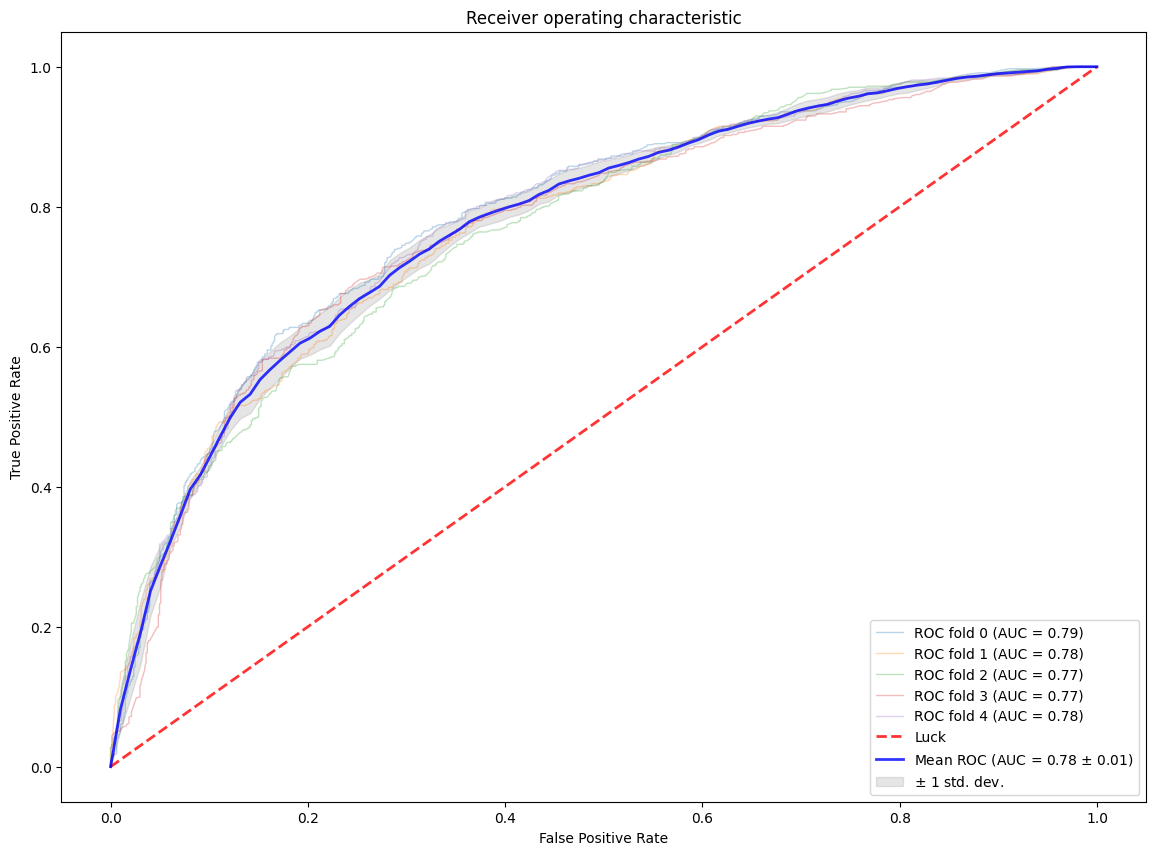

Accaracy list :  [0.7264784946236559, 0.7043010752688172, 0.6908602150537635, 0.7190860215053764, 0.7204301075268817]
equal opportunity for tpr :  [0.05184733356570226, 0.046888056165740655, 0.06331704967662033, 0.0013939440873538267, 0.04039908828968308]
equal opportunity for fpr :  [0.01394230769230767, 0.0394311570782159, 0.014950566674704596, 0.007971840386879842, 0.01195978344934262]
odds difference list :  [0.032894820629004964, 0.04315960662197828, 0.03913380817566246, 0.004682892237116834, 0.02617943586951285]
The mean accuracy is  0.712 ± 0.013
The mean equal opportunity for tpr: (close to 0) 0.041 ± 0.021
The mean equal opportunity for fpr: (close to 0) 0.018 ± 0.011
The mean odds difference: (close to 0) 0.029 ± 0.014
The mean parity difference: (close to 0) 0.053 ± 0.028
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 98
---------------------------------------------------------------------------------------------------
Trial Number: 23
Values (Obj

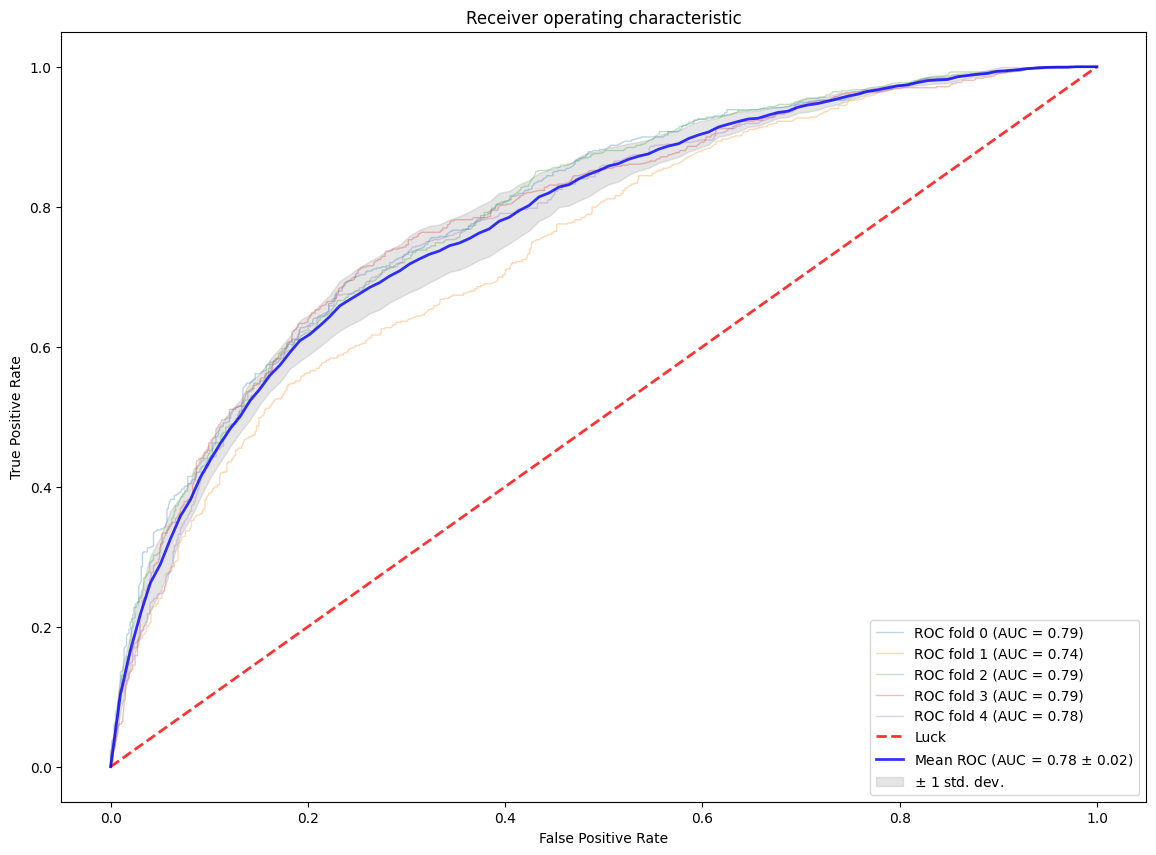

Accaracy list :  [0.7230142566191446, 0.6843177189409368, 0.7189409368635438, 0.7223353699932111, 0.7180706521739131]
equal opportunity for tpr :  [0.01990707038025652, 0.03456750260108343, 0.05557498632372859, 0.035150536187014914, 0.05034965034965044]
equal opportunity for fpr :  [0.006467144430829408, 0.0743066457352172, 0.0709425122090285, 0.06161270236612704, 0.02464310949644516]
odds difference list :  [0.013187107405542964, 0.054437074168150315, 0.06325874926637855, 0.048381619276570975, 0.0374963799230478]
The mean accuracy is  0.713 ± 0.015
The mean equal opportunity for tpr: (close to 0) 0.039 ± 0.013
The mean equal opportunity for fpr: (close to 0) 0.048 ± 0.027
The mean odds difference: (close to 0) 0.043 ± 0.017
The mean parity difference: (close to 0) 0.078 ± 0.040
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 23
---------------------------------------------------------------------------------------------------
Trial Number: 150
Values (Object

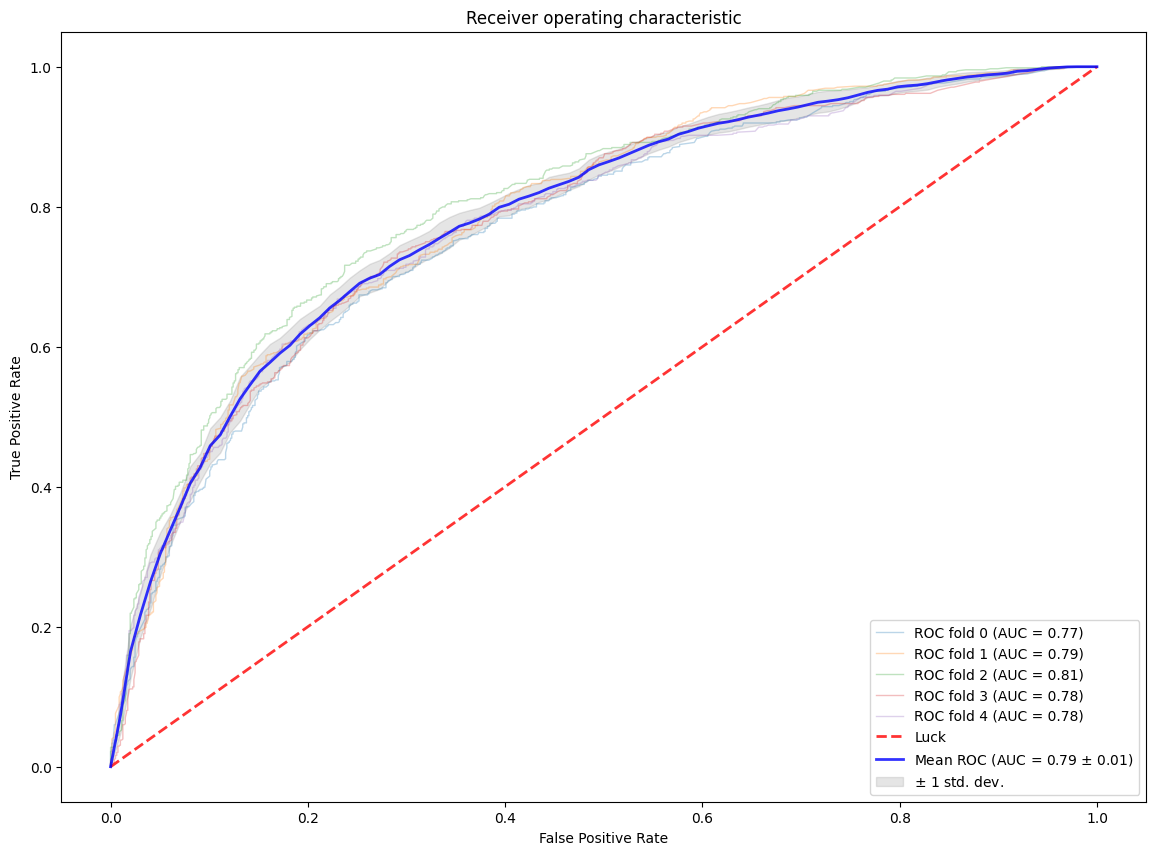

Accaracy list :  [0.710738255033557, 0.7199462726662189, 0.7394224311618536, 0.7098723975822699, 0.7179314976494291]
equal opportunity for tpr :  [0.0025686031080097704, 0.051402109596089485, 0.0010813315826060377, 0.044870041039671626, 0.027489027489027484]
equal opportunity for fpr :  [0.04486912912055516, 0.043604073522106324, 0.01370057543651676, 0.05630393337346978, 0.045480549199084674]
odds difference list :  [0.023718866114282464, 0.047503091559097904, 0.007390953509561399, 0.050586987206570705, 0.03648478834405608]
The mean accuracy is  0.720 ± 0.011
The mean equal opportunity for tpr: (close to 0) 0.025 ± 0.021
The mean equal opportunity for fpr: (close to 0) 0.041 ± 0.014
The mean odds difference: (close to 0) 0.033 ± 0.016
The mean parity difference: (close to 0) 0.048 ± 0.025
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 150
---------------------------------------------------------------------------------------------------
Trial Number: 112
Val

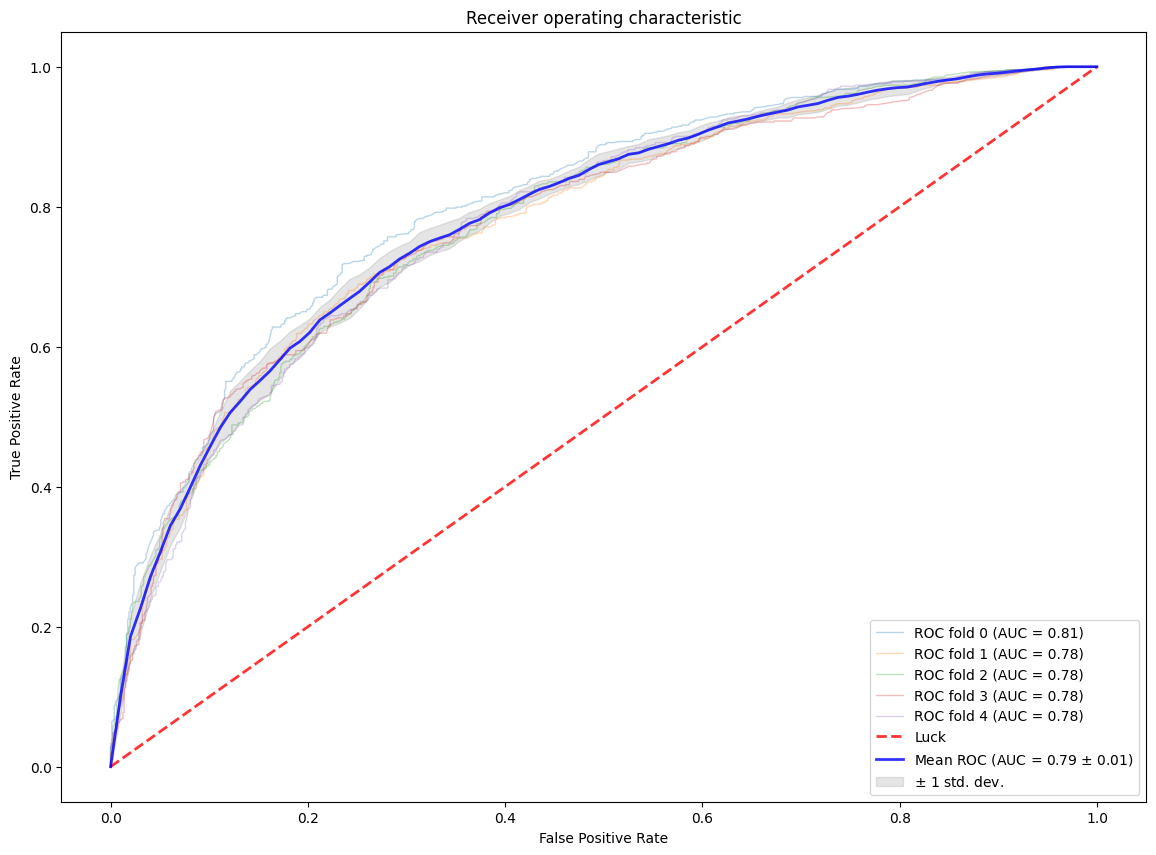

Accaracy list :  [0.7345430107526881, 0.722932078009415, 0.7041022192333557, 0.7121721587088097, 0.7114996637525218]
equal opportunity for tpr :  [0.10451756444351745, 0.036912636075513316, 0.007560314798090606, 0.0003088803088803216, 0.00904678603279141]
equal opportunity for fpr :  [0.06867088216004852, 0.003010358625331888, 0.013591331269349832, 0.015012124696882567, 0.027313144450766935]
odds difference list :  [0.08659422330178299, 0.019961497350422602, 0.01057582303372022, 0.007660502502881444, 0.018179965241779172]
The mean accuracy is  0.717 ± 0.011
The mean equal opportunity for tpr: (close to 0) 0.032 ± 0.038
The mean equal opportunity for fpr: (close to 0) 0.026 ± 0.023
The mean odds difference: (close to 0) 0.029 ± 0.029
The mean parity difference: (close to 0) 0.061 ± 0.056
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 112
---------------------------------------------------------------------------------------------------
Trial Number: 73
Values

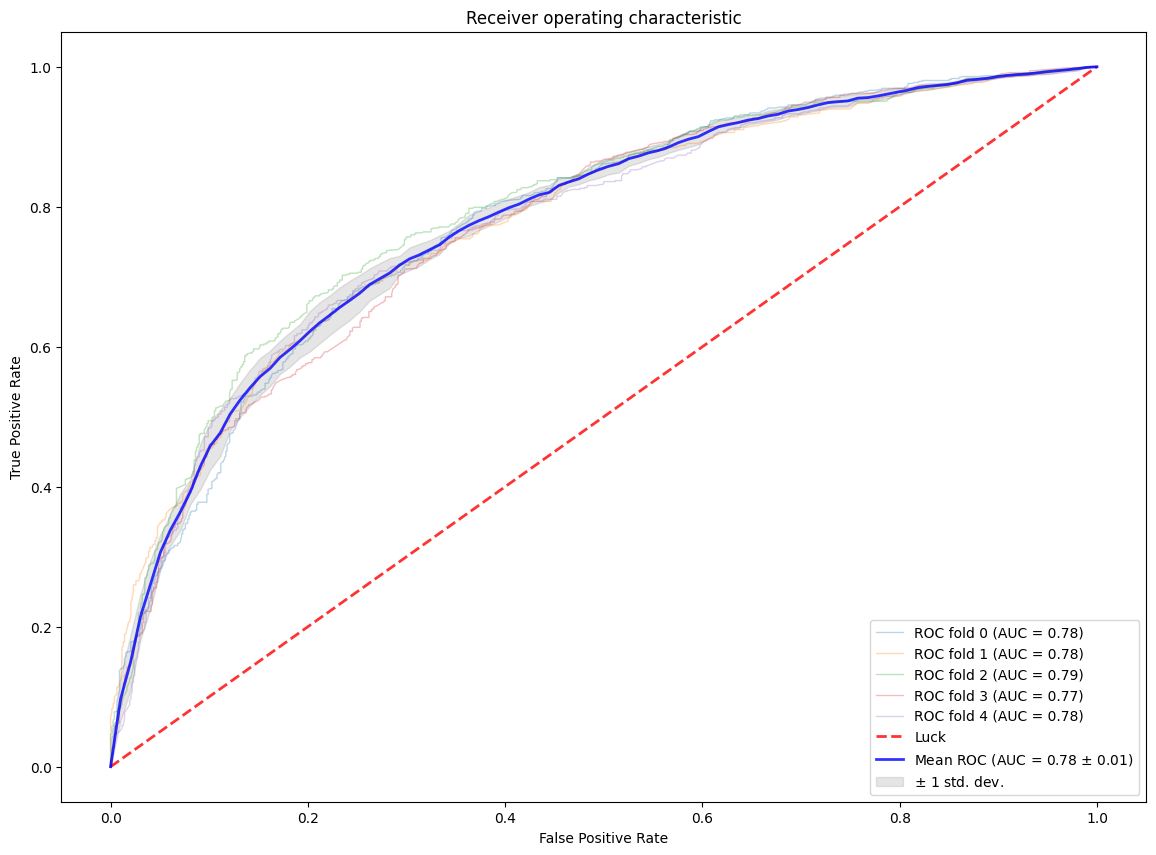

Accaracy list :  [0.7169684775318578, 0.7129443326626426, 0.7303822937625755, 0.6928236083165661, 0.7209926224010731]
equal opportunity for tpr :  [0.029216562691716352, 0.05068597560975607, 0.02171717171717169, 0.08007298112010153, 0.023748629886737316]
equal opportunity for fpr :  [0.01274746435590024, 0.03127442797143504, 0.01648919262555626, 0.03904878789078481, 0.04721735901108812]
odds difference list :  [0.020982013523808296, 0.040980201790595555, 0.019103182171363975, 0.05956088450544317, 0.035482994448912716]
The mean accuracy is  0.715 ± 0.012
The mean equal opportunity for tpr: (close to 0) 0.041 ± 0.022
The mean equal opportunity for fpr: (close to 0) 0.029 ± 0.013
The mean odds difference: (close to 0) 0.035 ± 0.015
The mean parity difference: (close to 0) 0.065 ± 0.030
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 73
---------------------------------------------------------------------------------------------------
Trial Number: 67
Values (Obj

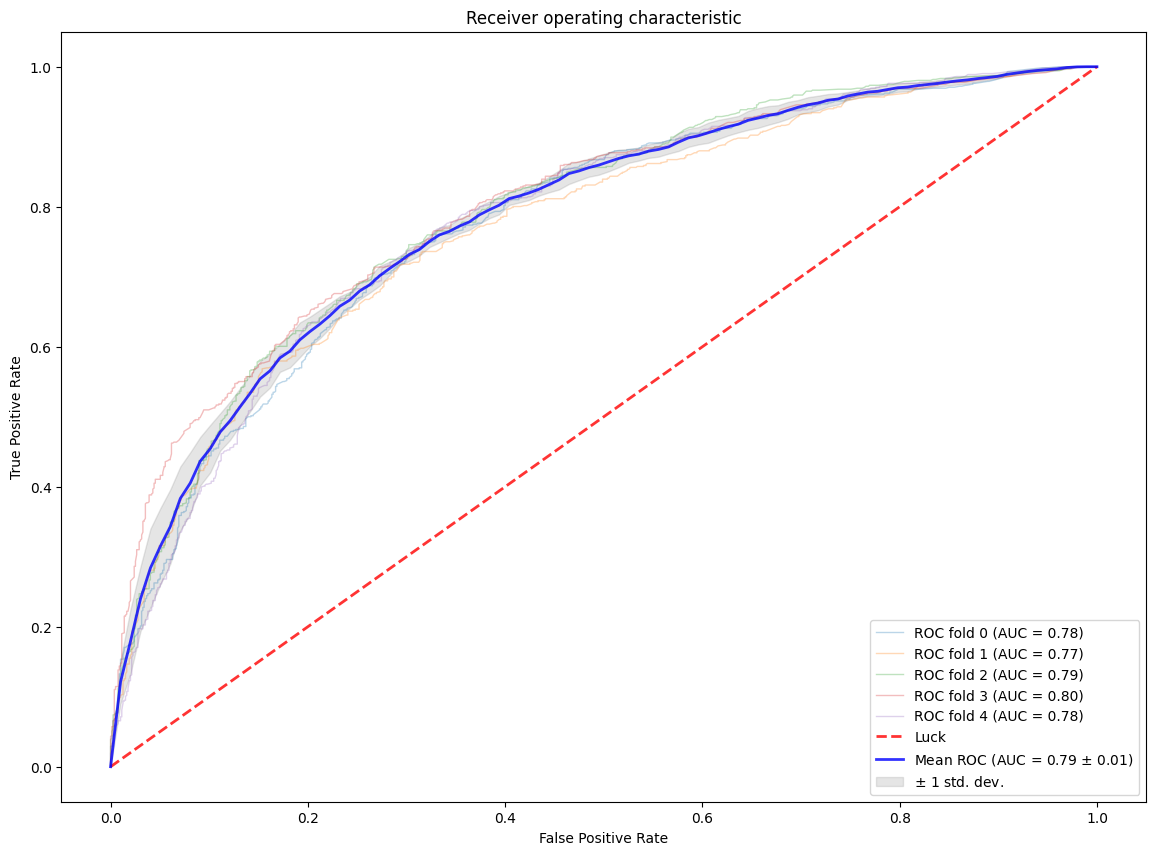

Accaracy list :  [0.7107875579086698, 0.7059602649006622, 0.7198675496688741, 0.7278145695364239, 0.7205298013245033]
equal opportunity for tpr :  [0.055097947502358524, 0.0895081967213115, 0.11659931148031732, 0.09373926619828254, 0.07563250049183556]
equal opportunity for fpr :  [0.05555908190727671, 0.019620079855826478, 0.07992886178861791, 0.03570138315441784, 0.11534931157572667]
odds difference list :  [0.055328514704817616, 0.054564138288568986, 0.09826408663446762, 0.0647203246763502, 0.09549090603378112]
The mean accuracy is  0.717 ± 0.008
The mean equal opportunity for tpr: (close to 0) 0.086 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.061 ± 0.034
The mean odds difference: (close to 0) 0.074 ± 0.019
The mean parity difference: (close to 0) 0.098 ± 0.057
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 67
---------------------------------------------------------------------------------------------------
Trial Number: 8
Values (Objectiv

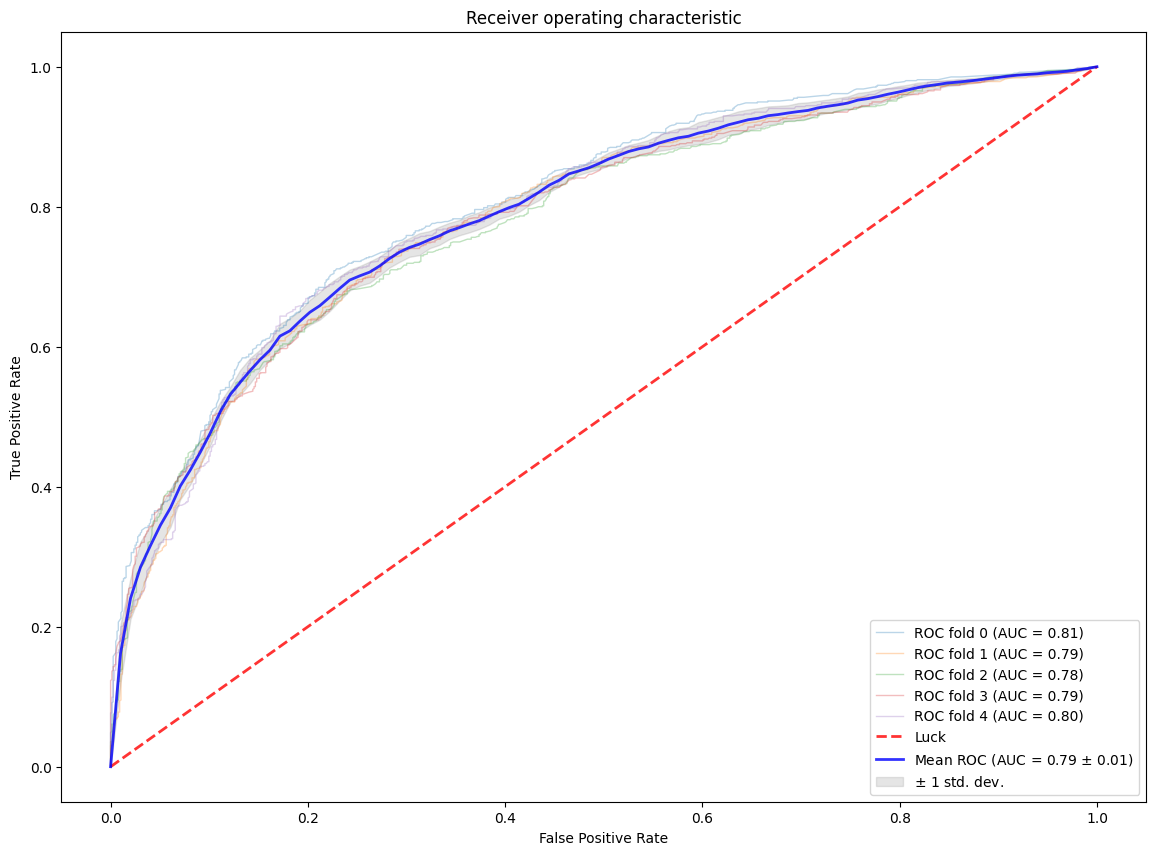

Accaracy list :  [0.739302172481896, 0.7215273206056616, 0.7094861660079052, 0.7206851119894598, 0.7299077733860343]
equal opportunity for tpr :  [0.10969946552177345, 0.04081632653061229, 0.059695336168518076, 0.11709245742092456, 0.15082418752573368]
equal opportunity for fpr :  [0.01082968114510674, 0.00813614575994917, 0.0027634563827593217, 0.035895701626038695, 0.02963497628376985]
odds difference list :  [0.0602645733334401, 0.02447623614528073, 0.0312293962756387, 0.07649407952348163, 0.09022958190475176]
The mean accuracy is  0.724 ± 0.010
The mean equal opportunity for tpr: (close to 0) 0.096 ± 0.040
The mean equal opportunity for fpr: (close to 0) 0.017 ± 0.013
The mean odds difference: (close to 0) 0.057 ± 0.025
The mean parity difference: (close to 0) 0.136 ± 0.053
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 8
---------------------------------------------------------------------------------------------------


In [ ]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')




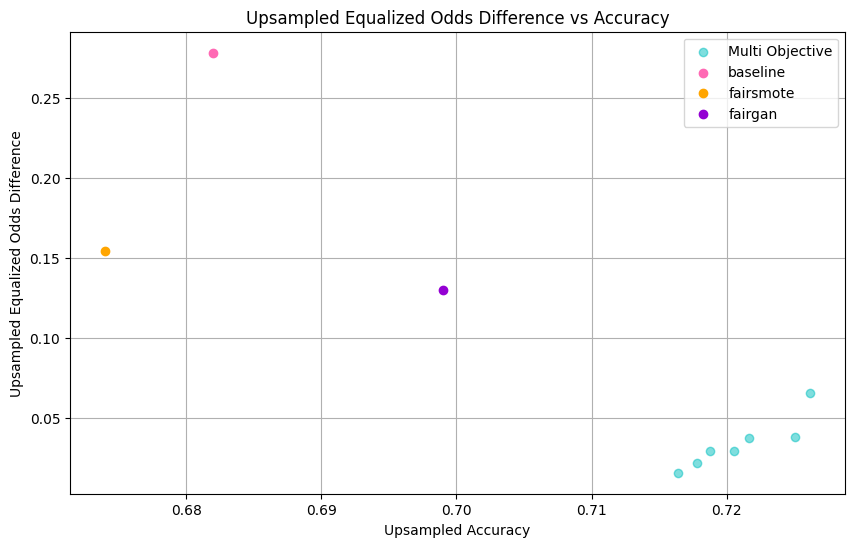

In [ ]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.682, 0.278, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.674, 0.154, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.699, 0.130, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

conf matrix:
  [[538 135]
 [238 324]] 
accuracy:  0.6979757085020243 precision:  0.7058823529411765 recall:  0.5765124555160143 fpr:  0.20059435364041606 tpr:  0.5765124555160143 fn+fp 373
conf matrix:
  [[327  49]
 [138  95]] 
accuracy:  0.6929392446633826 precision:  0.6597222222222222 recall:  0.40772532188841204 fpr:  0.13031914893617022 tpr:  0.40772532188841204 fn+fp 187
conf matrix:
  [[211  86]
 [100 229]] 
accuracy:  0.7028753993610224 precision:  0.726984126984127 recall:  0.6960486322188449 fpr:  0.2895622895622896 tpr:  0.6960486322188449 fn+fp 186
conf matrix:
  [[531 142]
 [225 337]] 
accuracy:  0.702834008097166 precision:  0.7035490605427975 recall:  0.599644128113879 fpr:  0.21099554234769688 tpr:  0.599644128113879 fn+fp 367
conf matrix:
  [[208  86]
 [103 220]] 
accuracy:  0.6936790923824959 precision:  0.7189542483660131 recall:  0.6811145510835913 fpr:  0.2925170068027211 tpr:  0.6811145510835913 fn+fp 189
conf matrix:
  [[323  56]
 [122 117]] 
accuracy:  0.7119741

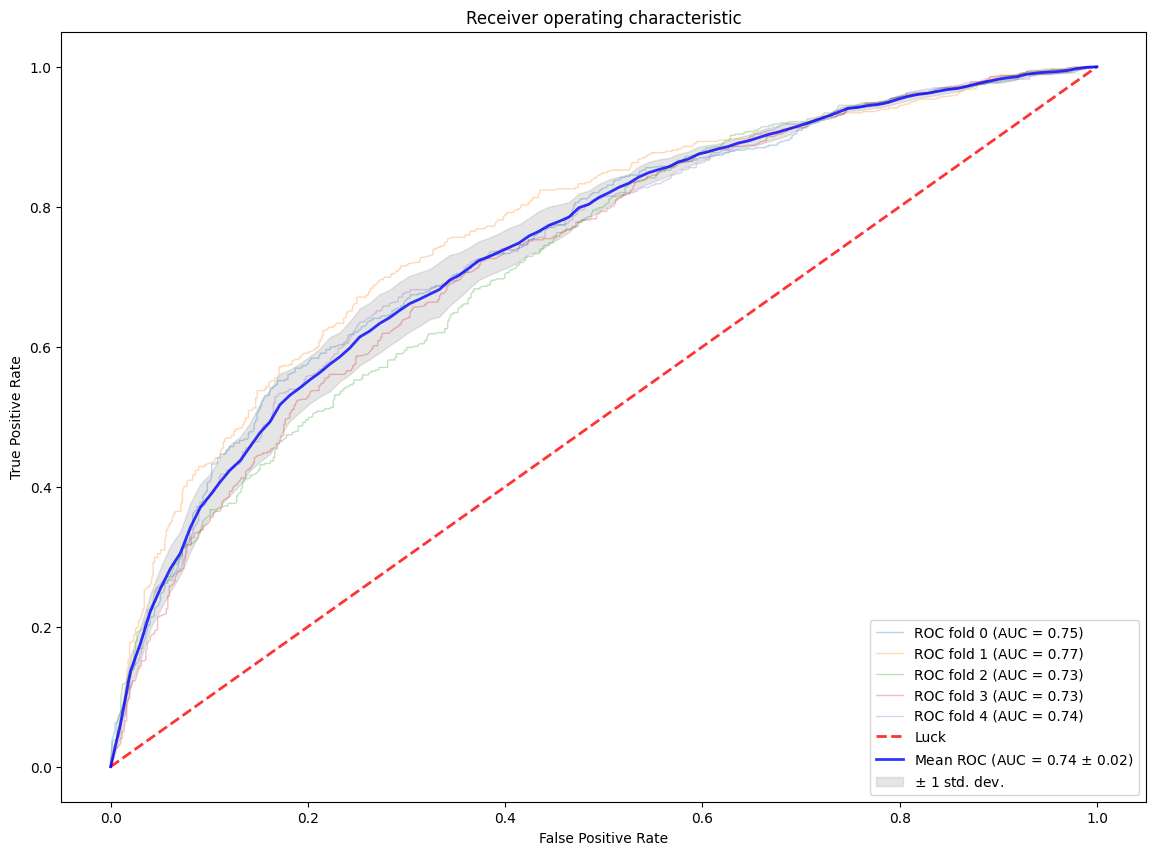

Accaracy list :  [0.6979757085020243, 0.702834008097166, 0.6555915721231766, 0.6774716369529984, 0.6871961102106969]
equal opportunity for tpr :  [0.2883233103304329, 0.19157480212961642, 0.341019098226969, 0.29213334742180896, 0.265910022884506]
equal opportunity for fpr :  [0.15924314062611936, 0.14475975086604562, 0.23496708770681374, 0.20254486838906047, 0.26260869565217393]
odds difference list :  [0.22378322547827612, 0.16816727649783103, 0.28799309296689135, 0.24733910790543473, 0.26425935926834]
The mean accuracy is  0.684 ± 0.017
The mean equal opportunity for tpr: (close to 0) 0.276 ± 0.049
The mean equal opportunity for fpr: (close to 0) 0.201 ± 0.044
The mean odds difference: (close to 0) 0.238 ± 0.041
The mean parity difference: (close to 0) 0.392 ± 0.065
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [ ]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [ ]:
print('Running time is: ',elapsed_time_minutes)

Running time is:  4.38597020705541
